# ETL (extract, transform, load)


## 1. Importing Data


In [410]:
# Import Libraries

import json
import pandas as pd
import os
import geopandas as gpd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import fiona
import contextily as cx
import seaborn as sns
import datetime

%matplotlib inline
os.environ["USE_PYGEOS"] = "0"

In [411]:
# Read the data from PrimeYield_2022 and CasaSapo_2000to2009 (OneDrive)

a = open("../Data/energy_certifications.json", encoding="utf-8", errors="ignore")
b = open("../Data/conditions.json", encoding="utf-8", errors="ignore")
c = open("../Data/list_ids.json", encoding="utf-8", errors="ignore")
d = open("../Data/parishes.json", encoding="utf-8", errors="ignore")
e = open("../Data/sources.json", encoding="utf-8", errors="ignore")
f = open("../Data/types.json", encoding="utf-8", errors="ignore")
g = open("../Data/typologies.json", encoding="utf-8", errors="ignore")
h = open("../Data/agueda.json", encoding="utf-8", errors="ignore")
i = open("../Data/Albergaria-a-Velha.json", encoding="utf-8", errors="ignore")
j = open("../Data/Anadia.json", encoding="utf-8", errors="ignore")
k = open("../Data/aveiro.json", encoding="utf-8", errors="ignore")
l = open("../Data/Estarreja.json", encoding="utf-8", errors="ignore")
m = open("../Data/ilhavo.json", encoding="utf-8", errors="ignore")
n = open("../Data/Murtosa.json", encoding="utf-8", errors="ignore")
o = open("../Data/Oliveira do Bairro.json", encoding="utf-8", errors="ignore")
p = open("../Data/Ovar.json", encoding="utf-8", errors="ignore")
q = open("../Data/Sever do Vouga.json", encoding="utf-8", errors="ignore")
r = open("../Data/Vagos.json", encoding="utf-8", errors="ignore")
s = pd.read_csv("../Data/BD_JanelaDigital_2000to2009_withHeaders.txt", sep="\t")
t = pd.read_csv(
    "../Data/BDAVRILH_DONUT&PhdPB_VENDA_V20150624.csv", encoding="latin", sep=";"
)
u = pd.read_csv(
    "../Data/BGRI11_AVRILH_M1LABELS_LP_AdjMatGeoNetDist_v1.csv",
    encoding="latin",
    sep=",",
)
u_updated = pd.read_csv(
    "../Data/BGRI11_AVRILH_M1LABELS_LP_AdjMatGeoNetDist_v2.csv",
    encoding="latin",
    sep=",",
)
v = pd.read_csv("../Data/zones_CSRA_gdf_descodifica.csv", sep=";")
al = pd.read_csv("../Data/Estabelecimentos_de_AL.csv", sep=",")

# Store data in variables
e_cert = pd.json_normalize(json.load(a))
cond = pd.json_normalize(json.load(b))
list_ids = pd.json_normalize(json.load(c))
parishes = pd.json_normalize(json.load(d))
sources = pd.json_normalize(json.load(e))
types = pd.json_normalize(json.load(f))
typologies = pd.json_normalize(json.load(g))
agueda = pd.json_normalize(json.load(h))
albergaria = pd.json_normalize(json.load(i))
anadia = pd.json_normalize(json.load(j))
aveiro = pd.json_normalize(json.load(k))
estarreja = pd.json_normalize(json.load(l))
ilhavo = pd.json_normalize(json.load(m))
murtosa = pd.json_normalize(json.load(n))
oliveira = pd.json_normalize(json.load(o))
ovar = pd.json_normalize(json.load(p))
sever = pd.json_normalize(json.load(q))
vagos = pd.json_normalize(json.load(r))

# Close files
a.close()
b.close()
c.close()
d.close()
e.close()
f.close()
g.close()
h.close()
i.close()
j.close()
k.close()
l.close()
m.close()
n.close()
o.close()
p.close()
q.close()
r.close()

## 2. Prime Yeild Data [2018-2023]


### 2.1 Explore - Prime Yeild Data


In [412]:
# Explore data existing on the file energy_certifications.json
e_cert

ID  NAME
0   1    A+
1   2     A
2   3     B
3   4    B-
4   5     C
5   6     D
6   7     E
7   8     F
8   9     G
9  10  Free

**energy_certifications.json** is a table from PrimeYield Database structure with the type of energy certification.

---


In [413]:
# Explore data existing on the file conditions.json
cond

id                name
0   1                 New
1   2                Used
2   3  Under Construction
3   4       To Recuperate
4   5                Ruin
5   6           Renovated
6   7       Under Project

**conditions.json** is a table from PrimeYield Database structure with the info regarding the condition.

---


In [414]:
# Explore data existing on the file list_ids.json
list_ids

id     name parishe_disconfre municipality_disconfre  DISTRICT_ID  \
0     10110   Aveiro            010103                   0101           65   
1     10110   Aveiro            010109                   0101           65   
2     10110   Aveiro            010112                   0101           65   
3     10110   Aveiro            010119                   0101           65   
4     10110   Aveiro            010121                   0101           65   
...     ...      ...               ...                    ...          ...   
3087  10343  Madeira            221005                   3109           83   
3088  10343  Madeira            221006                   3109           83   
3089  10352  Madeira            221101                   3110           83   
3090  10352  Madeira            221102                   3110           83   
3091  10352  Madeira            221103                   3110           83   

     district_disconfre  
0                    01  
1                    01  
2                    01  
3                    01  
4                    01  
...                 ...  
3087                 31  
3088                 31  
3089                 31  
3090                 31  
3091                 31  

[3092 rows x 6 columns]

**list_ids.json** is a table for PrimeYield with data for parishes, municipality, etc. - not usefull for this project.

---


In [415]:
# Explore data existing on the file parishes.json
parishes

ID                 NAME  SAPO_ID DISCONFRE   LATITUDE  LONGITUDE  \
0          1          Aldeia Nova   515054           -11.286300  14.159600   
1          2            Alfandega   515199            -7.234082  16.064018   
2          3          Alto Cauale   447292            -7.621437  15.047791   
3          4            Alto Uama   515011           -12.276071  15.313118   
4          5         Alto Zambeze   447272           -11.851223  20.028076   
...      ...                  ...      ...       ...        ...        ...   
89866  89867               Zurren   477760            37.260295  -4.460264   
89867  89868            Zurucuain   502756            42.709834  -2.001133   
89868  89869  Zurucuain/Zurukuain   502757            42.709834  -2.001133   
89869  89870           Zuza/Zutza   502511            42.759650  -1.410758   
89870  89871              Zuzones   482447            41.622370  -3.458760   

       MUNICIPALITY_ID  
0                   10  
1                  149  
2                   87  
3                   97  
4                    1  
...                ...  
89866            13038  
89867            17764  
89868            17764  
89869            14508  
89870            14215  

[89871 rows x 7 columns]

**parishes.json** is a table for PrimeYield with parishes location - not usefull for this project.

---


In [416]:
# open all loaded files and concatenate into a pandas dataframe


In [417]:
# Explore data existing on the file sources.json
sources

id        name
0   1    Internal
1   2  Imovirtual
2   3   Idealista
3   4        Sapo
4   5         C21
5   6      Mister
6   7    Casafari

**sources.json** is a table from PrimeYield Database structure with the info regarding the source of info.

---


In [418]:
# Explore data existing on the file types.json
types

id               name
0    1         Apartments
1    2             Houses
2    3               Land
3    4             Stores
4    5         Warehouses
5    6            Garages
6    7            Offices
7    8          Buildings
8    9  Farms and Estates
9   10             Luxury
10  11         Industrial
11  12                N/A

**types.json** is a table from PrimeYield Database structure with the info regarding the type of listing.

---


In [419]:
# Explore data existing on the file typologies.json
typologies

id  name
0    1    T0
1    2    T1
2    3    T2
3    4    T3
4    5    T4
5    6    T5
6    7    T6
7    8    T7
8    9    T8
9   10    T9
10  11  T10+
11  12   N/A
12  13   T10

**typologies.json** has the list of the typologies of listings (apartments, houses, etc).

---


In [420]:
agueda.columns

Index(['ID', 'BUSINESS_TYPE', 'SMALL_DESCRIPTION', 'LONG_DESCRIPTION',
       'CONSTRUCTION_YEAR', 'CURRENT_PRICE', 'AREA', 'AREA_GROSS', 'WCS',
       'ADD_POSTAL_CODE', 'ADD_LATITUDE', 'ADD_LONGITUDE', 'ADD_ADDRESS',
       'SOURCE_CODE', 'SOURCE_URL', 'CREATION_DATE', 'LAST_UPDATE',
       'SELL_DATE', 'STATUS', 'MAP_IMAGE', 'MAP_COUNTRY_IMAGE', 'REGISTRY',
       'BUILDING_N', 'FRACTION', 'FINANCES', 'MATRIX_ARTICLE',
       'WIP_STATUS_PERCENT', 'RENT_PRICE', 'WIP_STATUS', 'PATRIMONIAL_VALUE',
       'PATRIMONIAL_VALUE_DATE', 'MUNICIPALITY_ID', 'PARISH_ID',
       'CONDITION_ID', 'ENERGY_CERT_ID', 'SOURCE_ID', 'TASK_ID', 'TYPE_ID',
       'TYPOLOGY_ID', 'MAP_IMAGE3', 'MAP_IMAGE2', 'PROPERTY_DATA_FROM_API',
       'ADV_DATE'],
      dtype='object')

In [421]:
# Explore data existing on the file agueda.json
agueda

ID BUSINESS_TYPE  \
0       76894          SALE   
1       76979          SALE   
2       76998          SALE   
3       77170          SALE   
4       77332          SALE   
...       ...           ...   
4235  1972595          SALE   
4236  1992034          SALE   
4237  1993111          SALE   
4238  1999976          SALE   
4239  2000087          SALE   

                                      SMALL_DESCRIPTION LONG_DESCRIPTION  \
0                                   Barclays-19763/2014             None   
1                                        BIC-19883/2014             None   
2                                        BIC-19914/2014             None   
3                                        BIC-20180/2014             None   
4                                         GE-20352/2014             None   
...                                                 ...              ...   
4235                                     CGD-52598/2022             None   
4236  C0438-00158:  Portugal, Aveiro, Agueda, Valong...             None   
4237  C0385-00491:  Portugal, Aveiro, Agueda, Águeda...             None   
4238  C0385-00499:  Portugal, Aveiro, Agueda, Águeda...             None   
4239  C0385-00500:  Portugal, Aveiro, Agueda, Fermen...             None   

      CONSTRUCTION_YEAR  CURRENT_PRICE   AREA  AREA_GROSS  WCS  \
0                1996.0       109300.0  167.0       167.0  NaN   
1                2008.0       150200.0  200.0       271.0  NaN   
2                2010.0       103000.0  102.0       102.0  NaN   
3                2010.0       119000.0  146.0       146.0  NaN   
4                2005.0        24300.0   93.0        93.0  NaN   
...                 ...            ...    ...         ...  ...   
4235             2022.0       370000.0  251.0      5300.0  NaN   
4236                NaN        80000.0    NaN      1490.0  NaN   
4237                NaN        30000.0    NaN      1010.0  NaN   
4238             2003.0       125000.0  100.5       171.5  2.0   
4239             1999.0       155575.0   80.0       160.0  2.0   

     ADD_POSTAL_CODE  ...  CONDITION_ID  ENERGY_CERT_ID SOURCE_ID TASK_ID  \
0         3750 - 403  ...           2.0             NaN         1    None   
1         3750 - 774  ...           2.0             NaN         1    None   
2         3750 - 782  ...           2.0             NaN         1    None   
3         3750 - 122  ...           2.0             NaN         1    None   
4         3750 - 811  ...           NaN             NaN         1    None   
...              ...  ...           ...             ...       ...     ...   
4235      3750 - 327  ...           3.0             NaN         1    None   
4236        3750-810  ...           NaN             NaN         5    None   
4237        3750-301  ...           NaN             NaN         5    None   
4238        3750-099  ...           NaN             NaN         5    None   
4239        3750-420  ...           NaN             NaN         5    None   

     TYPE_ID TYPOLOGY_ID MAP_IMAGE3 MAP_IMAGE2 PROPERTY_DATA_FROM_API ADV_DATE  
0          2           5       None       None                   None     None  
1          2           5       None       None                   None     None  
2          1           3       None       None                   None     None  
3          1           4       None       None                   None     None  
4          2           3       None       None                   None     None  
...      ...         ...        ...        ...                    ...      ...  
4235       2           5                                         None     None  
4236       3          12                                         None     None  
4237       3          12                                         None     None  
4238       1           3                                         None     None  
4239       2           5                                         None     None  

[4240 rows x 43 columns]

In [422]:
# Explore data existing on the file Albergaria-a-Velha.json
albergaria

ID BUSINESS_TYPE  \
0       77081          SALE   
1       77822          SALE   
2       78428          SALE   
3       78680          SALE   
4       78779          SALE   
...       ...           ...   
2741  1994789          SALE   
2742  1999033          SALE   
2743  2000226          SALE   
2744  2000238          SALE   
2745  2005335          SALE   

                                      SMALL_DESCRIPTION LONG_DESCRIPTION  \
0                                  GE-Capital20027/2014             None   
1                                        BIC-21299/2014             None   
2                                   Barclays-23110/2014             None   
3                                        BIC-23420/2014             None   
4                                 GE-Capital-23537/2014             None   
...                                                 ...              ...   
2741  C0385-00492:  Portugal, Aveiro, Albergaria-A-V...             None   
2742  C0474-00003:  Portugal, Aveiro, Albergaria-A-V...             None   
2743                                   P#Hip-53350/2022             None   
2744                                   P#Hip-53369/2022             None   
2745                                   P#Hip-53513/2023             None   

      CONSTRUCTION_YEAR  CURRENT_PRICE    AREA  AREA_GROSS  WCS  \
0                1999.0        75000.0   134.0       134.0  NaN   
1                2015.0       161700.0   141.0       204.0  NaN   
2                2007.0        78000.0   123.0         NaN  NaN   
3                2014.0       210100.0   240.0       240.0  NaN   
4                1999.0        74200.0   134.0       134.0  NaN   
...                 ...            ...     ...         ...  ...   
2741                NaN        11000.0    72.0       580.0  NaN   
2742                NaN        50000.0  1750.0       240.0  NaN   
2743             1951.0        82400.0   148.0       248.0  NaN   
2744             2022.0       388000.0   254.0      1314.0  NaN   
2745             1968.0       175000.0   221.0      1290.0  NaN   

     ADD_POSTAL_CODE  ...  CONDITION_ID  ENERGY_CERT_ID SOURCE_ID TASK_ID  \
0         3850 - 171  ...           2.0             NaN         1    None   
1         3850 - 579  ...           3.0             NaN         1    None   
2         3850 - 004  ...           2.0             NaN         1    None   
3         3850 - 641  ...           3.0             NaN         1    None   
4         3850 - 171  ...           NaN             NaN         1    None   
...              ...  ...           ...             ...       ...     ...   
2741        3850-835  ...           NaN             NaN         5    None   
2742        3850-501  ...           NaN             NaN         5    None   
2743      3850 - 501  ...           2.0             NaN         1    None   
2744      3850 - 242  ...           3.0             NaN         1    None   
2745      3850 - 207  ...           2.0             NaN         1    None   

     TYPE_ID TYPOLOGY_ID MAP_IMAGE3 MAP_IMAGE2 PROPERTY_DATA_FROM_API ADV_DATE  
0          1           4       None       None                   None     None  
1          2           4       None       None                   None     None  
2          1           4       None       None                   None     None  
3          2           4       None       None                   None     None  
4          1           4       None       None                   None     None  
...      ...         ...        ...        ...                    ...      ...  
2741       3          12                                         None     None  
2742       3          12                                         None     None  
2743       2           3                                         None     None  
2744       2           5                                         None     None  
2745       2           3                                         None     None  

[2746 rows x 43 column

In [423]:
# Explore data existing on the file Anadia.json
anadia

ID BUSINESS_TYPE  \
0       77183          SALE   
1       77263          SALE   
2       78017          SALE   
3       78190          SALE   
4       79052          SALE   
...       ...           ...   
3028  1991259          SALE   
3029  2001734          SALE   
3030  2003379          SALE   
3031  2004811          SALE   
3032  2004812          SALE   

                                      SMALL_DESCRIPTION LONG_DESCRIPTION  \
0                                        BIC-20198/2014             None   
1                                        BIC-20282/2014             None   
2                                        CGD-21567/2014             None   
3                                   Barclays-22826/2014             None   
4                       Montepio Arrendament-23887/2014             None   
...                                                 ...              ...   
3028  C0388-00313:  Portugal, Aveiro, Anadia, São Lo...             None   
3029  1746-01988:  Portugal, Aveiro, Anadia, Arcos e...             None   
3030      C0385-00531:  Portugal, Aveiro, Anadia, Moita             None   
3031  C0462-00060:  Portugal, Aveiro, Anadia, Avelãs...             None   
3032  C0462-00061:  Portugal, Aveiro, Anadia, Arcos ...             None   

      CONSTRUCTION_YEAR  CURRENT_PRICE   AREA  AREA_GROSS  WCS  \
0                1994.0       303300.0  388.0      2172.0  NaN   
1                2002.0        62100.0  122.0         NaN  NaN   
2                2005.0       212500.0  501.0      1189.0  NaN   
3                2011.0       142500.0  217.0       217.0  NaN   
4                1995.0        90000.0  140.0       140.0  NaN   
...                 ...            ...    ...         ...  ...   
3028                NaN       350000.0  350.0       350.0  4.0   
3029             1937.0       324500.0  245.0       379.0  2.0   
3030                NaN        56900.0    NaN       120.0  NaN   
3031                NaN        45000.0  249.0       586.0  NaN   
3032             1998.0        34000.0   28.0        28.2  1.0   

     ADD_POSTAL_CODE  ...  CONDITION_ID  ENERGY_CERT_ID SOURCE_ID TASK_ID  \
0         3780 - 476  ...           2.0             NaN         1    None   
1         3780 - 111  ...           2.0             NaN         1    None   
2            3780 -   ...           2.0             NaN         1    None   
3         3780 - 471  ...           2.0             NaN         1    None   
4               0 -   ...           NaN             NaN         1    None   
...              ...  ...           ...             ...       ...     ...   
3028        3780-178  ...           NaN             NaN         5    None   
3029        3780-200  ...           NaN             NaN         5    None   
3030        3780-477  ...           NaN             NaN         5    None   
3031        3780-361  ...           NaN             NaN         5    None   
3032        3780-202  ...           NaN             NaN         5    None   

     TYPE_ID TYPOLOGY_ID MAP_IMAGE3 MAP_IMAGE2 PROPERTY_DATA_FROM_API ADV_DATE  
0          2           6       None       None                   None     None  
1          1           3       None       None                   None     None  
2          2           5       None       None                   None     None  
3          2           4       None       None                   None     None  
4          1           4       None       None                   None     None  
...      ...         ...        ...        ...                    ...      ...  
3028       2           4                                         None     None  
3029       2           5                                         None     None  
3030       3          12                                         None     None  
3031       3          12                                         None     None  
3032       7          12                                         None     None  

[3033 rows x 43 columns]

In [424]:
# Explore data existing on the file aveiro.json
aveiro

ID BUSINESS_TYPE  \
0        76867          SALE   
1        76892          SALE   
2        77038          SALE   
3        77057          SALE   
4        77327          SALE   
...        ...           ...   
17897  2004970          SALE   
17898  2004971          SALE   
17899  2004972          SALE   
17900  2004973          SALE   
17901  2005246          SALE   

                                       SMALL_DESCRIPTION LONG_DESCRIPTION  \
0                                    Barclays-19725/2014             None   
1                                    Barclays-19760/2014             None   
2                                  Banif Imo.-19969/2014             None   
3                                         BIC-19999/2014             None   
4                                          GE-20347/2014             None   
...                                                  ...              ...   
17897  C0385-00574:  Portugal, Aveiro, Aveiro, Glória...             None   
17898  C0385-00575:  Portugal, Aveiro, Aveiro, Glória...             None   
17899  C0385-00576:  Portugal, Aveiro, Aveiro, Glória...             None   
17900  C0385-00577:  Portugal, Aveiro, Aveiro, Glória...             None   
17901  C0385-00529:  Portugal, Aveiro, Aveiro, Esguei...             None   

       CONSTRUCTION_YEAR  CURRENT_PRICE   AREA  AREA_GROSS  WCS  \
0                 2004.0       161000.0  193.0       193.0  NaN   
1                 2001.0       145700.0  154.0       154.0  NaN   
2                 2008.0       120000.0  108.0       108.0  NaN   
3                 2008.0        75000.0    NaN         NaN  NaN   
4                 1991.0        47000.0   99.0        99.0  NaN   
...                  ...            ...    ...         ...  ...   
17897                NaN       375800.0   71.0       116.0  2.0   
17898                NaN       381280.0   71.0       117.0  2.0   
17899                NaN       483560.0   92.0       167.0  3.0   
17900                NaN       897480.0  135.0       224.0  5.0   
17901                NaN       325000.0   85.0       111.0  2.0   

      ADD_POSTAL_CODE  ...  CONDITION_ID  ENERGY_CERT_ID SOURCE_ID TASK_ID  \
0          3810 - 413  ...           NaN             NaN         1    None   
1          3800 - 106  ...           2.0             NaN         1    None   
2          3800 - 351  ...           2.0             NaN         1    None   
3          3810 - 498  ...           2.0             NaN         1    None   
4          3810 - 037  ...           NaN             NaN         1    None   
...               ...  ...           ...             ...       ...     ...   
17897        3800-129  ...           NaN             NaN         5    None   
17898        3800-129  ...           NaN             NaN         5    None   
17899        3800-129  ...           NaN             NaN         5    None   
17900        3800-129  ...           NaN             NaN         5    None   
17901        3800-003  ...           NaN             NaN         5    None   

      TYPE_ID TYPOLOGY_ID MAP_IMAGE3 MAP_IMAGE2 PROPERTY_DATA_FROM_API  \
0           2           5       None       None                   None   
1           1           3       None       None                   None   
2           1           4       None       None                   None   
3           1           2       None       None                   None   
4           1           4       None       None                   None   
...       ...         ...        ...        ...                    ...   
17897       1           3                                         None   
17898       1           3                                         None   
17899       1           4                                         None   
17900       1           5                                         None   
17901       1           3                                         None   

      ADV_DATE  
0         None  
1         None  
2         None  
3  

In [425]:
# Explore data existing on the file Estarreja.json
estarreja

ID BUSINESS_TYPE  \
0       77472          SALE   
1       77645          SALE   
2       77849          SALE   
3       79390          SALE   
4       80826          SALE   
...       ...           ...   
1140  1961190          SALE   
1141  1963581          SALE   
1142  1963585          SALE   
1143  1963599          SALE   
1144  2005247          SALE   

                                      SMALL_DESCRIPTION LONG_DESCRIPTION  \
0                                        BIC-20536/2014             None   
1                                   Barclays-20734/2014             None   
2                                        BIC-21347/2014             None   
3                                   Barclays-24320/2014             None   
4                                   Barclays-26282/2015             None   
...                                                 ...              ...   
1140  0651-04571:  Portugal, Aveiro, Estarreja, Bedu...             None   
1141  C0385-00406:  Portugal, Aveiro, Estarreja, Bed...             None   
1142  C0385-00420:  Portugal, Aveiro, Estarreja, Bed...             None   
1143  C0385-00472:  Portugal, Aveiro, Estarreja, Bed...             None   
1144  C0385-00579:  Portugal, Aveiro, Estarreja, Bed...             None   

      CONSTRUCTION_YEAR  CURRENT_PRICE   AREA  AREA_GROSS  WCS  \
0                2002.0        95600.0  130.0       130.0  NaN   
1                1986.0        59000.0    NaN         NaN  NaN   
2                1975.0        91400.0  240.0       240.0  NaN   
3                1986.0        59000.0    NaN         NaN  NaN   
4                1986.0        59000.0    NaN         NaN  NaN   
...                 ...            ...    ...         ...  ...   
1140             1951.0        45000.0   99.0       205.0  0.0   
1141             1988.0       255000.0  105.0       174.0  4.0   
1142                NaN        45000.0    NaN      4090.0  NaN   
1143             1989.0       139900.0  130.0       139.0  1.0   
1144             1998.0       169500.0   97.0       140.7  2.0   

     ADD_POSTAL_CODE  ...  CONDITION_ID  ENERGY_CERT_ID SOURCE_ID TASK_ID  \
0         3860 - 078  ...           2.0             NaN         1    None   
1         3860 - 352  ...           NaN             NaN         1    None   
2         3860 - 638  ...           2.0             NaN         1    None   
3         3860 - 352  ...           NaN             NaN         1    None   
4         3860 - 352  ...           NaN             NaN         1    None   
...              ...  ...           ...             ...       ...     ...   
1140        3860-258  ...           NaN             NaN         5    None   
1141        3860-262  ...           NaN             NaN         5    None   
1142        3860-675  ...           NaN             NaN         5    None   
1143        3860-375  ...           NaN             NaN         5    None   
1144        3860-389  ...           NaN             NaN         5    None   

     TYPE_ID TYPOLOGY_ID MAP_IMAGE3 MAP_IMAGE2 PROPERTY_DATA_FROM_API ADV_DATE  
0          1           4       None       None                   None     None  
1          1           4       None       None                   None     None  
2          2           6       None       None                   None     None  
3          1           4       None       None                   None     None  
4          1           4       None       None                   None     None  
...      ...         ...        ...        ...                    ...      ...  
1140       2           3                                         None     None  
1141       2           4                                         None     None  
1142       3          12                                         None     None  
1143       1           3                                         None     None  
1144       1           3                                         None     None  

[1145 rows x 43 columns]

In [426]:
# Explore data existing on the file ilhavo.json
ilhavo

ID BUSINESS_TYPE  \
0       77377          SALE   
1       77531          SALE   
2       77726          SALE   
3       78184          SALE   
4       78607          SALE   
...       ...           ...   
6189  2003350          SALE   
6190  2004573          SALE   
6191  2004581          SALE   
6192  2004781          SALE   
6193  2005854        ASKING   

                                      SMALL_DESCRIPTION LONG_DESCRIPTION  \
0                                        BIC-20398/2014             None   
1                                 GE-Capital-20620/2014             None   
2                                   Barclays-20815/2014             None   
3                                        BIC-22820/2014             None   
4                                        BIC-23329/2014             None   
...                                                 ...              ...   
6189  C0263-01361:  Portugal, Aveiro, Ílhavo, São Sa...             None   
6190  C0385-00532:  Portugal, Aveiro, Ílhavo, Gafanh...             None   
6191  C0406-01312:  Portugal, Aveiro, Ílhavo, São Sa...             None   
6192  C0385-00547:  Portugal, Aveiro, Ílhavo, Gafanh...             None   
6193  C0385-00586:  Portugal, Aveiro, Ílhavo, São Sa...             None   

      CONSTRUCTION_YEAR  CURRENT_PRICE   AREA  AREA_GROSS  WCS  \
0                1981.0       223300.0  155.0       234.0  NaN   
1                2006.0       112400.0  168.0       663.0  NaN   
2                1998.0        95000.0  110.0       110.0  NaN   
3                1981.0       223300.0    NaN       234.0  NaN   
4                1971.0       130200.0  124.0       124.0  NaN   
...                 ...            ...    ...         ...  ...   
6189                NaN       450000.0    0.0     19900.0  NaN   
6190             2003.0       144500.0   94.0       118.0  1.0   
6191             1968.0       390000.0   70.0       108.0  0.0   
6192             2007.0       310000.0   88.0       194.0  3.0   
6193             1990.0       137500.0   62.0        92.0  1.0   

     ADD_POSTAL_CODE  ...  CONDITION_ID  ENERGY_CERT_ID SOURCE_ID TASK_ID  \
0         3830 - 766  ...           3.0             NaN         1    None   
1         3830 - 414  ...           2.0             NaN         1    None   
2         3830 - 221  ...           2.0             NaN         1    None   
3         3830 - 766  ...           2.0             NaN         1    None   
4         3830 - 209  ...           2.0             NaN         1    None   
...              ...  ...           ...             ...       ...     ...   
6189        3025-309  ...           NaN             NaN         5    None   
6190        3830-568  ...           NaN             NaN         5    None   
6191        3830-221  ...           NaN             NaN         5    None   
6192        3830-472  ...           NaN             NaN         5    None   
6193        3830-199  ...           NaN             NaN         5    None   

     TYPE_ID TYPOLOGY_ID MAP_IMAGE3 MAP_IMAGE2 PROPERTY_DATA_FROM_API ADV_DATE  
0          2           4       None       None                   None     None  
1          2           4       None       None                   None     None  
2          1           3       None       None                   None     None  
3          2           4       None       None                   None     None  
4          2           4       None       None                   None     None  
...      ...         ...        ...        ...                    ...      ...  
6189       3          12                                         None     None  
6190       1           3                                         None     None  
6191       2           1                                         None     None  
6192       2           4                                         None     None  
6193       2           3                                         None     None  

[6194 rows x 43 columns]

In [427]:
# Explore data existing on the file murtosa.json
murtosa

ID BUSINESS_TYPE                                 SMALL_DESCRIPTION  \
0      78667          SALE                                    BIC-23405/2014   
1      80234          SALE                                    BIC-25558/2015   
2      80543          SALE                                    BIC-25934/2015   
3      81764          SALE                                    BIC-27581/2015   
4      83761          SALE                                    BIC-30899/2016   
..       ...           ...                                               ...   
698  1897196        ASKING                                   Sapo Properties   
699  1897197        ASKING                                   Sapo Properties   
700  1897198        ASKING                                   Sapo Properties   
701  1897199        ASKING                                   Sapo Properties   
702  1964495          SALE  C0406-01155:  Portugal, Aveiro, Murtosa, Murtosa   

    LONG_DESCRIPTION  CONSTRUCTION_YEAR  CURRENT_PRICE   AREA  AREA_GROSS  \
0               None             2014.0       172100.0  198.0       198.0   
1               None             2014.0       172100.0  198.0       198.0   
2               None             2014.0       172900.0  198.0       198.0   
3               None             2004.0       135000.0  116.0       162.0   
4               None             2014.0       172100.0  198.0       198.0   
..               ...                ...            ...    ...         ...   
698             None             2004.0       202500.0  103.0         NaN   
699             None                0.0       225000.0   99.0         NaN   
700             None             2004.0       210000.0  151.0         NaN   
701             None             2004.0       202500.0  103.0         NaN   
702             None                NaN       365000.0  144.0       144.0   

     WCS ADD_POSTAL_CODE  ...  CONDITION_ID  ENERGY_CERT_ID SOURCE_ID TASK_ID  \
0    NaN      3870 - 032  ...           3.0             NaN         1    None   
1    NaN      3870 - 032  ...           NaN             NaN         1    None   
2    NaN      3870 - 032  ...           3.0             NaN         1    None   
3    NaN      3870 - 354  ...           2.0             NaN         1    None   
4    NaN      3870 - 032  ...           3.0             NaN         1    None   
..   ...             ...  ...           ...             ...       ...     ...   
698  NaN            None  ...           2.0             7.0         4    None   
699  NaN            None  ...           7.0             1.0         4    None   
700  NaN            None  ...           2.0             7.0         4    None   
701  NaN            None  ...           2.0             7.0         4    None   
702  4.0        3870-173  ...           NaN             NaN         5    None   

    TYPE_ID TYPOLOGY_ID MAP_IMAGE3 MAP_IMAGE2 PROPERTY_DATA_FROM_API ADV_DATE  
0         2           4       None       None                   None     None  
1         2           4       None       None                   None     None  
2         2           4       None       None                   None     None  
3         1           3       None       None                   None     None  
4         2           4       None       None                   None     None  
..      ...         ...        ...        ...                    ...      ...  
698       1           4                                         None     None  
699       1           3                                         None     None  
700       1           4                                         None     None  
701       1           4                                         None     None  
702       2           5                                         None     None  

[703 rows x 43 columns]

In [428]:
# Explore data existing on the file Oliveira do Bairro.json
oliveira

ID BUSINESS_TYPE  \
0       77342          SALE   
1       77510          SALE   
2       78328          SALE   
3       78991          SALE   
4       79061          SALE   
...       ...           ...   
2809  1991029          SALE   
2810  1991030          SALE   
2811  1993110          SALE   
2812  1999109          SALE   
2813  2005853        ASKING   

                                      SMALL_DESCRIPTION LONG_DESCRIPTION  \
0                                         GE-20362/2014             None   
1                                   Barclays-20588/2014             None   
2                                 GE-Capital-23000/2014             None   
3                                 GE-Capital-23818/2014             None   
4                       Montepio Arrendament-23896/2014             None   
...                                                 ...              ...   
2809  C0405-01588:  Portugal, Aveiro, Oliveira do Ba...             None   
2810  C0405-01586:  Portugal, Aveiro, Oliveira do Ba...             None   
2811  C0385-00490:  Portugal, Aveiro, Oliveira do Ba...             None   
2812  C0474-00005:  Portugal, Aveiro, Oliveira do Ba...             None   
2813  C0385-00581:  Portugal, Aveiro, Oliveira do Ba...             None   

      CONSTRUCTION_YEAR  CURRENT_PRICE   AREA  AREA_GROSS  WCS  \
0                2000.0        64100.0  120.0       120.0  NaN   
1                1996.0        73000.0  115.0         NaN  NaN   
2                2000.0        64100.0  120.0       120.0  NaN   
3                2000.0        64100.0  124.0       124.0  NaN   
4                1993.0        60000.0    NaN         NaN  NaN   
...                 ...            ...    ...         ...  ...   
2809             2022.0       210000.0  119.0       211.0  3.0   
2810             2022.0       210000.0  119.0       211.0  3.0   
2811             2000.0       145000.0  102.0       145.0  1.0   
2812                NaN        30000.0  180.0       240.0  NaN   
2813             1968.0        42500.0  100.0       248.0  1.0   

     ADD_POSTAL_CODE  ...  CONDITION_ID  ENERGY_CERT_ID SOURCE_ID TASK_ID  \
0         3770 - 205  ...           NaN             NaN         1    None   
1         3770 - 059  ...           NaN             NaN         1    None   
2         3770 - 205  ...           2.0             NaN         1    None   
3         3770 - 205  ...           NaN             NaN         1    None   
4         3770 - 059  ...           NaN             NaN         1    None   
...              ...  ...           ...             ...       ...     ...   
2809      4510 - 542  ...           NaN             NaN         5    None   
2810      4510 - 542  ...           NaN             NaN         5    None   
2811        3770-059  ...           NaN             NaN         5    None   
2812        3770-062  ...           NaN             NaN         5    None   
2813        3770-031  ...           NaN             NaN         5    None   

     TYPE_ID TYPOLOGY_ID MAP_IMAGE3 MAP_IMAGE2 PROPERTY_DATA_FROM_API ADV_DATE  
0          1           4       None       None                   None     None  
1          1           4       None       None                   None     None  
2          1           4       None       None                   None     None  
3          1           4       None       None                   None     None  
4          1           3       None       None                   None     None  
...      ...         ...        ...        ...                    ...      ...  
2809       2           3                                         None     None  
2810       2           3                                         None     None  
2811       1           3                                         None     None  
2812       3          12                                         None     None  
2813       2           4                                         None     None  

[2814 rows x 43 columns]

In [429]:
# Explore data existing on the file ovar.json
ovar

ID BUSINESS_TYPE  \
0       77067          SALE   
1       77137          SALE   
2       77210          SALE   
3       77400          SALE   
4       77458          SALE   
...       ...           ...   
4707  1998116          SALE   
4708  1998117          SALE   
4709  1998118          SALE   
4710  2000001          SALE   
4711  2004076          SALE   

                                      SMALL_DESCRIPTION LONG_DESCRIPTION  \
0                                   Barclays-20013/2014             None   
1                                        BIC-20134/2014             None   
2                                   Barclays-20228/2014             None   
3                                 Banif Imo.-20437/2014             None   
4                                   Barclays-20519/2014             None   
...                                                 ...              ...   
4707      C0406-01278:  Portugal, Aveiro, Ovar, Esmoriz             None   
4708      C0406-01277:  Portugal, Aveiro, Ovar, Esmoriz             None   
4709      C0406-01276:  Portugal, Aveiro, Ovar, Esmoriz             None   
4710  C0406-01288:  Portugal, Aveiro, Ovar, Ovar S.J...             None   
4711    C0406-01310:  Portugal, Aveiro, Ovar, Cortegaça             None   

      CONSTRUCTION_YEAR  CURRENT_PRICE   AREA  AREA_GROSS  WCS  \
0                1999.0        90000.0  116.8         NaN  NaN   
1                2011.0       240300.0  216.0         NaN  NaN   
2                   NaN       128000.0  100.0      6300.0  NaN   
3                   NaN       184600.0  192.0       192.0  NaN   
4                2006.0       195000.0  174.0       581.0  NaN   
...                 ...            ...    ...         ...  ...   
4707                NaN       179900.0   98.0        98.2  2.0   
4708                NaN       189900.0  100.0       100.0  2.0   
4709                NaN       184900.0   98.0        98.2  2.0   
4710                NaN       790000.0  416.0      1208.0  5.0   
4711             2010.0       480000.0  201.0       292.0  3.0   

     ADD_POSTAL_CODE  ...  CONDITION_ID  ENERGY_CERT_ID SOURCE_ID TASK_ID  \
0         3880 - 147  ...           2.0             NaN         1    None   
1         3880 - 035  ...           1.0             NaN         1    None   
2         3880 - 787  ...           2.0             NaN         1    None   
3         3885 - 713  ...           3.0             NaN         1    None   
4         3880 - 335  ...           2.0             NaN         1    None   
...              ...  ...           ...             ...       ...     ...   
4707        3885-520  ...           NaN             NaN         5    None   
4708        3885-520  ...           NaN             NaN         5    None   
4709        3885-520  ...           NaN             NaN         5    None   
4710        3880-223  ...           NaN             NaN         5    None   
4711        3885-343  ...           NaN             NaN         5    None   

     TYPE_ID TYPOLOGY_ID MAP_IMAGE3 MAP_IMAGE2 PROPERTY_DATA_FROM_API ADV_DATE  
0          1           4       None       None                   None     None  
1          2           5       None       None                   None     None  
2          2           3       None       None                   None     None  
3          2           4       None       None                   None     None  
4          2           4       None       None                   None     None  
...      ...         ...        ...        ...                    ...      ...  
4707       1           3                                         None     None  
4708       1           3                                         None     None  
4709       1           3                                         None     None  
4710       2           4                                         None     None  
4711       2           4                                         None     None  

[4712 rows x 43 columns]

In [430]:
# Explore data existing on the file Sever do Vouga.json
sever

ID BUSINESS_TYPE     SMALL_DESCRIPTION LONG_DESCRIPTION  \
0      77120          SALE   Barclays-20112/2014             None   
1      80161          SALE   Barclays-25459/2015             None   
2      81866          SALE        BIC-27760/2015             None   
3      84246          SALE    Popular-31606/2016             None   
4      85661          SALE    Popular-33696/2016             None   
..       ...           ...                   ...              ...   
356  1875662        ASKING       Sapo Properties             None   
357  1875667        ASKING       Sapo Properties             None   
358  1896994        ASKING       Sapo Properties             None   
359  1924598          SALE  Bankinter-51655/2022             None   
360  1930164          SALE  Whitestar-52588/2022             None   

     CONSTRUCTION_YEAR  CURRENT_PRICE   AREA  AREA_GROSS  WCS ADD_POSTAL_CODE  \
0               1964.0          74000  138.0       150.0  NaN      3740 - 130   
1               1964.0          72000  138.0       150.0  NaN      3740 - 130   
2               2002.0         108000  198.0       254.0  NaN      3740 - 315   
3               2016.0         214700  226.0       226.0  NaN            0 -    
4               2014.0          66815  187.0      1355.0  NaN            0 -    
..                 ...            ...    ...         ...  ...             ...   
356                0.0          89000  150.0         NaN  NaN            None   
357                0.0         245000    0.0         NaN  NaN            None   
358             2000.0         125000  134.0         NaN  NaN            None   
359             1987.0         200000  484.0       400.0  NaN      3740 - 079   
360             1995.0          76000  258.4       258.4  NaN      3740 - 209   

     ...  CONDITION_ID  ENERGY_CERT_ID SOURCE_ID TASK_ID TYPE_ID TYPOLOGY_ID  \
0    ...           NaN             NaN         1    None       2           4   
1    ...           NaN             NaN         1    None       2           4   
2    ...           2.0             NaN         1    None       2           4   
3    ...           3.0             NaN         1    None       2           4   
4    ...           NaN             NaN         1    None       2           4   
..   ...           ...             ...       ...     ...     ...         ...   
356  ...           2.0             NaN         4    None       2           5   
357  ...           2.0             6.0         4    None       2           4   
358  ...           2.0             5.0         4    None       1           4   
359  ...           2.0             NaN         1    None       2           6   
360  ...           2.0             NaN         1    None       2           4   

    MAP_IMAGE3 MAP_IMAGE2 PROPERTY_DATA_FROM_API ADV_DATE  
0         None       None                   None     None  
1         None       None                   None     None  
2         None       None                   None     None  
3         None       None                   None     None  
4         None       None                   None     None  
..         ...        ...                    ...      ...  
356                                         None     None  
357                                         None     None  
358                                         None     None  
359                                         None     None  
360                                         None     None  

[361 rows x 43 columns]

In [431]:
# Explore data existing on the file vagos.json
vagos

ID BUSINESS_TYPE  \
0       77451          SALE   
1       78586          SALE   
2       78776          SALE   
3       79073          SALE   
4       79074          SALE   
...       ...           ...   
1676  2001112          SALE   
1677  2002811          SALE   
1678  2003378          SALE   
1679  2005245          SALE   
1680  2005855        ASKING   

                                      SMALL_DESCRIPTION LONG_DESCRIPTION  \
0                                        BIC-20512/2014             None   
1                                        BIC-23304/2014             None   
2                                        BIC-23534/2014             None   
3                       Montepio Arrendament-23908/2014             None   
4                       Montepio Arrendament-23909/2014             None   
...                                                 ...              ...   
1676  C0385-00501:  Portugal, Aveiro, Vagos, Gafanha...             None   
1677  C0474-00008:  Portugal, Aveiro, Vagos, Gafanha...             None   
1678  C0385-00530:  Portugal, Aveiro, Vagos, Ponte d...             None   
1679  C0385-00578:  Portugal, Aveiro, Vagos, Gafanha...             None   
1680  C0385-00580:  Portugal, Aveiro, Vagos, Vagos e...             None   

      CONSTRUCTION_YEAR  CURRENT_PRICE   AREA  AREA_GROSS  WCS  \
0                   NaN       155000.0  197.0       234.0  NaN   
1                   NaN       155000.0  197.0       234.0  NaN   
2                   NaN       155000.0  197.0       234.0  NaN   
3                2001.0       169200.0  120.0       225.0  NaN   
4                1990.0        55500.0   85.0        85.0  NaN   
...                 ...            ...    ...         ...  ...   
1676                NaN       130000.0    NaN      4040.0  NaN   
1677             1991.0       150000.0  101.0       101.0  1.0   
1678             1992.0       150000.0  145.0       295.0  2.0   
1679             1985.0       145000.0   90.7        90.7  2.0   
1680             1997.0       239500.0  160.0       200.0  2.0   

     ADD_POSTAL_CODE  ...  CONDITION_ID  ENERGY_CERT_ID SOURCE_ID TASK_ID  \
0               0 -   ...           3.0             NaN         1    None   
1         3840 - 572  ...           3.0             NaN         1    None   
2         3840 - 572  ...           3.0             NaN         1    None   
3               0 -   ...           NaN             NaN         1    None   
4               0 -   ...           NaN             NaN         1    None   
...              ...  ...           ...             ...       ...     ...   
1676        3840-265  ...           NaN             NaN         5    None   
1677        3840-239  ...           NaN             NaN         5    None   
1678        3840-571  ...           NaN             NaN         5    None   
1679        3840-271  ...           NaN             NaN         5    None   
1680        3840-001  ...           NaN             NaN         5    None   

     TYPE_ID TYPOLOGY_ID MAP_IMAGE3 MAP_IMAGE2 PROPERTY_DATA_FROM_API ADV_DATE  
0          2           5       None       None                   None     None  
1          2           5       None       None                   None     None  
2          2           5       None       None                   None     None  
3          2           4       None       None                   None     None  
4          1           2       None       None                   None     None  
...      ...         ...        ...        ...                    ...      ...  
1676       3          12                                         None     None  
1677       1           3                                         None     None  
1678       2           5                                         None     None  
1679       1           4                                         None     None  
1680       2           5                                         None     None  

[1681 rows x 43 columns]

In [432]:
vagos.columns

Index(['ID', 'BUSINESS_TYPE', 'SMALL_DESCRIPTION', 'LONG_DESCRIPTION',
       'CONSTRUCTION_YEAR', 'CURRENT_PRICE', 'AREA', 'AREA_GROSS', 'WCS',
       'ADD_POSTAL_CODE', 'ADD_LATITUDE', 'ADD_LONGITUDE', 'ADD_ADDRESS',
       'SOURCE_CODE', 'SOURCE_URL', 'CREATION_DATE', 'LAST_UPDATE',
       'SELL_DATE', 'STATUS', 'MAP_IMAGE', 'MAP_COUNTRY_IMAGE', 'REGISTRY',
       'BUILDING_N', 'FRACTION', 'FINANCES', 'MATRIX_ARTICLE',
       'WIP_STATUS_PERCENT', 'RENT_PRICE', 'WIP_STATUS', 'PATRIMONIAL_VALUE',
       'PATRIMONIAL_VALUE_DATE', 'MUNICIPALITY_ID', 'PARISH_ID',
       'CONDITION_ID', 'ENERGY_CERT_ID', 'SOURCE_ID', 'TASK_ID', 'TYPE_ID',
       'TYPOLOGY_ID', 'MAP_IMAGE3', 'MAP_IMAGE2', 'PROPERTY_DATA_FROM_API',
       'ADV_DATE'],
      dtype='object')

### 2.2 Pre-Processing - Prime Yeild Data


In [433]:
# check what columns are the same between the dataframes
len(sever.columns) == len(
    agueda.columns.intersection(albergaria.columns)
    .intersection(anadia.columns)
    .intersection(aveiro.columns)
    .intersection(estarreja.columns)
    .intersection(ilhavo.columns)
    .intersection(murtosa.columns)
    .intersection(oliveira.columns)
    .intersection(ovar.columns)
    .intersection(sever.columns)
    .intersection(vagos.columns)
)

# comparing the columns of the dataframes we conclude that all the columns that are the same are.

True

In [434]:
# Concatenate all the dataframes into one
PY_data = pd.concat(
    [
        agueda,
        albergaria,
        anadia,
        aveiro,
        estarreja,
        ilhavo,
        murtosa,
        oliveira,
        ovar,
        sever,
        vagos,
    ],
    ignore_index=True,
)

In [435]:
PY_data.shape

(45531, 43)

In [436]:
PY_data.head()

ID BUSINESS_TYPE    SMALL_DESCRIPTION LONG_DESCRIPTION  \
0  76894          SALE  Barclays-19763/2014             None   
1  76979          SALE       BIC-19883/2014             None   
2  76998          SALE       BIC-19914/2014             None   
3  77170          SALE       BIC-20180/2014             None   
4  77332          SALE        GE-20352/2014             None   

   CONSTRUCTION_YEAR  CURRENT_PRICE   AREA  AREA_GROSS  WCS ADD_POSTAL_CODE  \
0             1996.0       109300.0  167.0       167.0  NaN      3750 - 403   
1             2008.0       150200.0  200.0       271.0  NaN      3750 - 774   
2             2010.0       103000.0  102.0       102.0  NaN      3750 - 782   
3             2010.0       119000.0  146.0       146.0  NaN      3750 - 122   
4             2005.0        24300.0   93.0        93.0  NaN      3750 - 811   

   ...  CONDITION_ID  ENERGY_CERT_ID SOURCE_ID TASK_ID TYPE_ID TYPOLOGY_ID  \
0  ...           2.0             NaN         1    None       2           5   
1  ...           2.0             NaN         1    None       2           5   
2  ...           2.0             NaN         1    None       1           3   
3  ...           2.0             NaN         1    None       1           4   
4  ...           NaN             NaN         1    None       2           3   

  MAP_IMAGE3 MAP_IMAGE2 PROPERTY_DATA_FROM_API ADV_DATE  
0       None       None                   None     None  
1       None       None                   None     None  
2       None       None                   None     None  
3       None       None                   None     None  
4       None       None                   None     None  

[5 rows x 43 columns]

In [437]:
PY_data.shape

(45531, 43)

In [438]:
PY_data.columns

Index(['ID', 'BUSINESS_TYPE', 'SMALL_DESCRIPTION', 'LONG_DESCRIPTION',
       'CONSTRUCTION_YEAR', 'CURRENT_PRICE', 'AREA', 'AREA_GROSS', 'WCS',
       'ADD_POSTAL_CODE', 'ADD_LATITUDE', 'ADD_LONGITUDE', 'ADD_ADDRESS',
       'SOURCE_CODE', 'SOURCE_URL', 'CREATION_DATE', 'LAST_UPDATE',
       'SELL_DATE', 'STATUS', 'MAP_IMAGE', 'MAP_COUNTRY_IMAGE', 'REGISTRY',
       'BUILDING_N', 'FRACTION', 'FINANCES', 'MATRIX_ARTICLE',
       'WIP_STATUS_PERCENT', 'RENT_PRICE', 'WIP_STATUS', 'PATRIMONIAL_VALUE',
       'PATRIMONIAL_VALUE_DATE', 'MUNICIPALITY_ID', 'PARISH_ID',
       'CONDITION_ID', 'ENERGY_CERT_ID', 'SOURCE_ID', 'TASK_ID', 'TYPE_ID',
       'TYPOLOGY_ID', 'MAP_IMAGE3', 'MAP_IMAGE2', 'PROPERTY_DATA_FROM_API',
       'ADV_DATE'],
      dtype='object')

In [439]:
# check no. of data points without latitude
PY_data["ADD_LATITUDE"].isnull().sum()

15636

In [440]:
# check no. of data points without latitude and longitude
PY_data["ADD_LONGITUDE"].isnull().sum()

16174

In [441]:
# remove data points without latitude and longitude
PY_data = PY_data[~pd.isnull(PY_data["ADD_LONGITUDE"])]
PY_data = PY_data[~pd.isnull(PY_data["ADD_LATITUDE"])]

In [442]:
PY_data.shape

(29357, 43)

In [443]:
PY_data.head()

ID BUSINESS_TYPE                                  SMALL_DESCRIPTION  \
39   93982        ASKING  1749-01166:  Portugal, Aveiro, Agueda, Águeda ...   
40  100268        ASKING  C0288-00020:  Portugal, Aveiro, Agueda, Aguada...   
41  100269        ASKING  C0288-00021:  Portugal, Aveiro, Agueda, Aguada...   
42  100270        ASKING  C0288-00017:  Portugal, Aveiro, Agueda, Aguada...   
43  100276          SALE  C0288-00038:  Portugal, Aveiro, Agueda, Valong...   

   LONG_DESCRIPTION  CONSTRUCTION_YEAR  CURRENT_PRICE   AREA  AREA_GROSS  WCS  \
39             None             1994.0       140000.0  130.0       160.0  2.0   
40             None                NaN        92000.0  107.0       148.0  2.0   
41             None             2005.0        71000.0   74.0        96.0  1.0   
42             None                NaN        71000.0  111.0        74.0  1.0   
43             None                NaN       180000.0  466.0       466.0  3.0   

   ADD_POSTAL_CODE  ...  CONDITION_ID  ENERGY_CERT_ID SOURCE_ID TASK_ID  \
39        3750-102  ...           NaN             NaN         5    None   
40        3750-059  ...           NaN             NaN         5    None   
41        3750-059  ...           NaN             NaN         5    None   
42        3750-059  ...           NaN             NaN         5    None   
43        3750-878  ...           NaN             NaN         5    None   

   TYPE_ID TYPOLOGY_ID MAP_IMAGE3 MAP_IMAGE2 PROPERTY_DATA_FROM_API ADV_DATE  
39       1           5       None       None                   None     None  
40       1           4       None       None                   None     None  
41       1           3       None       None                   None     None  
42       1           3       None       None                   None     None  
43       2           5                                         None     None  

[5 rows x 43 columns]

Variable and its distribution analysis (.describe() and .value_counts()) in order to decide what columns shall be dropped (if any).

Our findings and dedicions are as follows:

- 'ID' - unique identifier
- 'CONSTRUCTION_YEAR' - keep
- 'CURRENT_PRICE' - keep
- 'AREA' - might be important (**drop when value is 0?**)
- 'ADD_LATITUDE' - crucial for the analysis
- 'ADD_LONGITUDE' - crucial for the analysis
- 'CREATION_DATE' - **check**, kept for now, but might be dropped
- 'CONDITION_ID' - might be useful
- 'TYPE_ID' - **keep only 'HOUSE' and 'APARTMENT' and 'Luxury'**
- 'TYPOLOGY_ID' - keep
- ~~BUSINESS_TYPE~~ - values were filtered ('SALE') and then the columns was dropped
- ~~'SMALL_DESCRIPTION'~~ - data doesn't seem relevant for the analysis
- ~~'LONG_DESCRIPTION'~~ - data doesn't seem relevant for the analysis and is often missing
- ~~'AREA_GROSS'~~ - might be important (**drop when value is 0?**)
- ~~'WCS'~~ - drop (lots os missing values)
- ~~'ADD_POSTAL_CODE' - might be important~~
- ~~'ADD_ADDRESS' - **redundant** with 'ADD_POSTAL_CODE' and 'ADD_LATITUDE' and 'ADD_LONGITUDE'. **drop**?~~
- ~~'SOURCE_CODE'~~ - data doesn't seem relevant for the analysis (just numerical values, probably internal to PrimeYield)
- ~~'SOURCE_URL'~~ - data doesn't seem relevant for the analysis
- ~~'LAST_UPDATE'~~- data doesn't seem relevant for the analysis
- ~~'SELL_DATE'~~ - ~~crucial for the analysis~~we'll be working with Creation Date, because sell date has no data (almost)
- ~~'STATUS'~~ - data doesn't seem relevant for the analysis
- ~~'MAP_IMAGE'~~ - data doesn't seem relevant for the analysis
- ~~'MAP_COUNTRY_IMAGE'~~- data doesn't seem relevant for the analysis
- ~~'REGISTRY'~~ - data doesn't seem relevant for the analysis
- ~~'BUILDING_N'~~ - data doesn't seem relevant for the analysis (just numerical values, when available)
- ~~'FRACTION'~~ - data doesn't seem relevant for the analysis
- ~~'FINANCES'~~ - data doesn't seem relevant for the analysis
- ~~'MATRIX_ARTICLE'~~ - data doesn't seem relevant for the analysis
- ~~'WIP_STATUS_PERCENT'~~ - data doesn't seem relevant for the analysis (just numerical values, probably internal to PrimeYield)
- ~~'RENT_PRICE'~~ - data regarding monthly rent... will be kept for now, but might be dropped
- ~~'WIP_STATUS'~~ - data doesn't seem relevant for the analysis (just numerical values, probably internal to PrimeYield)
- ~~'PATRIMONIAL_VALUE'~~ - mostly missing data
- ~~'PATRIMONIAL_VALUE_DATE'~~ - data doesn't seem relevant for the analysis
- ~~'MUNICIPALITY_ID'~~ - might be useful
- ~~'PARISH_ID'~~ - might be useful
- ~~'ENERGY_CERT_ID'~~ - might be useful
- ~~'SOURCE_ID'~~ - might be useful
- ~~'TASK_ID'~~ - no data
- ~~'MAP_IMAGE3'~~ - data doesn't seem relevant for the analysis
- ~~'MAP_IMAGE2'~~ - data doesn't seem relevant for the analysis
- ~~'PROPERTY_DATA_FROM_API'~~ - data doesn't seem relevant for the analysis
- ~~'ADV_DATE'~~ - data doesn't seem relevant for the analysis


In [444]:
# para efeitos de cálculo de perda de casas
a = PY_data.shape[0]

In [445]:
PY_data

ID BUSINESS_TYPE  \
39       93982        ASKING   
40      100268        ASKING   
41      100269        ASKING   
42      100270        ASKING   
43      100276          SALE   
...        ...           ...   
45526  2001112          SALE   
45527  2002811          SALE   
45528  2003378          SALE   
45529  2005245          SALE   
45530  2005855        ASKING   

                                       SMALL_DESCRIPTION LONG_DESCRIPTION  \
39     1749-01166:  Portugal, Aveiro, Agueda, Águeda ...             None   
40     C0288-00020:  Portugal, Aveiro, Agueda, Aguada...             None   
41     C0288-00021:  Portugal, Aveiro, Agueda, Aguada...             None   
42     C0288-00017:  Portugal, Aveiro, Agueda, Aguada...             None   
43     C0288-00038:  Portugal, Aveiro, Agueda, Valong...             None   
...                                                  ...              ...   
45526  C0385-00501:  Portugal, Aveiro, Vagos, Gafanha...             None   
45527  C0474-00008:  Portugal, Aveiro, Vagos, Gafanha...             None   
45528  C0385-00530:  Portugal, Aveiro, Vagos, Ponte d...             None   
45529  C0385-00578:  Portugal, Aveiro, Vagos, Gafanha...             None   
45530  C0385-00580:  Portugal, Aveiro, Vagos, Vagos e...             None   

       CONSTRUCTION_YEAR  CURRENT_PRICE   AREA  AREA_GROSS  WCS  \
39                1994.0       140000.0  130.0       160.0  2.0   
40                   NaN        92000.0  107.0       148.0  2.0   
41                2005.0        71000.0   74.0        96.0  1.0   
42                   NaN        71000.0  111.0        74.0  1.0   
43                   NaN       180000.0  466.0       466.0  3.0   
...                  ...            ...    ...         ...  ...   
45526                NaN       130000.0    NaN      4040.0  NaN   
45527             1991.0       150000.0  101.0       101.0  1.0   
45528             1992.0       150000.0  145.0       295.0  2.0   
45529             1985.0       145000.0   90.7        90.7  2.0   
45530             1997.0       239500.0  160.0       200.0  2.0   

      ADD_POSTAL_CODE  ...  CONDITION_ID  ENERGY_CERT_ID SOURCE_ID TASK_ID  \
39           3750-102  ...           NaN             NaN         5    None   
40           3750-059  ...           NaN             NaN         5    None   
41           3750-059  ...           NaN             NaN         5    None   
42           3750-059  ...           NaN             NaN         5    None   
43           3750-878  ...           NaN             NaN         5    None   
...               ...  ...           ...             ...       ...     ...   
45526        3840-265  ...           NaN             NaN         5    None   
45527        3840-239  ...           NaN             NaN         5    None   
45528        3840-571  ...           NaN             NaN         5    None   
45529        3840-271  ...           NaN             NaN         5    None   
45530        3840-001  ...           NaN             NaN         5    None   

      TYPE_ID TYPOLOGY_ID MAP_IMAGE3 MAP_IMAGE2 PROPERTY_DATA_FROM_API  \
39          1           5       None       None                   None   
40          1           4       None       None                   None   
41          1           3       None       None                   None   
42          1           3       None       None                   None   
43          2           5                                         None   
...       ...         ...        ...        ...                    ...   
45526       3          12                                         None   
45527       1           3                                         None   
45528       2           5                                         None   
45529       1           4                                         None   
45530       2           5                                         None   

      ADV_DATE  
39        None  
40        None  
41        None  
42 

In [446]:
# Filter dwellings that are houses, apartments or luxury / drop unnecessary columns
PY_data = PY_data[
    (PY_data["TYPE_ID"] == 1) | (PY_data["TYPE_ID"] == 2) | (PY_data["TYPE_ID"] == 10)
]  # house+apartment+luxury
PY_data.drop(
    [
        "BUSINESS_TYPE",
        "SMALL_DESCRIPTION",
        "LONG_DESCRIPTION",
        "ADD_POSTAL_CODE",
        "ADD_ADDRESS",
        "SOURCE_CODE",
        "SOURCE_URL",
        "LAST_UPDATE",
        "SELL_DATE",
        "ENERGY_CERT_ID",
        "STATUS",
        "MAP_IMAGE",
        "MAP_COUNTRY_IMAGE",
        "REGISTRY",
        "BUILDING_N",
        "FRACTION",
        "FINANCES",
        "MATRIX_ARTICLE",
        "WCS",
        "MUNICIPALITY_ID",
        "PARISH_ID",
        "AREA_GROSS",
        "WIP_STATUS_PERCENT",
        "RENT_PRICE",
        "WIP_STATUS",
        "PATRIMONIAL_VALUE",
        "PATRIMONIAL_VALUE_DATE",
        "TASK_ID",
        "MAP_IMAGE3",
        "MAP_IMAGE2",
        "PROPERTY_DATA_FROM_API",
        "ADV_DATE",
    ],
    axis=1,
    inplace=True,
)  # drop colunas sem informação util
PY_data.head()

/var/folders/b2/h8wbjqtd1hl1qwb1wvp4t9lr0000gn/T/ipykernel_15094/2737486462.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ID  CONSTRUCTION_YEAR  CURRENT_PRICE   AREA  ADD_LATITUDE  \
39   93982             1994.0       140000.0  130.0     40.577588   
40  100268                NaN        92000.0  107.0     40.509965   
41  100269             2005.0        71000.0   74.0     40.509965   
42  100270                NaN        71000.0  111.0     40.509965   
43  100276                NaN       180000.0  466.0     40.609988   

    ADD_LONGITUDE               CREATION_DATE  CONDITION_ID  SOURCE_ID  \
39      -8.439829  2018-06-19 13:00:15.953032           NaN          5   
40      -8.425462  2018-06-19 13:02:49.489194           NaN          5   
41      -8.425462  2018-06-19 13:02:49.513832           NaN          5   
42      -8.425462  2018-06-19 13:02:49.539149           NaN          5   
43      -8.452397  2018-06-19 13:02:49.768253           NaN          5   

    TYPE_ID  TYPOLOGY_ID  
39        1            5  
40        1            4  
41        1            3  
42        1            3  
43        2            5

In [447]:
# calculation to check how many houses were removed with the above filter
a - PY_data.shape[0]

9287

In [448]:
PY_data.shape

(20070, 11)

In [449]:
fig = px.scatter_mapbox(
    PY_data,
    lon="ADD_LONGITUDE",
    lat="ADD_LATITUDE",
    mapbox_style="open-street-map",
    center={"lat": 40.6, "lon": -8.5},
    zoom=8,
    height=800,
    width=600,
    hover_name="ID",
    hover_data=["CONSTRUCTION_YEAR", "CURRENT_PRICE"],
)
fig.show()

## 3. CasaSapo Data [2005-2010]


In [450]:
# Load casasapo data
casasapo = t
casasapo

ID Estado          Natureza  Tipologia Negocio Concelho  \
0      268352   Novo  Moradia Geminada         T4   Venda   Aveiro   
1      295929  Usado       Apartamento         T3   Venda   Aveiro   
2      259211   Novo       Apartamento  T2 Duplex   Venda   Aveiro   
3      259235  Usado   Moradia Isolada         T4   Venda   Ílhavo   
4      259228   Novo       Apartamento         T1   Venda   Aveiro   
...       ...    ...               ...        ...     ...      ...   
7283  4167413  Usado       Apartamento         T2   Venda   Aveiro   
7284  4178538  Usado       Apartamento         T3   Venda   Aveiro   
7285  4157728  Usado           Moradia         T3   Venda   Aveiro   
7286  4194989  Usado           Moradia         T3   Venda   Aveiro   
7287  4195518  Usado       Apartamento         T2   Venda   Aveiro   

              Freguesia             Zona  \
0                  Eixo           Azurva   
1             Vera Cruz            Forca   
2             Vera Cruz         Barrocas   
3     Gafanha da Nazaré       Costa Nova   
4             Vera Cruz         Barrocas   
...                 ...              ...   
7283           Esgueira        Carramona   
7284          Vera Cruz         Barrocas   
7285           Esgueira            Caião   
7286        Santa Joana  Azenha de Baixo   
7287           Esgueira        Carramona   

                                         ZonaFreg_CSREA  \
0                          67_10341_Eixo_Azurva_67_Eixo   
1                 75_10389_Vera Cruz_Forca_75_Vera Cruz   
2              75_10387_Vera Cruz_Barrocas_75_Vera Cruz   
3     132_11640_Gafanha da Nazaré_Costa Nova_132_Gaf...   
4              75_10387_Vera Cruz_Barrocas_75_Vera Cruz   
...                                                 ...   
7283            68_10346_Esgueira_Carramona_68_Esgueira   
7284           75_10387_Vera Cruz_Barrocas_75_Vera Cruz   
7285                68_18626_Esgueira_Caião_68_Esgueira   
7286  76_10376_Santa Joana_Azenha de Baixo_76_Santa ...   
7287            68_10346_Esgueira_Carramona_68_Esgueira   

                    Preservacao  ...    FAC2_1    FAC3_1    FAC4_1    FAC5_1  \
0                          Novo  ... -1.008907 -0.863565 -0.684473 -0.319796   
1         Usado de 10 a 25 anos  ... -0.291983 -0.287520  1.890772 -0.135143   
2                          Novo  ... -0.953645 -0.818515 -0.799691 -0.282497   
3     Usado com mais de 25 anos  ... -0.273326 -0.243426 -0.071314  5.625957   
4                          Novo  ... -0.898030 -0.814119 -0.864532 -0.243233   
...                         ...  ...       ...       ...       ...       ...   
7283      Usado de 10 a 25 anos  ... -0.265991 -0.285465  1.860468 -0.116792   
7284      Usado de 10 a 25 anos  ... -0.286398 -0.287078  1.884260 -0.131200   
7285      Usado de 10 a 25 anos  ... -0.340185 -0.332011  1.997758 -0.167457   
7286      Usado de 10 a 25 anos  ... -0.287399 -0.327839  1.936215 -0.130190   
7287      Usado de 10 a 25 anos  ... -0.265991 -0.285465  1.860468 -0.116792   

      C_11_Submercados  C_12_Uts  C14_Mixed  C_11_SubF  C12_MixedF  \
0               Sub001    UTs011    Mixed08     SubF09    MixedF04   
1               Sub004    UTs001    Mixed11     SubF10    MixedF10   
2               Sub004    UTs001    Mixed01     SubF10    MixedF06   
3               Sub002    UTs012    Mixed02     SubF01    MixedF01   
4               Sub004    UTs001    Mixed01     SubF10    MixedF06   
...                ...       ...        ...        ...         ...   
7283            Sub004    UTs005    Mixed12     SubF05    MixedF06   
7284            Sub004    UTs001    Mixed01     SubF10    MixedF06   
7285            Sub001    UTs006    Mixed09     SubF06    MixedF12   
7286            Sub001    UTs011    Mixed08     SubF06    MixedF04   
7287            Sub004    UTs005    Mixed12     SubF05    MixedF06   

            C07_MixedFv3  
0     C07_MixedFv3_C0004  
1     C07_MixedFv3_C0006  
2     C07_MixedFv3_C0005  
3     C07_MixedFv3_C00

In [451]:
casasapo.columns

Index(['ID', 'Estado', 'Natureza', 'Tipologia', 'Negocio', 'Concelho',
       'Freguesia', 'Zona', 'ZonaFreg_CSREA', 'Preservacao', 'ZONA_D',
       'VA1010_PrecoInicial', 'VA1011_PrecoInicial_M2Area',
       'VA1012_LOG_PrecoInicial_M2Area', 'VA0511_TOM', 'VA0512_LOGTOM',
       'VA0610_LOG_CodigoTipologia', 'VA0110_Area', 'VA0111_LOG_Area',
       'VA0120_Area_Avaliacao', 'VA02101_Apartamento', 'VA02102_Moradia',
       'VA0410_ConstrucaoProjecto', 'VA0420_0_Novo', 'VA0431_Usado_Ate10',
       'VA0432_Usado_1025', 'VA0433_Usado_mais25', 'VA0430_0_Usados',
       'VA0420_1_NovosampRecuperados', 'VA0430_1_Usados_Ate10ampRecuperados',
       'DTA_ano', 'DTA_trimestre', 'ZONAIII_FINAL', 'VD02_AquecimentoCentral',
       'VD01_ArCondicionado', 'VD03_Arrecadacao', 'VD04_Arrumos',
       'VD05_Aspiracao', 'VD06_Churrasqueira', 'VD07_Climatizacao',
       'VD08_Despensa', 'VD09_Domotica', 'VD10_Estacionamento', 'VD11_Garagem',
       'VD12_Hidromassagem', 'VD13_Jacuzzi', 'VD14_Jardim', 'VD15

In [452]:
casasapo.shape

(7288, 91)

In [453]:
# check no. of dwellings per year
casasapo["DTA_ano"].value_counts()

DTA_ano
2010    2266
2008    1884
2009    1516
2007    1328
2006     266
2005      28
Name: count, dtype: int64

In [454]:
# check no. of dwellings per type
casasapo["Natureza"].value_counts()

Natureza
Apartamento         5789
Moradia              998
Moradia Geminada     220
Moradia Isolada      170
Moradia em Banda      87
Andar de Moradia      24
Name: count, dtype: int64

In [455]:
# transform Natureza in 1 and 2 (1=apartment, 2=house)
casasapo["Natureza"].replace("Apartamento", 1, inplace=True)
casasapo["Natureza"].replace("Andar de Moradia", 1, inplace=True)
casasapo["Natureza"].replace("Moradia", 2, inplace=True)
casasapo["Natureza"].replace("Moradia Geminada", 2, inplace=True)
casasapo["Natureza"].replace("Moradia Isolada", 2, inplace=True)
casasapo["Natureza"].replace("Moradia em Banda", 2, inplace=True)
casasapo["Natureza"] = casasapo["Natureza"].astype(int)

/var/folders/b2/h8wbjqtd1hl1qwb1wvp4t9lr0000gn/T/ipykernel_15094/1432744969.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/b2/h8wbjqtd1hl1qwb1wvp4t9lr0000gn/T/ipykernel_15094/1432744969.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

In [456]:
# check no. of dwellings per type
casasapo["Natureza"].value_counts()

Natureza
1    5813
2    1475
Name: count, dtype: int64

In [457]:
# match tipologia with classificação from PrimeYield
# Scale from 0 to 7, where T0 is 0 and T6+ is 7
casasapo["Tipologia"].replace("T2", 3, inplace=True)
casasapo["Tipologia"].replace("T3", 4, inplace=True)
casasapo["Tipologia"].replace("T4", 5, inplace=True)
casasapo["Tipologia"].replace("T2 Duplex", 3, inplace=True)
casasapo["Tipologia"].replace("T1", 2, inplace=True)
casasapo["Tipologia"].replace("T3 Duplex", 4, inplace=True)
casasapo["Tipologia"].replace("T5", 6, inplace=True)
casasapo["Tipologia"].replace("T4+1", 5, inplace=True)
casasapo["Tipologia"].replace("T0", 1, inplace=True)
casasapo["Tipologia"].replace("T2+1", 3, inplace=True)
casasapo["Tipologia"].replace("T5+1", 6, inplace=True)
casasapo["Tipologia"].replace("T3+1", 4, inplace=True)
casasapo["Tipologia"].replace("T1+1", 2, inplace=True)
casasapo["Tipologia"].replace("T4 Duplex", 5, inplace=True)
casasapo["Tipologia"].replace("T1 Duplex", 2, inplace=True)
casasapo["Tipologia"].replace("T5 Duplex", 6, inplace=True)
casasapo["Tipologia"].replace("T2+1 Duplex", 3, inplace=True)
casasapo["Tipologia"].replace("T6", 7, inplace=True)
casasapo["Tipologia"].replace("T3+1 Duplex", 4, inplace=True)
casasapo["Tipologia"].replace("T1+1 Duplex", 2, inplace=True)
casasapo["Tipologia"].replace("T0 Duplex", 1, inplace=True)
casasapo["Tipologia"].replace("T2+2 Duplex", 3, inplace=True)
casasapo["Tipologia"].replace("T4+1 Duplex", 5, inplace=True)
casasapo["Tipologia"].replace("T2+2", 3, inplace=True)
casasapo["Tipologia"].replace("T4+2", 5, inplace=True)
casasapo["Tipologia"].replace("T4+2 Duplex", 5, inplace=True)
casasapo["Tipologia"].replace("T11", 7, inplace=True)
casasapo["Tipologia"].replace("T1+2", 2, inplace=True)
casasapo["Tipologia"].replace("T3+2", 4, inplace=True)
casasapo["Tipologia"].replace("T0+1", 1, inplace=True)
casasapo["Tipologia"].replace("T8", 7, inplace=True)
casasapo["Tipologia"] = casasapo["Tipologia"].astype(int)

/var/folders/b2/h8wbjqtd1hl1qwb1wvp4t9lr0000gn/T/ipykernel_15094/316845152.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/b2/h8wbjqtd1hl1qwb1wvp4t9lr0000gn/T/ipykernel_15094/316845152.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

In [458]:
# adapt typology to casasapo classification
PY_data["TYPOLOGY_ID"].replace(8, 7, inplace=True)
PY_data["TYPOLOGY_ID"].replace(9, 7, inplace=True)
PY_data["TYPOLOGY_ID"].replace(10, 7, inplace=True)
PY_data["TYPOLOGY_ID"].replace(11, 7, inplace=True)
PY_data["TYPOLOGY_ID"].replace(12, 7, inplace=True)
PY_data["TYPOLOGY_ID"].replace(13, 7, inplace=True)
PY_data["TYPOLOGY_ID"] = PY_data["TYPOLOGY_ID"].astype(int)

/var/folders/b2/h8wbjqtd1hl1qwb1wvp4t9lr0000gn/T/ipykernel_15094/4000218355.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/b2/h8wbjqtd1hl1qwb1wvp4t9lr0000gn/T/ipykernel_15094/4000218355.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/b2/h8wbjqtd1hl1qwb1wvp4t9lr0000gn/T/ipykernel_15094/4000218355.py:3: FutureW

In [459]:
# check no. of dwellings per preservation status
casasapo["Preservacao"].value_counts()

Preservacao
Novo                         2219
Em construcao/projecto       1747
Usado até 10 anos            1566
Usado de 10 a 25 anos        1538
Usado com mais de 25 anos     218
Name: count, dtype: int64

In [460]:
# update preservacao: 1 is new, 2 is used up to 10 years, 3 is used up to 25 years, 4 is used for more than 25 years, 5 is under construction
casasapo["Preservacao"].replace("Novo", 1, inplace=True)
casasapo["Preservacao"].replace("Usado até 10 anos", 2, inplace=True)
casasapo["Preservacao"].replace("Usado de 10 a 25 anos", 3, inplace=True)
casasapo["Preservacao"].replace("Usado com mais de 25 anos", 4, inplace=True)
casasapo["Preservacao"].replace("Em construcao/projecto", 5, inplace=True)
casasapo["Preservacao"] = casasapo["Preservacao"].astype(int)

/var/folders/b2/h8wbjqtd1hl1qwb1wvp4t9lr0000gn/T/ipykernel_15094/2261972570.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/b2/h8wbjqtd1hl1qwb1wvp4t9lr0000gn/T/ipykernel_15094/2261972570.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

In [461]:
casasapo.head()

ID Estado  Natureza  Tipologia Negocio Concelho          Freguesia  \
0  268352   Novo         2          5   Venda   Aveiro               Eixo   
1  295929  Usado         1          4   Venda   Aveiro          Vera Cruz   
2  259211   Novo         1          3   Venda   Aveiro          Vera Cruz   
3  259235  Usado         2          5   Venda   Ílhavo  Gafanha da Nazaré   
4  259228   Novo         1          2   Venda   Aveiro          Vera Cruz   

         Zona                                     ZonaFreg_CSREA  Preservacao  \
0      Azurva                       67_10341_Eixo_Azurva_67_Eixo            1   
1       Forca              75_10389_Vera Cruz_Forca_75_Vera Cruz            3   
2    Barrocas           75_10387_Vera Cruz_Barrocas_75_Vera Cruz            1   
3  Costa Nova  132_11640_Gafanha da Nazaré_Costa Nova_132_Gaf...            4   
4    Barrocas           75_10387_Vera Cruz_Barrocas_75_Vera Cruz            1   

   ...    FAC2_1    FAC3_1    FAC4_1    FAC5_1  C_11_Submercados  C_12_Uts  \
0  ... -1.008907 -0.863565 -0.684473 -0.319796            Sub001    UTs011   
1  ... -0.291983 -0.287520  1.890772 -0.135143            Sub004    UTs001   
2  ... -0.953645 -0.818515 -0.799691 -0.282497            Sub004    UTs001   
3  ... -0.273326 -0.243426 -0.071314  5.625957            Sub002    UTs012   
4  ... -0.898030 -0.814119 -0.864532 -0.243233            Sub004    UTs001   

   C14_Mixed  C_11_SubF  C12_MixedF        C07_MixedFv3  
0    Mixed08     SubF09    MixedF04  C07_MixedFv3_C0004  
1    Mixed11     SubF10    MixedF10  C07_MixedFv3_C0006  
2    Mixed01     SubF10    MixedF06  C07_MixedFv3_C0005  
3    Mixed02     SubF01    MixedF01  C07_MixedFv3_C0001  
4    Mixed01     SubF10    MixedF06  C07_MixedFv3_C0005  

[5 rows x 91 columns]

In [462]:
# check no. of dwellings per Tipologia
casasapo["Tipologia"].value_counts()

Tipologia
3    2763
4    2028
5    1190
2    1067
1     123
6     106
7      11
Name: count, dtype: int64

In [463]:
# check no. of dwellings per year of announcement
casasapo["DTA_ano"] = casasapo["DTA_ano"].astype("Int64")
casasapo["DTA_ano"].describe()

count         7288.0
mean     2008.563117
std         1.223762
min           2005.0
25%           2008.0
50%           2009.0
75%           2010.0
max           2010.0
Name: DTA_ano, dtype: Float64

In [464]:
casasapo.shape

(7288, 91)

In [465]:
casasapo.columns

Index(['ID', 'Estado', 'Natureza', 'Tipologia', 'Negocio', 'Concelho',
       'Freguesia', 'Zona', 'ZonaFreg_CSREA', 'Preservacao', 'ZONA_D',
       'VA1010_PrecoInicial', 'VA1011_PrecoInicial_M2Area',
       'VA1012_LOG_PrecoInicial_M2Area', 'VA0511_TOM', 'VA0512_LOGTOM',
       'VA0610_LOG_CodigoTipologia', 'VA0110_Area', 'VA0111_LOG_Area',
       'VA0120_Area_Avaliacao', 'VA02101_Apartamento', 'VA02102_Moradia',
       'VA0410_ConstrucaoProjecto', 'VA0420_0_Novo', 'VA0431_Usado_Ate10',
       'VA0432_Usado_1025', 'VA0433_Usado_mais25', 'VA0430_0_Usados',
       'VA0420_1_NovosampRecuperados', 'VA0430_1_Usados_Ate10ampRecuperados',
       'DTA_ano', 'DTA_trimestre', 'ZONAIII_FINAL', 'VD02_AquecimentoCentral',
       'VD01_ArCondicionado', 'VD03_Arrecadacao', 'VD04_Arrumos',
       'VD05_Aspiracao', 'VD06_Churrasqueira', 'VD07_Climatizacao',
       'VD08_Despensa', 'VD09_Domotica', 'VD10_Estacionamento', 'VD11_Garagem',
       'VD12_Hidromassagem', 'VD13_Jacuzzi', 'VD14_Jardim', 'VD15

In [466]:
# drop unnecessary columns
casasapo.drop(
    [
        "Estado",
        "Negocio",
        "Concelho",
        "Freguesia",
        "Zona",
        "ZonaFreg_CSREA",
        "VA1011_PrecoInicial_M2Area",
        "VA0511_TOM",
        "VA0512_LOGTOM",
        "VA0610_LOG_CodigoTipologia",
        "VA0111_LOG_Area",
        "VA0120_Area_Avaliacao",
        "VA02101_Apartamento",
        "VA02102_Moradia",
        "VA0410_ConstrucaoProjecto",
        "VA0420_0_Novo",
        "VA0431_Usado_Ate10",
        "VA0432_Usado_1025",
        "VA0433_Usado_mais25",
        "VA0430_0_Usados",
        "VA0420_1_NovosampRecuperados",
        "VA0430_1_Usados_Ate10ampRecuperados",
        "DTA_trimestre",
        "ZONAIII_FINAL",
        "VD02_AquecimentoCentral",
        "VD01_ArCondicionado",
        "VD03_Arrecadacao",
        "VD04_Arrumos",
        "VD05_Aspiracao",
        "VD06_Churrasqueira",
        "VD07_Climatizacao",
        "VD08_Despensa",
        "VD09_Domotica",
        "VD10_Estacionamento",
        "VD11_Garagem",
        "VD12_Hidromassagem",
        "VD13_Jacuzzi",
        "VD14_Jardim",
        "VD15_Kitchenette",
        "VD16_Lareira",
        "VD17_Lavandaria",
        "VD18_Logradouro",
        "VD19_Marquise",
        "VD20_Mobilado",
        "VD21_Patio",
        "VD22_Porteiro",
        "VD23_Recuperador",
        "VD24_Sauna",
        "VD25_Sotao",
        "VD26_Terraco",
        "VD27_Varanda",
        "AF_Basic_F1_LivingSpace",
        "AF_Basic_F2_Preservation_ConstructionNew",
        "AF_Basic_F3_Preservation_UsedTo10yrs",
        "AF_Basic_F4_Preservation_Used1025yrs",
        "AF_Basic_F5_Preservation_UsedMore25yrs",
        "AF_All_F1_LivingSpace",
        "AF_All_F2_Preservation_Used1025yrs",
        "AF_All_F3_Ads_Confort",
        "AF_All_F4_Ads_AditionalSpaceA",
        "AF_All_F5_Preservation_ConstructionNew",
        "AF_All_F6_Preservation_UsedTo10yrs",
        "AF_All_F7_Ads_Richness",
        "AF_All_F8_Ads_AditionalSpaceB",
        "AF_All_F9_Ads_Preservation_UsedMore25yrs",
        "AF_Ads_FAC1_3",
        "AF_Ads_FAC2_3",
        "AF_Ads_FAC3_3",
        "AF_Ads_FAC4_3",
        "AF_Ads_FAC5_3",
        "AF_Ads_FAC6_3",
        "FAC1_1",
        "FAC2_1",
        "FAC3_1",
        "FAC4_1",
        "FAC5_1",
        "C_11_Submercados",
        "C_12_Uts",
        "C14_Mixed",
        "C_11_SubF",
        "C12_MixedF",
        "C07_MixedFv3",
    ],
    axis=1,
    inplace=True,
)

In [467]:
casasapo.shape

(7288, 9)

## 4. Data Preparation (creation of pickle files as the output of the ETL process)


### 4.1 Casa_Sapo Data


In [468]:
casasapo.head()

ID  Natureza  Tipologia  Preservacao  ZONA_D  VA1010_PrecoInicial  \
0  268352         2          5            1    2005             224500.0   
1  295929         1          4            3    4000             137000.0   
2  259211         1          3            1    1000             193000.0   
3  259235         2          5            4    2011             374000.0   
4  259228         1          2            1    1000              91500.0   

   VA1012_LOG_PrecoInicial_M2Area  VA0110_Area  DTA_ano  
0                        6.463698        350.0     2008  
1                        6.851002        145.0     2008  
2                        6.966439        182.0     2008  
3                        6.840547        400.0     2008  
4                        7.080289         77.0     2008

In [469]:
casasapo.shape

(7288, 9)

In [470]:
# load data from casasapo with Zone_ID available
casasapo_total = s

In [471]:
casasapo_total.columns

Index(['ID', 'Category_ID', 'Business_ID', 'Proptype_ID', 'Status_ID',
       'Country_ID', 'Town_ID', 'Neighborhood_ID', 'Zone_ID', 'Fotos',
       'isDeleted', 'DateCreated', 'DateAltered', 'DateDeleted', 'Price',
       'AreaU', 'AreaB', 'AreaT', 'GPSLon', 'GPSLat', 'Year', 'Zone_ID.1',
       'Name', 'Neighborhood_ID.1', 'GPSLat.1', 'GPSLon.1',
       'Neighborhood_ID.2', 'Name.1', 'Town_ID.1', 'GPSLat.2', 'GPSLon.2',
       'ISO', 'Business_ID.1', 'Name.2', 'isComposed', 'Category_ID.1',
       'MasterCategory_ID', 'Name.3'],
      dtype='object')

In [472]:
casasapo_total

ID  Category_ID  Business_ID  Proptype_ID  Status_ID  Country_ID  \
0      1214407           19            1         10.0        0.0         620   
1      1227556           19            1         12.0        0.0         620   
2      1237456           19            1         15.0        2.0         620   
3      1282551           19            1         10.0        0.0         620   
4      1340686           34            1          NaN       10.0         620   
...        ...          ...          ...          ...        ...         ...   
67362  4113040            2            1          8.0        1.0         620   
67363  4112981            2            1          7.0        0.0         620   
67364  4112982            2            1          4.0        0.0         620   
67365  4167274            2            1          7.0        0.0         620   
67366  4161997            2            1         13.0        0.0         620   

       Town_ID  Neighborhood_ID  Zone_ID  Fotos  ...  Town_ID.1   GPSLat.2  \
0            5               64  10333.0      0  ...          5  40.619312   
1            5               64  10333.0     18  ...          5  40.619312   
2            5               64  10333.0      7  ...          5  40.619312   
3            5               64  10333.0     18  ...          5  40.619312   
4            5               64  10333.0      0  ...          5  40.619312   
...        ...              ...      ...    ...  ...        ...        ...   
67362       10              132  18684.0      0  ...         10  40.637160   
67363       10              132  18684.0      9  ...         10  40.637160   
67364       10              132  18684.0      0  ...         10  40.637160   
67365       10              132  18684.0     17  ...         10  40.637160   
67366       10              132  18684.0      0  ...         10  40.637160   

       GPSLon.2    ISO Business_ID.1 Name.2 isComposed Category_ID.1  \
0     -8.644814  10501             1  Venda          0            19   
1     -8.644814  10501             1  Venda          0            19   
2     -8.644814  10501             1  Venda          0            19   
3     -8.644814  10501             1  Venda          0            19   
4     -8.644814  10501             1  Venda          0            34   
...         ...    ...           ...    ...        ...           ...   
67362 -8.714625  11003             1  Venda          0             2   
67363 -8.714625  11003             1  Venda          0             2   
67364 -8.714625  11003             1  Venda          0             2   
67365 -8.714625  11003             1  Venda          0             2   
67366 -8.714625  11003             1  Venda          0             2   

       MasterCategory_ID       Name.3  
0                      2      Moradia  
1                      2      Moradia  
2                      2      Moradia  
3                      2      Moradia  
4                      3      Terreno  
...                  ...          ...  
67362                  1  Apartamento  
67363                  1  Apartamento  
67364                  1  Apartamento  
67365                  1  Apartamento  
67366                  1  Apartamento  

[67367 rows x 38 columns]

In [473]:
casasapo_total.shape

(67367, 38)

In [474]:
# keep only the ID and Zone_ID columns
casasapo_total = casasapo_total[["ID", "Zone_ID"]]

In [475]:
casasapo_total

ID  Zone_ID
0      1214407  10333.0
1      1227556  10333.0
2      1237456  10333.0
3      1282551  10333.0
4      1340686  10333.0
...        ...      ...
67362  4113040  18684.0
67363  4112981  18684.0
67364  4112982  18684.0
67365  4167274  18684.0
67366  4161997  18684.0

[67367 rows x 2 columns]

In [476]:
# convert to Int64 for merging
casasapo_total = casasapo_total.astype({"Zone_ID": "Int64"})

In [477]:
# Bring Zine_ID info to our casasapo dataset
casasapo = casasapo.merge(casasapo_total, on="ID", how="left")

In [478]:
casasapo.shape

(7288, 10)

In [479]:
v.head()

Zone_ID   Zone_ID_Name                             geocod_query  \
0    10331        Quintãs        Quintãs, Aradas, Aveiro, Portugal   
1    10332     Verdemilho     Verdemilho, Aradas, Aveiro, Portugal   
2    10333  Quinta Picado  Quinta Picado, Aradas, Aveiro, Portugal   
3    10334      Eucalipto      Eucalipto, Aradas, Aveiro, Portugal   
4    10335     Bonsucesso     Bonsucesso, Aradas, Aveiro, Portugal   

                                    location  \
0        Viela da Quinta, 3810-164, Portugal   
1      Verdemilho, 3810-384 Aveiro, Portugal   
2  Q.ta do Picado, 3810-474 Aveiro, Portugal   
3  Travessa do Eucalipto, 3810-164, Portugal   
4     Bom Sucesso, 3810-383 Aveiro, Portugal   

                              point        Lat       Lon  \
0          (40.6178803, -8.6373049)  40.617880 -8.637305   
1  (40.6182926, -8.655233299999999)  40.618293 -8.655233   
2           (40.5949896, -8.623591)  40.594990 -8.623591   
3           (40.6258579, -8.647483)  40.625858 -8.647483   
4          (40.6081347, -8.6461487)  40.608135 -8.646149   

                                         geometry     Lat_ETRS89  \
0  POINT (-42664.799750254875 105565.75386558862)  105565.753866   
1    POINT (-44181.6245546741 105620.38458755965)  105620.384588   
2   POINT (-41518.49692719727 103017.25383374798)  103017.253834   
3   POINT (-43520.88965485144 106456.62877367438)  106456.628774   
4   POINT (-43419.46781604621 104487.85794998959)  104487.857950   

     Lon_ETRS89  ...   2   3   4   jointly_zones  ZONE_CS_newID_132Z  \
0 -42664.799750  ... NaN NaN NaN         [10331]               10331   
1 -44181.624555  ... NaN NaN NaN  [10332, 10379]         10332_10379   
2 -41518.496927  ... NaN NaN NaN  [10333, 10373]         10333_10373   
3 -43520.889655  ... NaN NaN NaN         [10334]               10334   
4 -43419.467816  ... NaN NaN NaN         [10335]               10335   

   ZONE_CS_newID_132Z_CAT ZONE_CS_newID_132Z_CATint  \
0                       0                         0   
1                       1                         1   
2                       2                         2   
3                       3                         3   
4                       4                         4   

  M1LABELS_LP_AdjMatGeoNetDist  ZONE_CS_133Z_correcao  ZONE_CS_133Z_correcao_2  
0                          NaN                    NaN                   10331_  
1                          NaN                    NaN             10332_10379_  
2                          NaN                    NaN             10333_10373_  
3                          NaN                    NaN                   10334_  
4                          NaN                    NaN                   10335_  

[5 rows x 23 columns]

In [480]:
# keep only the zone_ID and cluster_ID columns
v = v[["Zone_ID", "ZONE_CS_newID_132Z_CATint"]]

In [481]:
# 132 zones or clusters
v["ZONE_CS_newID_132Z_CATint"].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131])

In [482]:
len(v["ZONE_CS_newID_132Z_CATint"].unique())

132

In [483]:
len(v["Zone_ID"].unique())

172

In [484]:
# bring Cluster ID to our casasapo dataset (this will be Cluster_LP info.)
casasapo = casasapo.merge(v, on="Zone_ID", how="left")

In [485]:
casasapo.shape

(7288, 11)

In [486]:
# rename Cluster columns - Cluster_new based on the new clusters calculated, cluster_old based on the criteria for PB PhD Thesis
casasapo.rename(
    columns={"ZONE_CS_newID_132Z_CATint": "Cluster_LP", "ZONA_D": "Cluster_old"},
    inplace=True,
)

In [487]:
casasapo

ID  Natureza  Tipologia  Preservacao  Cluster_old  \
0      268352         2          5            1         2005   
1      295929         1          4            3         4000   
2      259211         1          3            1         1000   
3      259235         2          5            4         2011   
4      259228         1          2            1         1000   
...       ...       ...        ...          ...          ...   
7283  4167413         1          3            3         1015   
7284  4178538         1          4            3         1000   
7285  4157728         2          4            3         1020   
7286  4194989         2          4            3         2004   
7287  4195518         1          3            3         1015   

      VA1010_PrecoInicial  VA1012_LOG_PrecoInicial_M2Area  VA0110_Area  \
0                224500.0                        6.463698        350.0   
1                137000.0                        6.851002        145.0   
2                193000.0                        6.966439        182.0   
3                374000.0                        6.840547        400.0   
4                 91500.0                        7.080289         77.0   
...                   ...                             ...          ...   
7283              62500.0                        6.468211         97.0   
7284             172500.0                        7.167803        133.0   
7285             165000.0                        6.492240        250.0   
7286             150000.0                        7.213375        110.5   
7287              62500.0                        6.468211         97.0   

      DTA_ano  Zone_ID  Cluster_LP  
0        2008    10341         9.0  
1        2008    10389        45.0  
2        2008    10387        19.0  
3        2008    11640        48.0  
4        2008    10387        19.0  
...       ...      ...         ...  
7283     2010    10346        14.0  
7284     2010    10387        19.0  
7285     2010    18626        85.0  
7286     2010    10376        11.0  
7287     2010    10346        14.0  

[7288 rows x 11 columns]

In [488]:
casasapo.shape

(7288, 11)

In [489]:
# check how many clusters have dwellings
len(casasapo["Cluster_LP"].value_counts())

93

In [490]:
len(casasapo["Zone_ID"].value_counts())

115

In [491]:
a = casasapo[casasapo["Cluster_LP"].isnull()]
a

ID  Natureza  Tipologia  Preservacao  Cluster_old  \
55     563064         1          3            5         2026   
125    614227         2          6            3         2026   
232   1175582         1          2            2         2026   
356   1327869         1          2            2         2041   
716   1454531         2          4            3         2026   
875   1828350         1          4            3         3001   
903   1827839         1          3            2         3001   
921   1847758         1          4            3         3001   
962   1865940         1          1            1         3001   
990   1877558         1          3            3         3001   
1095  1925775         1          3            5         3001   
1097  1925792         1          3            5         3001   
1100  1829298         1          2            5         3001   
1104  1828910         1          2            3         3001   
1105  1925769         1          3            5         3001   
1111  1925768         1          2            5         3001   
1119  1828899         1          2            2         3001   
1124  1828280         1          3            3         3001   
1127  1925779         1          3            5         3001   
1129  1925786         1          3            5         3001   
1131  1925789         1          3            5         3001   
1132  1925788         1          3            5         3001   
1133  1925790         1          5            5         3001   
1134  1925774         1          2            5         3001   
1135  1925791         1          5            5         3001   
1137  1925783         1          3            5         3001   
1138  1925784         1          3            5         3001   
1229  1905725         2          4            3         2026   
1295  1976660         1          4            2         3001   
1325  1865941         1          2            1         3001   
1455  1925780         1          3            5         3001   
1456  1925787         1          3            5         3001   
1474  1922055         1          2            5         3001   
1482  1922052         1          2            5         3001   
1488  1922053         1          1            5         3001   
1762  2103617         1          3            2         3001   
2927  2463686         2          5            3         2026   
3484  2473105         2          5            3         2026   
3529  2633568         2          5            1         2026   
3601  2633573         2          4            5         2026   
4555  3002423         2          5            5         2026   
5993  3647545         2          4            5         2026   
6123  3630953         1          2            2         2026   
7025  3995883         2          6            2         2026   
7089  4005690         2          6            2         2026   
7106  4006007         1          4            3         3001   
7107  4005900         1          3            4         3001   

      VA1010_PrecoInicial  VA1012_LOG_PrecoInicial_M2Area  VA0110_Area  \
55              112229.53                        7.246275        80.00   
125             144651.39                        6.635058       190.00   
232              80000.00                        6.907755        80.00   
356             100000.00                        7.208860        74.00   
716             148000.00                        6.769169       170.00   
875             135000.00                        6.737856       160.00   
903             130000.00                        7.121329       105.00   
921             120000.00                        6.950315       115.00   
962              82500.00                        7.513891        45.00   
990              80000.00                        6.789972        90.00   
1095            120000.00                        6.740124       141.90   
1097            145000.00                        6

In [492]:
# filter out dwellings with no Cluster ID
casasapo = casasapo[~casasapo["Cluster_LP"].isnull()]

In [493]:
casasapo.shape

(7241, 11)

In [494]:
casasapo["Cluster_LP"].value_counts().head(10)

Cluster_LP
19.0    770
16.0    559
45.0    533
9.0     391
39.0    355
49.0    330
51.0    265
18.0    195
21.0    194
54.0    188
Name: count, dtype: int64

In [495]:
casasapo["Cluster_LP"].value_counts().tail(10)

Cluster_LP
83.0     2
107.0    2
85.0     2
67.0     2
96.0     1
71.0     1
117.0    1
98.0     1
99.0     1
131.0    1
Name: count, dtype: int64

In [496]:
casasapo.columns

Index(['ID', 'Natureza', 'Tipologia', 'Preservacao', 'Cluster_old',
       'VA1010_PrecoInicial', 'VA1012_LOG_PrecoInicial_M2Area', 'VA0110_Area',
       'DTA_ano', 'Zone_ID', 'Cluster_LP'],
      dtype='object')

In [497]:
casasapo.head()

ID  Natureza  Tipologia  Preservacao  Cluster_old  VA1010_PrecoInicial  \
0  268352         2          5            1         2005             224500.0   
1  295929         1          4            3         4000             137000.0   
2  259211         1          3            1         1000             193000.0   
3  259235         2          5            4         2011             374000.0   
4  259228         1          2            1         1000              91500.0   

   VA1012_LOG_PrecoInicial_M2Area  VA0110_Area  DTA_ano  Zone_ID  Cluster_LP  
0                        6.463698        350.0     2008    10341         9.0  
1                        6.851002        145.0     2008    10389        45.0  
2                        6.966439        182.0     2008    10387        19.0  
3                        6.840547        400.0     2008    11640        48.0  
4                        7.080289         77.0     2008    10387        19.0

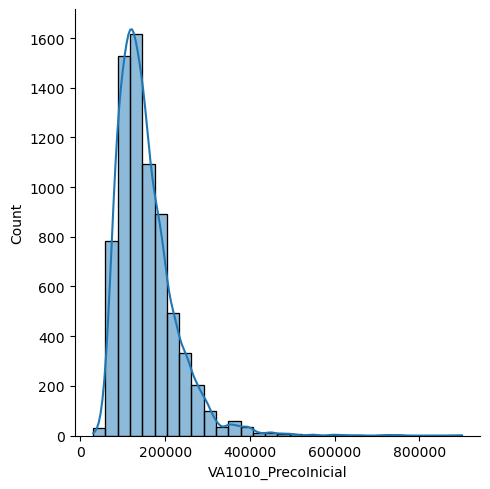

In [498]:
# histogram  for Casasapo Price
sns.displot(casasapo["VA1010_PrecoInicial"], bins=30, kde=True)

# vamos aplicar o log (neste caso, o PB já o fez e vou usar os dados dele)

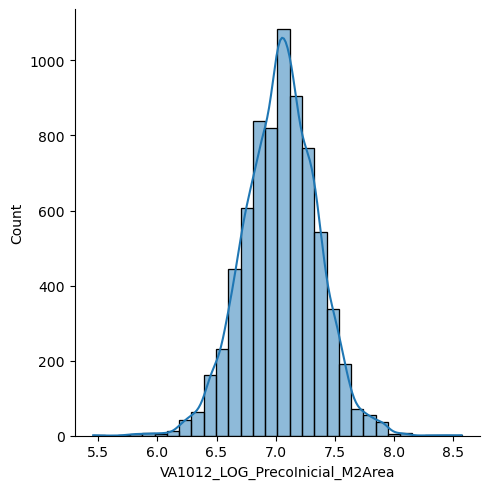

In [499]:
# histogram  for Casasapo Log Price per square meter
sns.displot(casasapo["VA1012_LOG_PrecoInicial_M2Area"], bins=30, kde=True)

# Distribuição mais "normal" e melhor para usar na linreg

In [500]:
casasapo.columns

Index(['ID', 'Natureza', 'Tipologia', 'Preservacao', 'Cluster_old',
       'VA1010_PrecoInicial', 'VA1012_LOG_PrecoInicial_M2Area', 'VA0110_Area',
       'DTA_ano', 'Zone_ID', 'Cluster_LP'],
      dtype='object')

#### 4.1.1 Fix problem with Cluster_LP (label propagation problems)

Divide randomly the dwellings into new clusters (for the problematic clusters that were discovered to be multypolygons - see section 4.1.2a.1)


In [501]:
casasapo[casasapo.isnull().any(axis=1)]

Empty DataFrame
Columns: [ID, Natureza, Tipologia, Preservacao, Cluster_old, VA1010_PrecoInicial, VA1012_LOG_PrecoInicial_M2Area, VA0110_Area, DTA_ano, Zone_ID, Cluster_LP]
Index: []

In [502]:
casasapo["Cluster_LP"].unique()

array([  9.,  45.,  19.,  48.,   2.,   4.,  14.,  38.,   5.,  16.,  49.,
        54.,   1.,  27.,  42.,  35.,   6.,  47.,  30.,   8.,  51.,  22.,
        11.,  56.,  24.,  18.,  39.,  26.,  31.,  13.,  10.,  12.,  43.,
        17.,  41.,  40.,  36.,  21.,   3.,  55.,  33.,  15.,  52.,  32.,
        20.,  53.,   7.,  50.,  25.,  29.,  46.,  34.,  58., 124.,  82.,
        59.,  77.,  65.,  81.,  64., 112.,   0.,  83.,  71.,  63.,  57.,
        60., 116.,  91.,  86.,  99., 105.,  72.,  61.,  89.,  67., 117.,
        37.,  85., 100., 104.,  96.,  44., 107.,  76.,  28., 111., 109.,
        62.,  98., 101.,  75., 131.])

In [503]:
casasapo["Cluster_LP"] = casasapo["Cluster_LP"].astype("int64")

/var/folders/b2/h8wbjqtd1hl1qwb1wvp4t9lr0000gn/T/ipykernel_15094/1534862154.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [504]:
# # This routine doesn't work properly, so it was necessary to manually change the values

# mapping = {
#     22: [22, 156],
#     26: [26, 157],
#     30: [30, 158, 151],
#     40: [40, 159],
#     41: [41, 160],
#     43: [43, 161],
#     60: [162, 152, 60],
#     63: [63, 163, 153],
#     64: [64, 164, 154, 150],
#     103: [103, 165],
#     107: [107, 166, 155],
# }

# casasapo['Cluster_LP'] = casasapo['Cluster_LP'].astype(int)

# np.random.seed(3)


# filtered_mapping = {key: value for key, value in mapping.items() if key in casasapo['Cluster_LP'].unique()}

# # Function to assign new Cluster_LP based on the filtered_mapping dictionary
# def assign_new_cluster_lp(row):
#     if row['Cluster_LP'] in filtered_mapping:
#         new_values = filtered_mapping[row['Cluster_LP']]
#         return np.random.choice(new_values)
#     return row['Cluster_LP']

# # Apply the function to the DataFrame to assign the new Cluster_LP values
# casasapo['New_Cluster_LP'] = casasapo.apply(assign_new_cluster_lp, axis=1)

# # Replace the original 'Cluster_LP' column with the new values
# casasapo['Cluster_LP'] = casasapo['New_Cluster_LP']

# # Drop the intermediate 'New_Cluster_LP' column
# casasapo.drop(columns=['New_Cluster_LP'], inplace=True)



In [505]:
print(casasapo.shape)
print(
    len(casasapo[casasapo["Cluster_LP"] == 22]),
    len(casasapo[casasapo["Cluster_LP"] == 156]),
)
print(
    len(casasapo[casasapo["Cluster_LP"] == 26]),
    len(casasapo[casasapo["Cluster_LP"] == 157]),
)
print(
    len(casasapo[casasapo["Cluster_LP"] == 30]),
    len(casasapo[casasapo["Cluster_LP"] == 151]),
    len(casasapo[casasapo["Cluster_LP"] == 158]),
)
print(
    len(casasapo[casasapo["Cluster_LP"] == 40]),
    len(casasapo[casasapo["Cluster_LP"] == 159]),
)
print(
    len(casasapo[casasapo["Cluster_LP"] == 41]),
    len(casasapo[casasapo["Cluster_LP"] == 160]),
)
print(
    len(casasapo[casasapo["Cluster_LP"] == 43]),
    len(casasapo[casasapo["Cluster_LP"] == 161]),
)
print(
    len(casasapo[casasapo["Cluster_LP"] == 60]),
    len(casasapo[casasapo["Cluster_LP"] == 152]),
    len(casasapo[casasapo["Cluster_LP"] == 162]),
)
print(
    len(casasapo[casasapo["Cluster_LP"] == 63]),
    len(casasapo[casasapo["Cluster_LP"] == 153]),
    len(casasapo[casasapo["Cluster_LP"] == 163]),
)
print(
    len(casasapo[casasapo["Cluster_LP"] == 64]),
    len(casasapo[casasapo["Cluster_LP"] == 154]),
    len(casasapo[casasapo["Cluster_LP"] == 164]),
    len(casasapo[casasapo["Cluster_LP"] == 150]),
)
print(
    len(casasapo[casasapo["Cluster_LP"] == 107]),
    len(casasapo[casasapo["Cluster_LP"] == 166]),
    len(casasapo[casasapo["Cluster_LP"] == 155]),
)

(7241, 11)
3 0
78 0
18 0 0
95 0
85 0
29 0
4 0 0
5 0 0
7 0 0 0
2 0 0


In [506]:
# split dwelling from Cluster 22 between 22 (2) and 156 (1)
# casasapo[casasapo['Cluster_LP']==22].sample(n=1, random_state=1)
casasapo.at[4730, "Cluster_LP"] = 156

In [507]:
# split dwelling from Cluster 26 between 26 (39) and 157 (39)
# casasapo[casasapo['Cluster_LP']==26].sample(n=39, random_state=1)
casasapo.at[78, "Cluster_LP"] = 157
casasapo.at[370, "Cluster_LP"] = 157
casasapo.at[1087, "Cluster_LP"] = 157
casasapo.at[2106, "Cluster_LP"] = 157
casasapo.at[2572, "Cluster_LP"] = 157
casasapo.at[3153, "Cluster_LP"] = 157
casasapo.at[3344, "Cluster_LP"] = 157
casasapo.at[3794, "Cluster_LP"] = 157
casasapo.at[3992, "Cluster_LP"] = 157
casasapo.at[4182, "Cluster_LP"] = 157
casasapo.at[4369, "Cluster_LP"] = 157
casasapo.at[4408, "Cluster_LP"] = 157
casasapo.at[4871, "Cluster_LP"] = 157
casasapo.at[4888, "Cluster_LP"] = 157
casasapo.at[4893, "Cluster_LP"] = 157
casasapo.at[4906, "Cluster_LP"] = 157
casasapo.at[4933, "Cluster_LP"] = 157
casasapo.at[4963, "Cluster_LP"] = 157
casasapo.at[4965, "Cluster_LP"] = 157
casasapo.at[4969, "Cluster_LP"] = 157
casasapo.at[4975, "Cluster_LP"] = 157
casasapo.at[4979, "Cluster_LP"] = 157
casasapo.at[4983, "Cluster_LP"] = 157
casasapo.at[5055, "Cluster_LP"] = 157
casasapo.at[5192, "Cluster_LP"] = 157
casasapo.at[5391, "Cluster_LP"] = 157
casasapo.at[5393, "Cluster_LP"] = 157
casasapo.at[5401, "Cluster_LP"] = 157
casasapo.at[5403, "Cluster_LP"] = 157
casasapo.at[5589, "Cluster_LP"] = 157
casasapo.at[5592, "Cluster_LP"] = 157
casasapo.at[5597, "Cluster_LP"] = 157
casasapo.at[5708, "Cluster_LP"] = 157
casasapo.at[5722, "Cluster_LP"] = 157
casasapo.at[5729, "Cluster_LP"] = 157
casasapo.at[5737, "Cluster_LP"] = 157
casasapo.at[6018, "Cluster_LP"] = 157
casasapo.at[6532, "Cluster_LP"] = 157
casasapo.at[6810, "Cluster_LP"] = 157

In [508]:
# split dwelling from Cluster 30 between 30 (10), 151 (4), 158 (4)
# casasapo[casasapo['Cluster_LP']==30].sample(n=8, random_state=1)
casasapo.at[62, "Cluster_LP"] = 151
casasapo.at[699, "Cluster_LP"] = 158
casasapo.at[1927, "Cluster_LP"] = 151
casasapo.at[2148, "Cluster_LP"] = 158
casasapo.at[2707, "Cluster_LP"] = 151
casasapo.at[3808, "Cluster_LP"] = 158
casasapo.at[4648, "Cluster_LP"] = 151
casasapo.at[5862, "Cluster_LP"] = 158

In [509]:
# split dwelling from Cluster 40 between 40 (10) and 159 (10)
# casasapo[casasapo['Cluster_LP']==40].sample(n=10, random_state=1)
casasapo.at[3951, "Cluster_LP"] = 159
casasapo.at[3650, "Cluster_LP"] = 159
casasapo.at[4374, "Cluster_LP"] = 159
casasapo.at[5154, "Cluster_LP"] = 159
casasapo.at[6635, "Cluster_LP"] = 159
casasapo.at[4381, "Cluster_LP"] = 159
casasapo.at[7105, "Cluster_LP"] = 159
casasapo.at[4098, "Cluster_LP"] = 159
casasapo.at[7130, "Cluster_LP"] = 159
casasapo.at[7177, "Cluster_LP"] = 159

In [510]:
# split dwelling from Cluster 41 between 41 (75) and 160 (10)
# casasapo[casasapo['Cluster_LP']==41].sample(n=10, random_state=1)
casasapo.at[4455, "Cluster_LP"] = 160
casasapo.at[4663, "Cluster_LP"] = 160
casasapo.at[2947, "Cluster_LP"] = 160
casasapo.at[4534, "Cluster_LP"] = 160
casasapo.at[3677, "Cluster_LP"] = 160
casasapo.at[7017, "Cluster_LP"] = 160
casasapo.at[5338, "Cluster_LP"] = 160
casasapo.at[6213, "Cluster_LP"] = 160
casasapo.at[7280, "Cluster_LP"] = 160
casasapo.at[5225, "Cluster_LP"] = 160

In [511]:
# split dwelling from Cluster 43 between 43 (15) and 161 (14)
# casasapo[casasapo['Cluster_LP']==43].sample(n=14, random_state=1)
casasapo.at[573, "Cluster_LP"] = 161
casasapo.at[5227, "Cluster_LP"] = 161
casasapo.at[3307, "Cluster_LP"] = 161
casasapo.at[4801, "Cluster_LP"] = 161
casasapo.at[5684, "Cluster_LP"] = 161
casasapo.at[3347, "Cluster_LP"] = 161
casasapo.at[423, "Cluster_LP"] = 161
casasapo.at[436, "Cluster_LP"] = 161
casasapo.at[5677, "Cluster_LP"] = 161
casasapo.at[5345, "Cluster_LP"] = 161
casasapo.at[425, "Cluster_LP"] = 161
casasapo.at[222, "Cluster_LP"] = 161
casasapo.at[5683, "Cluster_LP"] = 161
casasapo.at[431, "Cluster_LP"] = 161

In [512]:
# split dwelling from Cluster 60 between 60 (15), 152 (1), 162 (1)
# casasapo[casasapo['Cluster_LP']==60].sample(n=2, random_state=1)
casasapo.at[1682, "Cluster_LP"] = 152
casasapo.at[1540, "Cluster_LP"] = 162

In [513]:
# split dwelling from Cluster 63 between 63 (15), 153 (1), 163 (2)
# casasapo[casasapo['Cluster_LP']==63].sample(n=3, random_state=1)
casasapo.at[6946, "Cluster_LP"] = 153
casasapo.at[6752, "Cluster_LP"] = 163
casasapo.at[7264, "Cluster_LP"] = 163

In [514]:
# split dwelling from Cluster 64 between 64 (1), 154 (2), 164 (2), 150 (2)
# casasapo[casasapo['Cluster_LP']==64].sample(n=6, random_state=1)

casasapo.at[7121, "Cluster_LP"] = 154
casasapo.at[2008, "Cluster_LP"] = 164
casasapo.at[1004, "Cluster_LP"] = 150
casasapo.at[970, "Cluster_LP"] = 154
casasapo.at[6514, "Cluster_LP"] = 164
casasapo.at[6028, "Cluster_LP"] = 150

In [515]:
# split dwelling from Cluster 107 between 107 (0), 166 (1), 155 (1)
# casasapo[casasapo['Cluster_LP']==107].sample(n=2, random_state=1)
casasapo.at[6408, "Cluster_LP"] = 166
casasapo.at[6695, "Cluster_LP"] = 155

In [516]:
print(casasapo.shape)
print(
    len(casasapo[casasapo["Cluster_LP"] == 22]),
    len(casasapo[casasapo["Cluster_LP"] == 156]),
)
print(
    len(casasapo[casasapo["Cluster_LP"] == 26]),
    len(casasapo[casasapo["Cluster_LP"] == 157]),
)
print(
    len(casasapo[casasapo["Cluster_LP"] == 30]),
    len(casasapo[casasapo["Cluster_LP"] == 151]),
    len(casasapo[casasapo["Cluster_LP"] == 158]),
)
print(
    len(casasapo[casasapo["Cluster_LP"] == 40]),
    len(casasapo[casasapo["Cluster_LP"] == 159]),
)
print(
    len(casasapo[casasapo["Cluster_LP"] == 41]),
    len(casasapo[casasapo["Cluster_LP"] == 160]),
)
print(
    len(casasapo[casasapo["Cluster_LP"] == 43]),
    len(casasapo[casasapo["Cluster_LP"] == 161]),
)
print(
    len(casasapo[casasapo["Cluster_LP"] == 60]),
    len(casasapo[casasapo["Cluster_LP"] == 152]),
    len(casasapo[casasapo["Cluster_LP"] == 162]),
)
print(
    len(casasapo[casasapo["Cluster_LP"] == 63]),
    len(casasapo[casasapo["Cluster_LP"] == 153]),
    len(casasapo[casasapo["Cluster_LP"] == 163]),
)
print(
    len(casasapo[casasapo["Cluster_LP"] == 64]),
    len(casasapo[casasapo["Cluster_LP"] == 154]),
    len(casasapo[casasapo["Cluster_LP"] == 164]),
    len(casasapo[casasapo["Cluster_LP"] == 150]),
)
print(
    len(casasapo[casasapo["Cluster_LP"] == 107]),
    len(casasapo[casasapo["Cluster_LP"] == 166]),
    len(casasapo[casasapo["Cluster_LP"] == 155]),
)

(7241, 11)
2 1
39 39
10 4 4
85 10
75 10
15 14
2 1 1
2 1 2
1 2 2 2
0 1 1


In [517]:
casasapo[casasapo.isnull().any(axis=1)]

Empty DataFrame
Columns: [ID, Natureza, Tipologia, Preservacao, Cluster_old, VA1010_PrecoInicial, VA1012_LOG_PrecoInicial_M2Area, VA0110_Area, DTA_ano, Zone_ID, Cluster_LP]
Index: []

In [518]:
casasapo["Cluster_LP"].value_counts().tail(20)

Cluster_LP
109    2
85     2
63     2
60     2
101    2
67     2
164    2
155    1
153    1
64     1
98     1
152    1
166    1
99     1
96     1
156    1
71     1
117    1
162    1
131    1
Name: count, dtype: int64

### 4.1.2 Cluster Data (based on Casa Sapo Data)


#### 4.1.2a Initial Clusters


In [519]:
u_updated

BGRI11  Cluster_LP      area
0    1050100510         5.0  0.141979
1    1050100512         5.0  0.141979
2    1051201803        45.0  0.048703
3    1050501104       163.0  0.055570
4    1050600101        80.0  0.047657
..          ...         ...       ...
494  1050100405         5.0  0.141979
495  1050100404        21.0  0.049197
496  1051000306        21.0  0.049197
497  1051000305        21.0  0.049197
498  1050100511         5.0  0.141979

[499 rows x 3 columns]

In [520]:
# df de relação entre subsecção e cluster
u

BGRI11  BGRI11_M1LABELS_LP_AdjMatGeoNetDist
0     1050100510                                  5.0
1     1050100512                                  5.0
2     1050100701                                  4.0
3     1051201803                                 43.0
4     1050201005                                  7.0
...          ...                                  ...
1914  1100302321                                 81.0
1915  1100400210                                 81.0
1916  1100400209                                 81.0
1917  1100400218                                123.0
1918  1100400217                                131.0

[1919 rows x 2 columns]

In [521]:
u = u.astype({"BGRI11_M1LABELS_LP_AdjMatGeoNetDist": "Int64"})

In [522]:
# NaN values for areas that belong to São Jacinto area - no impact on the analysis
u[u["BGRI11_M1LABELS_LP_AdjMatGeoNetDist"].isna()]

BGRI11  BGRI11_M1LABELS_LP_AdjMatGeoNetDist
537   1051100136                                 <NA>
871   1051100219                                 <NA>
872   1051100106                                 <NA>
873   1051100209                                 <NA>
876   1051100208                                 <NA>
877   1051100207                                 <NA>
878   1051100206                                 <NA>
882   1051100105                                 <NA>
883   1051100205                                 <NA>
886   1051100104                                 <NA>
897   1051100103                                 <NA>
898   1051100204                                 <NA>
907   1051100102                                 <NA>
908   1051100101                                 <NA>
912   1051100203                                 <NA>
1029  1051100137                                 <NA>
1035  1051100135                                 <NA>
1039  1051100218                                 <NA>
1040  1051100134                                 <NA>
1150  1051100202                                 <NA>
1158  1051100201                                 <NA>
1294  1051100217                                 <NA>
1295  1051100133                                 <NA>
1297  1051100132                                 <NA>
1298  1051100131                                 <NA>
1299  1051100130                                 <NA>
1300  1051100129                                 <NA>
1303  1051100128                                 <NA>
1304  1051100216                                 <NA>
1305  1051100127                                 <NA>
1306  1051100126                                 <NA>
1311  1051100125                                 <NA>
1312  1051100124                                 <NA>
1313  1051100123                                 <NA>
1315  1051100122                                 <NA>
1316  1051100121                                 <NA>
1317  1051100215                                 <NA>
1318  1051100214                                 <NA>
1321  1051100120                                 <NA>
1322  1051100119                                 <NA>
1324  1051100118                                 <NA>
1325  1051100117                                 <NA>
1326  1051100212                                 <NA>
1327  1051100116                                 <NA>
1328  1051100211                                 <NA>
1329  1051100115                                 <NA>
1330  1051100114                                 <NA>
1332  1051100213                                 <NA>
1334  1051100113                                 <NA>
1335  1051100112                                 <NA>
1336  1051100111                                 <NA>
1337  1051100110                                 <NA>
1338  1051100109                                 <NA>
1339  1051100108                                 <NA>
1341  1051100107                                 <NA>
1342  1051100210                                 <NA>

In [523]:
u["BGRI11_M1LABELS_LP_AdjMatGeoNetDist"].unique()

<IntegerArray>
[  5,   4,  43,   7,  63,  80,  45,  31,  57, 108,
 ...
  13,  16, 103,  91, 110, 109,  85,  92,  89, 105]
Length: 131, dtype: Int64

In [524]:
u_updated["Cluster_LP"].unique()

array([  5.,  45., 163.,  80.,  31.,  57., 108.,   3.,  29.,  28.,  21.,
        59., 106.,  40.,  63.,  41.,  42., 161., 159., 102., 166., 160.,
        82.,  14.,  18., 101.,  30., 154.,  65.,  67., 164.,  25.,  27.,
        37.,  24.,  90., 104., 111.,  58., 158., 151., 125., 150.,  22.,
        66.,  26.,  43.,  64., 100.,  38., 124., 155.,  19.,  23.,  nan,
       129.,  39.,  13., 103., 156.,  20., 153.,  91.,  60., 110., 109.,
       107., 157.,  85., 162.,  92., 152., 165.,  89., 105.])

In [525]:
u["BGRI11_M1LABELS_LP_AdjMatGeoNetDist"].nunique()

130

In [526]:
u_updated["Cluster_LP"].nunique()

74

In [527]:
# load admnistrative limits for portuguese territory (subsection level)
PT_SUBSEC = gpd.read_file("../Data/BGRI_2011/CONTINENTE/BGRI11_CONT.shp")

In [528]:
PT_SUBSEC.columns

Index(['OBJECTID', 'DTMN11', 'FR11', 'SEC11', 'SS11', 'BGRI11', 'LUG11',
       'LUG11DESIG', 'area', 'geometry'],
      dtype='object')

In [529]:
PT_SUBSEC.shape

(255844, 10)

In [530]:
PT_SUBSEC.crs

<Projected CRS: PROJCS["ETRS_1989_TM06-Portugal",GEOGCS["ETRS89",D ...>
Name: ETRS_1989_TM06-Portugal
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [531]:
# convert to EPSG:3763
PT_SUBSEC = PT_SUBSEC.to_crs("EPSG:3763")

In [532]:
PT_SUBSEC.head()

OBJECTID DTMN11 FR11 SEC11 SS11       BGRI11   LUG11 LUG11DESIG      area  \
0       548   0407   02   001   04  04070200104  013810    Abreiro  0.114464   
1       549   0407   02   001   06  04070200106  013810    Abreiro  0.054224   
2       550   0407   02   001   01  04070200101  013811    Milhais  0.066225   
3       551   0407   02   001   02  04070200102  013811    Milhais  0.130057   
4       552   0407   29   001   03  04072900103  013866  Pai Torto  0.067553   

                                            geometry  
0  POLYGON ((70385.364 187253.985, 70468.973 1871...  
1  POLYGON ((70345.582 187206.405, 70365.695 1871...  
2  POLYGON ((67451.278 188137.559, 67436.483 1881...  
3  POLYGON ((67881.058 188228.057, 67897.728 1882...  
4  POLYGON ((71675.138 205540.515, 71691.487 2055...

In [533]:
# filter for Aveiro LUG
filtro = ["014757"]

In [534]:
# apply filter
AVR = PT_SUBSEC[PT_SUBSEC["LUG11"].isin(filtro)]

In [535]:
AVR["FR11"].unique()

array(['01', '12', '05', '06', '10', '13'], dtype=object)

In [536]:
AVR.shape

(499, 10)

In [537]:
# filter out residuals
AVR = AVR[AVR["LUG11"] != "999999"]

In [538]:
AVR.shape

(499, 10)

In [539]:
CLUSTER_FR = AVR.dissolve(by="FR11")
CLUSTER_FR.reset_index(inplace=True)
CLUSTER_LUG = AVR.dissolve(by="LUG11")
CLUSTER_LUG.reset_index(inplace=True)

In [540]:
AVR.shape

(499, 10)

In [541]:
AVR.head()

OBJECTID DTMN11 FR11 SEC11 SS11       BGRI11   LUG11 LUG11DESIG  \
16863     16666   0105   01   005   10  01050100510  014757     Aveiro   
16864     16667   0105   01   005   12  01050100512  014757     Aveiro   
31320     16653   0105   12   018   03  01051201803  014757     Aveiro   
31323     16656   0105   05   011   04  01050501104  014757     Aveiro   
31324     16657   0105   06   001   01  01050600101  014757     Aveiro   

           area                                           geometry  
16863  0.141979  POLYGON ((-43593.399 105717.183, -43670.151 10...  
16864  0.174176  POLYGON ((-43164.196 105698.88, -43157.561 105...  
31320  0.093782  POLYGON ((-42260.68 107955.967, -42278.449 107...  
31323  0.055570  POLYGON ((-42047.654 109367.038, -42348.791 10...  
31324  0.047657  POLYGON ((-44170.087 107905.33, -44144.354 107...

In [542]:
AVR.shape

(499, 10)

In [543]:
# convert for merging
AVR["BGRI11"] = AVR["BGRI11"].astype("Int64")

In [544]:
# rename columns - this clusters are related to the Label Propagation algorithm applied by PB
u.rename(columns={"BGRI11_M1LABELS_LP_AdjMatGeoNetDist": "Cluster_LP"}, inplace=True)

In [545]:
u["Cluster_LP"].nunique()

130

In [546]:
u["Cluster_LP"].unique()

<IntegerArray>
[  5,   4,  43,   7,  63,  80,  45,  31,  57, 108,
 ...
  13,  16, 103,  91, 110, 109,  85,  92,  89, 105]
Length: 131, dtype: Int64

In [547]:
u_updated.drop(["area"], axis=1, inplace=True)

In [548]:
u_updated

BGRI11  Cluster_LP
0    1050100510         5.0
1    1050100512         5.0
2    1051201803        45.0
3    1050501104       163.0
4    1050600101        80.0
..          ...         ...
494  1050100405         5.0
495  1050100404        21.0
496  1051000306        21.0
497  1051000305        21.0
498  1050100511         5.0

[499 rows x 2 columns]

In [549]:
u_updated["Cluster_LP"].nunique()

74

In [550]:
u

BGRI11  Cluster_LP
0     1050100510           5
1     1050100512           5
2     1050100701           4
3     1051201803          43
4     1050201005           7
...          ...         ...
1914  1100302321          81
1915  1100400210          81
1916  1100400209          81
1917  1100400218         123
1918  1100400217         131

[1919 rows x 2 columns]

In [551]:
# create a new dataframe with the cluster info for Aveiro and Ílhavo subsections
CLUSTER_LP = AVR.merge(u_updated, on="BGRI11", how="left")

In [552]:
CLUSTER_LP.shape

(499, 11)

In [553]:
CLUSTER_LP.head()

OBJECTID DTMN11 FR11 SEC11 SS11      BGRI11   LUG11 LUG11DESIG      area  \
0     16666   0105   01   005   10  1050100510  014757     Aveiro  0.141979   
1     16667   0105   01   005   12  1050100512  014757     Aveiro  0.174176   
2     16653   0105   12   018   03  1051201803  014757     Aveiro  0.093782   
3     16656   0105   05   011   04  1050501104  014757     Aveiro  0.055570   
4     16657   0105   06   001   01  1050600101  014757     Aveiro  0.047657   

                                            geometry  Cluster_LP  
0  POLYGON ((-43593.399 105717.183, -43670.151 10...         5.0  
1  POLYGON ((-43164.196 105698.88, -43157.561 105...         5.0  
2  POLYGON ((-42260.68 107955.967, -42278.449 107...        45.0  
3  POLYGON ((-42047.654 109367.038, -42348.791 10...       163.0  
4  POLYGON ((-44170.087 107905.33, -44144.354 107...        80.0

In [554]:
CLUSTER_LP.dtypes

OBJECTID         int64
DTMN11          object
FR11            object
SEC11           object
SS11            object
BGRI11           Int64
LUG11           object
LUG11DESIG      object
area           float64
geometry      geometry
Cluster_LP     float64
dtype: object

In [555]:
# drop unnecessary columns
CLUSTER_LP.drop(
    ["OBJECTID", "DTMN11", "SEC11", "FR11", "LUG11", "SS11", "BGRI11", "LUG11DESIG"],
    axis=1,
    inplace=True,
)

In [556]:
CLUSTER_LP["Cluster_LP"].nunique()

74

In [557]:
CLUSTER_LP["Cluster_LP"].unique()

array([  5.,  45., 163.,  80.,  31.,  57., 108.,   3.,  29.,  28.,  21.,
        59., 106.,  40.,  63.,  41.,  42., 161., 159., 102., 166., 160.,
        82.,  14.,  18., 101.,  30., 154.,  65.,  67., 164.,  25.,  27.,
        37.,  24.,  90., 104., 111.,  58., 158., 151., 125., 150.,  22.,
        66.,  26.,  43.,  64., 100.,  38., 124., 155.,  19.,  23.,  nan,
       129.,  39.,  13., 103., 156.,  20., 153.,  91.,  60., 110., 109.,
       107., 157.,  85., 162.,  92., 152., 165.,  89., 105.])

In [558]:
CLUSTER_LP.shape

(499, 3)

##### 4.1.2a.1 Correction of the Clusters

This section is important to generate the variable u2 (that is used as u_updated in the section above).

This was necessary to be performed because some clusters from the Label propagation process (not done by me) are multypolygons. These multypolygons are "exploded" and labeled as new polygons (its components), generating a new u2 variable with better results than the variable u that was supplied by my thesis coordinator.


In [559]:
# commented because this was used to generate the u2 file, used above as u_updated

# CLUSTER_LP = CLUSTER_LP.dissolve(by='Cluster_LP').explode()
# CLUSTER_LP.reset_index(inplace=True)

# CLUSTER_LP0=CLUSTER_LP[CLUSTER_LP['level_1']==0]
# CLUSTER_LP1=CLUSTER_LP[CLUSTER_LP['level_1']==1]
# CLUSTER_LP2=CLUSTER_LP[CLUSTER_LP['level_1']==2]
# CLUSTER_LP3=CLUSTER_LP[CLUSTER_LP['level_1']==3]
# CLUSTER_LP0.reset_index(inplace=True)
# CLUSTER_LP1.reset_index(inplace=True)
# CLUSTER_LP2.reset_index(inplace=True)
# CLUSTER_LP3.reset_index(inplace=True)

In [560]:
# commented because this was used to generate the u2 file, used above as u_updated
# CLUSTER_LP0.Cluster_LP.unique()

In [561]:
# commented because this was used to generate the u2 file, used above as u_updated
# CLUSTER_LP0['Cluster_LP'].unique()

In [562]:
# commented because this was used to generate the u2 file, used above as u_updated
# CLUSTER_LP1['Cluster_LP'].unique()

In [563]:
# commented because this was used to generate the u2 file, used above as u_updated
# CLUSTER_LP2['Cluster_LP'].unique()

In [564]:
# commented because this was used to generate the u2 file, used above as u_updated
# CLUSTER_LP3['Cluster_LP'].unique()

In [565]:
# commented because this was used to generate the u2 file, used above as u_updated

# CLUSTER_LP3['Cluster_LP'] = np.where(CLUSTER_LP3['Cluster_LP']==64, 150, CLUSTER_LP3['Cluster_LP'])
# CLUSTER_LP2['Cluster_LP'] = np.where(CLUSTER_LP2['Cluster_LP']==30, 151, CLUSTER_LP2['Cluster_LP'])
# CLUSTER_LP2['Cluster_LP'] = np.where(CLUSTER_LP2['Cluster_LP']==60, 152, CLUSTER_LP2['Cluster_LP'])
# CLUSTER_LP2['Cluster_LP'] = np.where(CLUSTER_LP2['Cluster_LP']==63, 153, CLUSTER_LP2['Cluster_LP'])
# CLUSTER_LP2['Cluster_LP'] = np.where(CLUSTER_LP2['Cluster_LP']==64, 154, CLUSTER_LP2['Cluster_LP'])
# CLUSTER_LP2['Cluster_LP'] = np.where(CLUSTER_LP2['Cluster_LP']==107, 155, CLUSTER_LP2['Cluster_LP'])
# CLUSTER_LP1['Cluster_LP'] = np.where(CLUSTER_LP1['Cluster_LP']==22, 156, CLUSTER_LP1['Cluster_LP'])
# CLUSTER_LP1['Cluster_LP'] = np.where(CLUSTER_LP1['Cluster_LP']==26, 157, CLUSTER_LP1['Cluster_LP'])
# CLUSTER_LP1['Cluster_LP'] = np.where(CLUSTER_LP1['Cluster_LP']==30, 158, CLUSTER_LP1['Cluster_LP'])
# CLUSTER_LP1['Cluster_LP'] = np.where(CLUSTER_LP1['Cluster_LP']==40, 159, CLUSTER_LP1['Cluster_LP'])
# CLUSTER_LP1['Cluster_LP'] = np.where(CLUSTER_LP1['Cluster_LP']==41, 160, CLUSTER_LP1['Cluster_LP'])
# CLUSTER_LP1['Cluster_LP'] = np.where(CLUSTER_LP1['Cluster_LP']==43, 161, CLUSTER_LP1['Cluster_LP'])
# CLUSTER_LP1['Cluster_LP'] = np.where(CLUSTER_LP1['Cluster_LP']==60, 162, CLUSTER_LP1['Cluster_LP'])
# CLUSTER_LP1['Cluster_LP'] = np.where(CLUSTER_LP1['Cluster_LP']==63, 163, CLUSTER_LP1['Cluster_LP'])
# CLUSTER_LP1['Cluster_LP'] = np.where(CLUSTER_LP1['Cluster_LP']==64, 164, CLUSTER_LP1['Cluster_LP'])
# CLUSTER_LP1['Cluster_LP'] = np.where(CLUSTER_LP1['Cluster_LP']==103, 165, CLUSTER_LP1['Cluster_LP'])
# CLUSTER_LP1['Cluster_LP'] = np.where(CLUSTER_LP1['Cluster_LP']==107, 166, CLUSTER_LP1['Cluster_LP'])

# CLUSTER_LP=pd.concat([CLUSTER_LP0,CLUSTER_LP1,CLUSTER_LP2,CLUSTER_LP3],axis=0)

# CLUSTER_LP.drop(['level_1','index'], axis=1, inplace=True)

In [566]:
CLUSTER_LP.head()

area                                           geometry  Cluster_LP
0  0.141979  POLYGON ((-43593.399 105717.183, -43670.151 10...         5.0
1  0.174176  POLYGON ((-43164.196 105698.88, -43157.561 105...         5.0
2  0.093782  POLYGON ((-42260.68 107955.967, -42278.449 107...        45.0
3  0.055570  POLYGON ((-42047.654 109367.038, -42348.791 10...       163.0
4  0.047657  POLYGON ((-44170.087 107905.33, -44144.354 107...        80.0

In [567]:
# drop unnecessary columns
CLUSTER_LUG.drop(
    ["OBJECTID", "DTMN11", "SEC11", "FR11", "SS11", "BGRI11", "LUG11DESIG"],
    axis=1,
    inplace=True,
)
CLUSTER_FR.drop(
    ["OBJECTID", "DTMN11", "SEC11", "LUG11", "SS11", "BGRI11", "LUG11DESIG"],
    axis=1,
    inplace=True,
)

In [568]:
CLUSTER_LP.head()

area                                           geometry  Cluster_LP
0  0.141979  POLYGON ((-43593.399 105717.183, -43670.151 10...         5.0
1  0.174176  POLYGON ((-43164.196 105698.88, -43157.561 105...         5.0
2  0.093782  POLYGON ((-42260.68 107955.967, -42278.449 107...        45.0
3  0.055570  POLYGON ((-42047.654 109367.038, -42348.791 10...       163.0
4  0.047657  POLYGON ((-44170.087 107905.33, -44144.354 107...        80.0

In [569]:
CLUSTER_LUG

LUG11                                           geometry      area
0  014757  POLYGON ((-43858.355 106177.76, -43870.452 106...  0.141979

In [570]:
CLUSTER_FR

FR11                                           geometry      area
0   01  POLYGON ((-43425.018 105292.668, -43469.109 10...  0.141979
1   05  POLYGON ((-42234.961 107994.437, -42243.784 10...  0.055570
2   06  POLYGON ((-43906.302 106508.92, -43914.801 106...  0.047657
3   10  POLYGON ((-41907.078 105291.591, -41922.768 10...  0.049197
4   12  POLYGON ((-44088.695 108184.616, -44154.064 10...  0.093782
5   13  POLYGON ((-41175.314 106222.7, -41230.454 1062...  0.027054

In [571]:
CLUSTER_LP = CLUSTER_LP.dissolve(by="Cluster_LP").reset_index()

<Axes: >

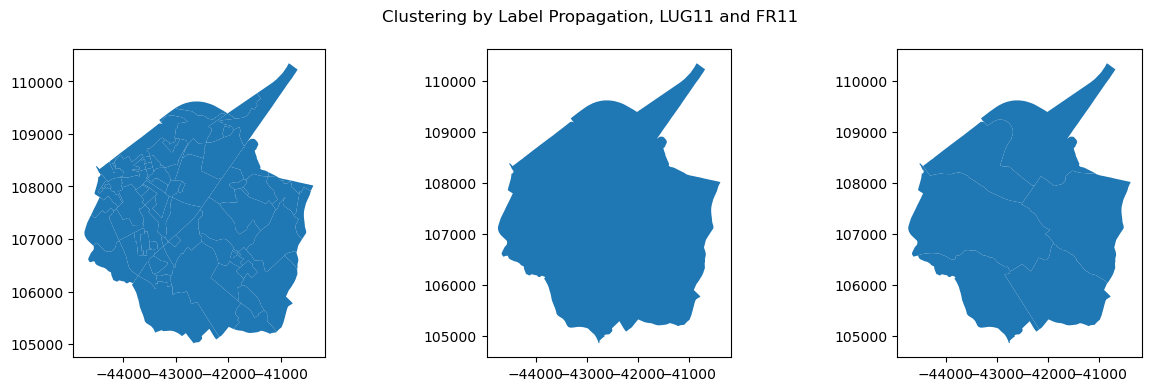

In [572]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle("Clustering by Label Propagation, LUG11 and FR11")
CLUSTER_LP.plot(ax=ax1)
CLUSTER_LUG.plot(ax=ax2)
CLUSTER_FR.plot(ax=ax3)

Text(0.5, 1.0, 'Representação das 74 zonas base geradas')

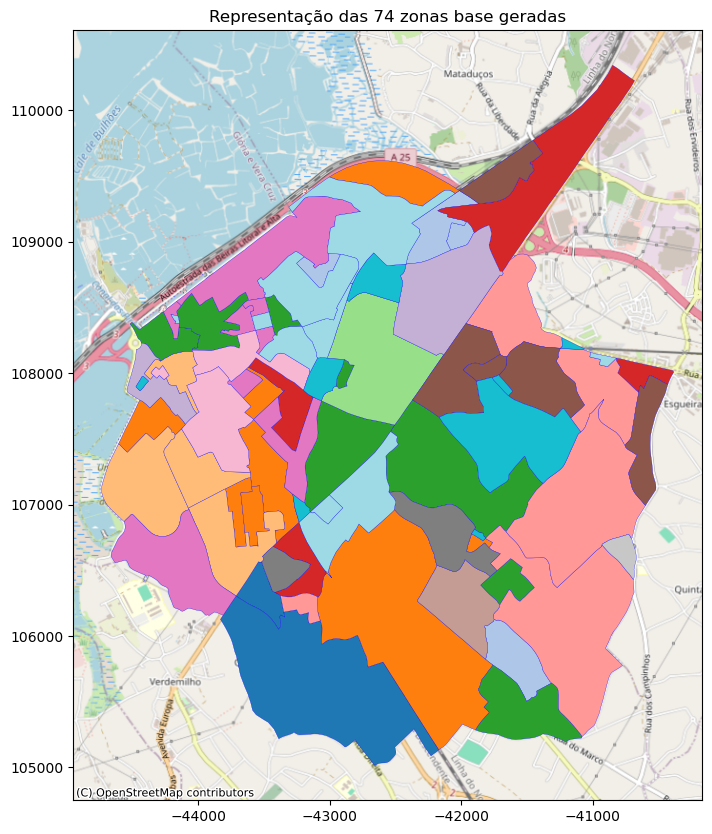

In [573]:
# print the result from the clustering with Label Propagation

ax = CLUSTER_LP.plot(
    figsize=(10, 10),
    column="Cluster_LP",
    edgecolor="b",
    legend=False,
    linewidth=0.2,
    cmap="tab20",
)
cx.add_basemap(ax, crs=CLUSTER_LP.crs, source=cx.providers.OpenStreetMap.Mapnik)
plt.title("Representação das 74 zonas base geradas")

In [574]:
CLUSTER_LP.shape

(74, 3)

In [575]:
CLUSTER_LUG.shape

(1, 3)

In [576]:
CLUSTER_FR.shape

(6, 3)

In [577]:
# AVR_C=AVR.copy()

In [578]:
# create a centroid for the geometries
# AVR_C['centroid'] = AVR_C.centroid

In [579]:
# rename columns so centroid is the geometry for the geodataframe AVR_C (necessary for the spatial join)
# AVR_C.rename(columns={"geometry":"geometry2","centroid": "geometry"}, inplace=True)

In [580]:
# AVR_C.crs==CLUSTER_LP.crs

In [581]:
# commented because this was used to generate the u2 file, used above as u_updated
# u2=gpd.sjoin(AVR_C[['BGRI11','geometry']],CLUSTER_LP, how='left', predicate='intersects')

In [582]:
# commented because this was used to generate the u2 file, used above as u_updated
# u2['Cluster_LP'].unique()

In [583]:
# commented because this was used to generate the u2 file, used above as u_updated
# u2['Cluster_LP'].nunique()

In [584]:
# commented because this was used to generate the u2 file, used above as u_updated
# u2.drop(columns=['geometry','index_right'], inplace=True)

In [585]:
# commented because this was used to generate the u2 file, used above as u_updated
# u2.reset_index(drop=True, inplace=True)

In [586]:
# commented because this was used to generate the u2 file, used above as u_updated
# u2

In [587]:
# commented because this was used to generate the u2 file, used above as u_updated
# u2.to_csv('../Data/BGRI11_AVRILH_M1LABELS_LP_AdjMatGeoNetDist_v2.csv', index=False)

#### 4.1.2b Merge Cluster Data with CAOP2011


In [588]:
AVR_C = AVR.copy()

In [589]:
# create a centroid for the geometries
AVR_C["centroid"] = AVR_C.centroid

In [590]:
# rename columns so centroid is the geometry for the geodataframe AVR_C (necessary for the spatial join)
AVR_C.rename(columns={"geometry": "geometry2", "centroid": "geometry"}, inplace=True)

In [591]:
AVR_C.head()

OBJECTID DTMN11 FR11 SEC11 SS11      BGRI11   LUG11 LUG11DESIG  \
16863     16666   0105   01   005   10  1050100510  014757     Aveiro   
16864     16667   0105   01   005   12  1050100512  014757     Aveiro   
31320     16653   0105   12   018   03  1051201803  014757     Aveiro   
31323     16656   0105   05   011   04  1050501104  014757     Aveiro   
31324     16657   0105   06   001   01  1050600101  014757     Aveiro   

           area                                          geometry2  \
16863  0.141979  POLYGON ((-43593.399 105717.183, -43670.151 10...   
16864  0.174176  POLYGON ((-43164.196 105698.88, -43157.561 105...   
31320  0.093782  POLYGON ((-42260.68 107955.967, -42278.449 107...   
31323  0.055570  POLYGON ((-42047.654 109367.038, -42348.791 10...   
31324  0.047657  POLYGON ((-44170.087 107905.33, -44144.354 107...   

                            geometry  
16863    POINT (-43606.9 105970.559)  
16864  POINT (-43417.728 105563.669)  
31320  POINT (-42695.718 107767.532)  
31323  POINT (-42369.532 109270.065)  
31324  POINT (-44168.165 107788.391)

In [592]:
AVR_C.shape

(499, 11)

In [593]:
AVR_C.crs

<Projected CRS: EPSG:3763>
Name: ETRS89 / Portugal TM06
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Portugal - mainland - onshore.
- bounds: (-9.56, 36.95, -6.19, 42.16)
Coordinate Operation:
- name: Portugual TM06
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [594]:
CLUSTER_LP.shape

(74, 3)

In [595]:
AVR_C.shape

(499, 11)

In [596]:
CLUSTER_LP["Cluster_LP"].unique()

array([  3.,   5.,  13.,  14.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,
        25.,  26.,  27.,  28.,  29.,  30.,  31.,  37.,  38.,  39.,  40.,
        41.,  42.,  43.,  45.,  57.,  58.,  59.,  60.,  63.,  64.,  65.,
        66.,  67.,  80.,  82.,  85.,  89.,  90.,  91.,  92., 100., 101.,
       102., 103., 104., 105., 106., 107., 108., 109., 110., 111., 124.,
       125., 129., 150., 151., 152., 153., 154., 155., 156., 157., 158.,
       159., 160., 161., 162., 163., 164., 165., 166.])

<Axes: >

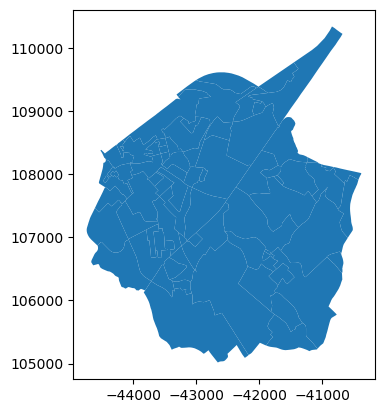

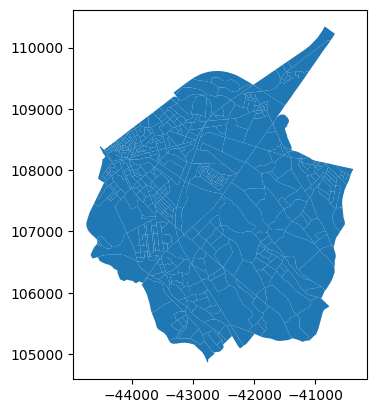

In [597]:
CLUSTER_LP.plot()
AVR.plot()

In [598]:
AVR_C.crs == CLUSTER_LP.crs == CLUSTER_LUG.crs == CLUSTER_FR.crs

True

In [599]:
# bring Cluster Coding to the temp dataframe (with DICOFRESUBSEC info)
AVR = gpd.sjoin(
    AVR_C, CLUSTER_LP[["Cluster_LP", "geometry"]], how="left", predicate="intersects"
)

In [600]:
# drop unnecessary columns and rename back geometry 2 to geometry
AVR.drop(["geometry", "index_right"], axis=1, inplace=True)
AVR.rename(columns={"geometry2": "geometry"}, inplace=True)

In [601]:
AVR.head()

OBJECTID DTMN11 FR11 SEC11 SS11      BGRI11   LUG11 LUG11DESIG  \
16863     16666   0105   01   005   10  1050100510  014757     Aveiro   
16864     16667   0105   01   005   12  1050100512  014757     Aveiro   
31320     16653   0105   12   018   03  1051201803  014757     Aveiro   
31323     16656   0105   05   011   04  1050501104  014757     Aveiro   
31324     16657   0105   06   001   01  1050600101  014757     Aveiro   

           area                                           geometry  Cluster_LP  
16863  0.141979  POLYGON ((-43593.399 105717.183, -43670.151 10...         5.0  
16864  0.174176  POLYGON ((-43164.196 105698.88, -43157.561 105...         5.0  
31320  0.093782  POLYGON ((-42260.68 107955.967, -42278.449 107...        45.0  
31323  0.055570  POLYGON ((-42047.654 109367.038, -42348.791 10...       163.0  
31324  0.047657  POLYGON ((-44170.087 107905.33, -44144.354 107...        80.0

In [602]:
AVR.shape

(499, 11)

### 4.1.3 PY Data


In [603]:
PY_data.shape

(20070, 11)

In [604]:
PY_data2 = PY_data.copy()
PY_data2 = PY_data2[["ID", "CONSTRUCTION_YEAR", "ADD_LONGITUDE", "ADD_LATITUDE"]]

In [605]:
# create a geodataframe for the PY data
gdf_PY = gpd.GeoDataFrame(
    PY_data, geometry=gpd.points_from_xy(PY_data.ADD_LONGITUDE, PY_data.ADD_LATITUDE)
)

In [606]:
# drop unnecessary columns
gdf_PY = gdf_PY.drop(["ADD_LATITUDE", "ADD_LONGITUDE"], axis=1)

In [607]:
# set crs to EPSG:4326
gdf_PY = gdf_PY.set_crs("epsg:4326")

In [608]:
# convert to EPSG:3763
gdf_PY = gdf_PY.to_crs("epsg:3763")

<Axes: >

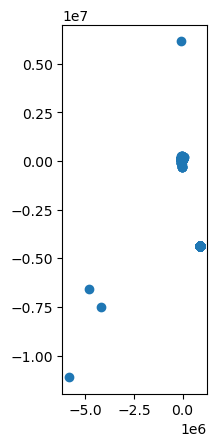

In [609]:
gdf_PY.plot()

In [610]:
gdf_PY.shape

(20070, 10)

In [611]:
AVR.crs == gdf_PY.crs

True

In [612]:
gdf_PY.head()

ID  CONSTRUCTION_YEAR  CURRENT_PRICE   AREA  \
39   93982             1994.0       140000.0  130.0   
40  100268                NaN        92000.0  107.0   
41  100269             2005.0        71000.0   74.0   
42  100270                NaN        71000.0  111.0   
43  100276                NaN       180000.0  466.0   

                 CREATION_DATE  CONDITION_ID  SOURCE_ID  TYPE_ID  TYPOLOGY_ID  \
39  2018-06-19 13:00:15.953032           NaN          5        1            5   
40  2018-06-19 13:02:49.489194           NaN          5        1            4   
41  2018-06-19 13:02:49.513832           NaN          5        1            3   
42  2018-06-19 13:02:49.539149           NaN          5        1            3   
43  2018-06-19 13:02:49.768253           NaN          5        2            5   

                         geometry  
39  POINT (-25970.046 101014.423)  
40   POINT (-24778.537 93501.149)  
41   POINT (-24778.537 93501.149)  
42   POINT (-24778.537 93501.149)  
43  POINT (-27021.155 104616.137)

In [613]:
gdf_PY["CREATION_DATE"]

39       2018-06-19 13:00:15.953032
40       2018-06-19 13:02:49.489194
41       2018-06-19 13:02:49.513832
42       2018-06-19 13:02:49.539149
43       2018-06-19 13:02:49.768253
                    ...            
45524    2023-01-17 07:02:03.075438
45527    2023-02-17 07:03:22.380008
45528    2023-02-21 07:01:59.176516
45529    2023-03-07 07:02:03.722642
45530    2023-03-10 07:05:15.801686
Name: CREATION_DATE, Length: 20070, dtype: object

In [614]:
# steps to extract the year from the date
a = gdf_PY["CREATION_DATE"].str.split("-", n=1, expand=True)

In [615]:
# steps to extract the year from the date
a.rename(columns={0: "year", 1: "other"}, inplace=True)

In [616]:
a["year"].value_counts()

year
2018    6501
2019    4363
2020    3922
2021    2937
2022    2249
2023      97
2017       1
Name: count, dtype: int64

In [617]:
# transform original date to year
gdf_PY["Year"] = a["year"]

In [618]:
# drop unnecessary column
gdf_PY.drop(["CREATION_DATE"], axis=1, inplace=True)

In [619]:
gdf_PY = gdf_PY[~gdf_PY["AREA"].isnull()]  # filtrar elementos sem informação de área
gdf_PY = gdf_PY[gdf_PY["AREA"] > 0]  # filtrar elementos com área igual a 0
gdf_PY = gdf_PY[
    gdf_PY["AREA"] < 10000
]  # filtrar elementos com área igual a 0 - isto é feito mais à frente, mas trouxe para cá na elaboração do guia metodológico
gdf_PY.shape

(17720, 10)

In [620]:
gdf_PY["CONSTRUCTION_YEAR"] = gdf_PY["CONSTRUCTION_YEAR"].astype(
    "Int64"
)  # converter variável ano de construção para inteiro
gdf_PY = gdf_PY[~gdf_PY["CONSTRUCTION_YEAR"].isnull()]  # remover nan
gdf_PY = gdf_PY[
    gdf_PY["CONSTRUCTION_YEAR"] > 1600
]  # filtrar elementos com ano de construção errado (inferior a 1600)
gdf_PY = gdf_PY[
    gdf_PY["CONSTRUCTION_YEAR"] <= (datetime.date.today().year)
]  # filtrar elementos com ano de construção errado (superior ao ano atual)
gdf_PY.shape

(4106, 10)

In [621]:
# Preparação de dados para posterior lin reg
gdf_PY["Price_Area"] = (
    gdf_PY["CURRENT_PRICE"] / gdf_PY["AREA"]
)  # criar variável por preço por m2
gdf_PY["Log_Price_Area"] = np.log(
    gdf_PY["Price_Area"]
)  # criar variável por preço por m2

In [622]:
# drop unnecessary column
gdf_PY.drop(["Price_Area"], axis=1, inplace=True)

In [623]:
gdf_PY.shape

(4106, 11)

In [624]:
# calculate Preservação for PY data
today = datetime.datetime.now()

gdf_PY["Preservacao"] = (
    today.year - gdf_PY["CONSTRUCTION_YEAR"]
)  # criar variável por idade do imóvel

In [625]:
gdf_PY["Preservacao"].describe()

count       4106.0
mean      24.51096
std      21.931818
min            0.0
25%            7.0
50%           21.0
75%           31.0
max          248.0
Name: Preservacao, dtype: Float64

In [626]:
# match preservação to the categories defined for casasapo
for i, row in gdf_PY.iterrows():
    if (
        row["CONDITION_ID"] in [3, 7] or row["Preservacao"] < 0
    ):  # Under Construction, Under Project
        gdf_PY.at[i, "Preservacao"] = 5
    elif row["Preservacao"] >= 0 and row["Preservacao"] < 2:
        gdf_PY.at[i, "Preservacao"] = 1
    elif row["Preservacao"] >= 2 and row["Preservacao"] <= 10:
        gdf_PY.at[i, "Preservacao"] = 2
    elif row["Preservacao"] > 10 and row["Preservacao"] <= 25:
        gdf_PY.at[i, "Preservacao"] = 3
    elif row["Preservacao"] > 25:
        gdf_PY.at[i, "Preservacao"] = 4

In [627]:
gdf_PY["Preservacao"].value_counts()

Preservacao
3    1443
4    1439
2     763
5     416
1      45
Name: count, dtype: Int64

In [628]:
gdf_PY.shape

(4106, 12)

In [629]:
# convert to integer
gdf_PY["ID"] = gdf_PY["ID"].astype("Int64")
gdf_PY["CONDITION_ID"] = gdf_PY["CONDITION_ID"].astype("Int64")
gdf_PY["TYPE_ID"] = gdf_PY["TYPE_ID"].astype("Int64")
gdf_PY["TYPOLOGY_ID"] = gdf_PY["TYPOLOGY_ID"].astype("Int64")

In [630]:
# Análise da Variável BUSINESS_TYPE
gdf_PY["CONSTRUCTION_YEAR"].unique()

<IntegerArray>
[1994, 2005, 2007, 2003, 1998, 2000, 1999, 2002, 2006, 2004,
 ...
 1934, 1914, 1915, 2024, 1886, 1776, 1935, 1928, 1961, 1929]
Length: 103, dtype: Int64

In [631]:
# drop unnecessary columns
gdf_PY.drop(["CONSTRUCTION_YEAR"], axis=1, inplace=True)

In [632]:
gdf_PY.shape

(4106, 11)

In [633]:
gdf_PY.nsmallest(
    5, ["CURRENT_PRICE"]
)  # há um valor que não faz sentido (400€) - será filtrado

ID  CURRENT_PRICE   AREA  CONDITION_ID  SOURCE_ID  TYPE_ID  \
33960  1659405          400.0   68.5          <NA>          5        1   
2644    953262        12000.0  133.5          <NA>          5        2   
43844  1875657        12500.0   35.0             2          4        2   
9011   1447729        20000.0   85.0             2          5        2   
9432   1611770        21850.0   70.0             2          4        2   

       TYPOLOGY_ID                       geometry  Year  Log_Price_Area  \
33960            2   POINT (-45226.753 103547.64)  2021        1.764631   
2644             4  POINT (-29372.893 104002.823)  2019        4.498560   
43844            2  POINT (-15703.763 109797.248)  2022        5.878136   
9011             3    POINT (-28556.199 83099.55)  2020        5.460836   
9432             3   POINT (-24715.667 86138.762)  2021        5.743461   

       Preservacao  
33960            4  
2644             2  
43844            4  
9011             4  
9432             4

In [634]:
gdf_PY = gdf_PY[
    gdf_PY["CURRENT_PRICE"] > 1000
]  # filtrar elementos com preço inferior a 1000€

In [635]:
gdf_PY.shape

(4105, 11)

In [636]:
gdf_PY.nsmallest(5, ["CURRENT_PRICE"])  # OK

ID  CURRENT_PRICE   AREA  CONDITION_ID  SOURCE_ID  TYPE_ID  \
2644    953262        12000.0  133.5          <NA>          5        2   
43844  1875657        12500.0   35.0             2          4        2   
9011   1447729        20000.0   85.0             2          5        2   
9432   1611770        21850.0   70.0             2          4        2   
9914   1874291        22000.0   60.0             2          4        2   

       TYPOLOGY_ID                       geometry  Year  Log_Price_Area  \
2644             4  POINT (-29372.893 104002.823)  2019        4.498560   
43844            2  POINT (-15703.763 109797.248)  2022        5.878136   
9011             3    POINT (-28556.199 83099.55)  2020        5.460836   
9432             3   POINT (-24715.667 86138.762)  2021        5.743461   
9914             2   POINT (-26399.515 87973.174)  2022        5.904453   

       Preservacao  
2644             2  
43844            4  
9011             4  
9432             4  
9914             4

In [637]:
gdf_PY.nsmallest(5, ["AREA"])

ID  CURRENT_PRICE  AREA  CONDITION_ID  SOURCE_ID  TYPE_ID  \
10569   104816       155000.0   1.0             1          2        1   
38177  1704347        97000.0  12.0             2          4        1   
27431  1891668       148000.0  26.0             2          4        1   
9992   1937402        65000.0  27.0             2          4        1   
10837   105084        92500.0  27.0             1          2        1   

       TYPOLOGY_ID                       geometry  Year  Log_Price_Area  \
10569            3  POINT (-40330.608 110907.552)  2018       11.951180   
38177            4   POINT (-33170.426 97362.226)  2021        8.997560   
27431            1   POINT (-43399.69 107646.665)  2022        8.646871   
9992             1   POINT (-27870.428 85275.564)  2022        7.786306   
10837            1   POINT (-46486.796 98428.616)  2018        8.139127   

       Preservacao  
10569            2  
38177            3  
27431            2  
9992             4  
10837            2

In [638]:
gdf_PY = gdf_PY[gdf_PY["AREA"] > 20]  # filtrar elementos com area inferior a 20m2

In [639]:
gdf_PY.shape

(4103, 11)

In [640]:
gdf_PY.nlargest(5, ["AREA"])

ID  CURRENT_PRICE    AREA  CONDITION_ID  SOURCE_ID  TYPE_ID  \
9383   1611674       231000.0  6220.0             2          4        2   
43141  1875147       150000.0  5903.0             2          4        2   
10753   105000       135000.0  5750.0             2          2        1   
11400   156458       155000.0  5477.0             1          2        1   
986     442308       650000.0  3451.0             2          4        2   

       TYPOLOGY_ID                       geometry  Year  Log_Price_Area  \
9383             5   POINT (-33666.171 90301.531)  2021        3.614648   
43141            4  POINT (-33995.848 133069.161)  2022        3.235175   
10753            2  POINT (-41488.883 106312.167)  2018        3.156075   
11400            3  POINT (-42046.571 109172.473)  2018        3.342868   
986              6   POINT (-29930.487 97785.375)  2018        5.238308   

       Preservacao  
9383             4  
43141            4  
10753            3  
11400            2  
986              3

In [641]:
gdf_PY.shape

(4103, 11)

In [642]:
# drop unnecessary column
gdf_PY.drop(["CONDITION_ID"], axis=1, inplace=True)

In [643]:
gdf_PY["TYPE_ID"].unique()  # OK, será variável dummy

<IntegerArray>
[1, 2]
Length: 2, dtype: Int64

In [644]:
gdf_PY["TYPOLOGY_ID"].unique()  # OK

<IntegerArray>
[5, 3, 4, 2, 6, 7, 1]
Length: 7, dtype: Int64

In [645]:
gdf_PY.shape

(4103, 10)

In [646]:
# spatial join between the geodataframe with the PY data and the geodataframe with the cluster info
PY = gpd.sjoin(
    gdf_PY, CLUSTER_LP[["Cluster_LP", "geometry"]], how="left", predicate="intersects"
)

In [647]:
PY.shape

(4103, 12)

In [648]:
PY["Cluster_LP"] = PY["Cluster_LP"].astype("Int64")

In [649]:
PY["Cluster_LP"].value_counts()

Cluster_LP
31     185
45      75
82      52
166     42
101     38
5       33
109     31
65      28
21      26
165     24
41      23
42      20
57      18
89      15
100     15
103     14
59      11
155     11
24      11
30       9
124      9
111      8
18       8
161      8
66       8
160      7
39       7
37       6
157      6
14       6
91       5
67       5
129      5
164      5
3        4
163      4
40       4
108      4
13       4
63       4
125      3
28       3
27       3
104      3
90       2
80       2
58       2
107      2
22       2
20       1
159      1
102      1
60       1
26       1
110      1
43       1
106      1
Name: count, dtype: Int64

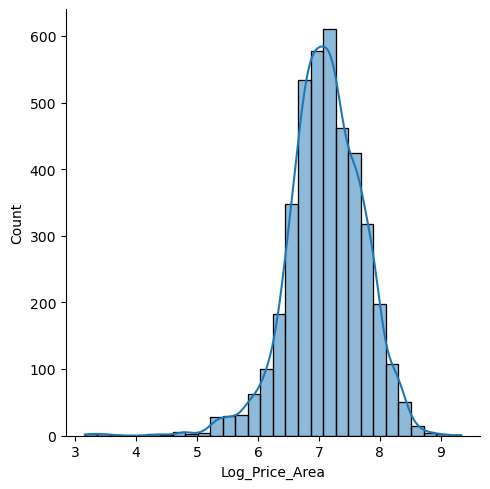

In [650]:
# histogram  for Log_Price_Area
sns.displot(PY["Log_Price_Area"], bins=30, kde=True)

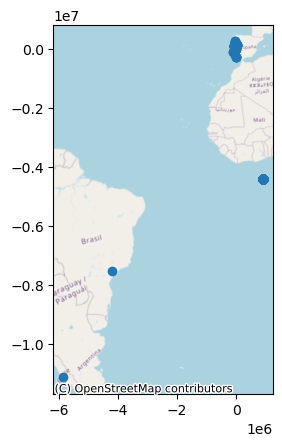

In [651]:
import contextily as cx

ax = PY.plot()
cx.add_basemap(ax, crs=PY.crs, source=cx.providers.OpenStreetMap.Mapnik)

In [652]:
# filter out elements outside the study area
PY = PY[~PY["Cluster_LP"].isnull()]
# filtrar elementos fora da região em estudo

In [653]:
PY.shape

(828, 12)

In [654]:
PY.head()

ID  CURRENT_PRICE   AREA  SOURCE_ID  TYPE_ID  TYPOLOGY_ID  \
67     106045        80000.0  130.0          2        1            4   
264    106260       125000.0  109.0          2        1            4   
10117  100277       165000.0  127.0          5        1            5   
10119  100281       115000.0  190.0          5        1            4   
10121  100288       285000.0  144.0          5        1            4   

                            geometry  Year  Log_Price_Area  Preservacao  \
67     POINT (-44026.912 108117.746)  2018        6.422247            4   
264          POINT (-43808 108010.1)  2018        7.044721            4   
10117  POINT (-42623.288 108031.252)  2018        7.169514            3   
10119  POINT (-42067.624 109193.236)  2018        6.405663            4   
10121   POINT (-43382.85 108185.703)  2018        7.590431            3   

       index_right  Cluster_LP  
67            51.0         109  
264           51.0         109  
10117         25.0          45  
10119         28.0          59  
10121         72.0         165

In [655]:
PY.shape

(828, 12)

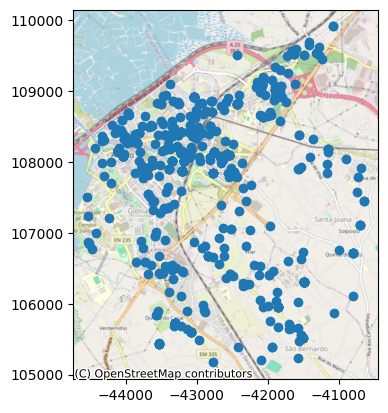

In [656]:
ax = PY.plot()
cx.add_basemap(ax, crs=PY.crs, source=cx.providers.OpenStreetMap.Mapnik)

### 4.1.4 Aggregation of Socioeconomic Indicators to the Datasets

The target here is to aggregate the socioeconomic indicators to the datasets, so that we can use them in the analysis. To do that, we'll bring the socioeconomic indicators to the existing clusters proposed by PB and then to the datasets.


In [657]:
# load BGRI 2011 indicators (dataframe)
PT_BGRI = pd.read_table(
    "../Data/BGRI_2011/BGRI2011_PT_corrigido.csv", sep=",", encoding="latin1"
)

/var/folders/b2/h8wbjqtd1hl1qwb1wvp4t9lr0000gn/T/ipykernel_15094/4122708434.py:2: DtypeWarning:

Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.



In [658]:
PT_BGRI.shape

(288638, 127)

In [659]:
# subset of BGRI11, with only subsec entries
PT_BGRI = PT_BGRI.loc[PT_BGRI["NIVEL"] == 8]

In [660]:
PT_BGRI.shape

(265955, 127)

In [661]:
PT_BGRI["GEO_COD"]

22683      1010100101
22684      1010100102
22685      1010100103
22686      1010100104
22687      1010100105
             ...     
288633    49010100119
288634    49010100120
288635    49010100121
288636    49010100122
288637    49010100123
Name: GEO_COD, Length: 265955, dtype: object

In [662]:
list(PT_BGRI.columns)

['Unnamed: 0',
 'GEO_COD',
 'GEO_COD_DSG',
 'NIVEL',
 'NIVEL_DSG',
 'N_EDIFICIOS_CLASSICOS',
 'N_EDIFICIOS_CLASSICOS_1OU2',
 'N_EDIFICIOS_CLASSICOS_ISOLADOS ',
 'N_EDIFICIOS_CLASSICOS_GEMIN',
 'N_EDIFICIOS_CLASSICOS_EMBANDA',
 'N_EDIFICIOS_CLASSICOS_3OUMAIS',
 'N_EDIFICIOS_CLASSICOS_OUTROS',
 'N_EDIFICIOS_EXCLUSIV_RESID',
 'N_EDIFICIOS_PRINCIPAL_RESID',
 'N_EDIFICIOS_PRINCIP_NAO_RESID',
 'N_EDIFICIOS_1OU2_PISOS',
 'N_EDIFICIOS_3OU4_PISOS',
 '.N_EDIFICIOS_5OU_MAIS_PISOS',
 'N_EDIFICIOS_CONSTR_ANTES_1919',
 'N_EDIFICIOS_CONSTR_1919A1945',
 'N_EDIFICIOS_CONSTR_1946A1960',
 'N_EDIFICIOS_CONSTR_1961A1970',
 'N_EDIFICIOS_CONSTR_1971A1980',
 'N_EDIFICIOS_CONSTR_1981A1990',
 'N_EDIFICIOS_CONSTR_1991A1995',
 'N_EDIFICIOS_CONSTR_1996A2000',
 'N_EDIFICIOS_CONSTR_2001A2005',
 'N_EDIFICIOS_CONSTR_2006A2011',
 'N_EDIFICIOS_ESTRUT_BETAO',
 'N_EDIFICIOS_ESTRUT_COM_PLACA',
 'N_EDIFICIOS_ESTRUT_SEM_PLACA',
 'N_EDIFICIOS_ESTRUT_ADOBE_PEDRA',
 'N_EDIFICIOS_ESTRUT_OUTRA',
 'N_ALOJAMENTOS',
 'N_ALOJAMENTOS_

In [663]:
AVR.shape

(499, 11)

In [664]:
# convert Cluster variable to integer
AVR["Cluster_LP"] = AVR["Cluster_LP"].astype("Int64")

In [665]:
AVR["Cluster_LP"].unique()

<IntegerArray>
[   5,   45,  163,   80,   31,   57,  108,    3,   29,   28,   21,   59,  106,
   40,   63,   41,   42,  161,  159,  102,  166,  160,   82,   14,   18,  101,
   30,  154,   65,   67,  164,   25,   27,   37,   24,   90,  104,  111,   58,
  158,  151,  125,  150,   22,   66,   26,   43,   64,  100,   38,  124,  155,
   19,   23, <NA>,  129,   39,   13,  103,  156,   20,  153,   91,   60,  110,
  109,  107,  157,   85,  162,   92,  152,  165,   89,  105]
Length: 75, dtype: Int64

In [666]:
AVR.head()

OBJECTID DTMN11 FR11 SEC11 SS11      BGRI11   LUG11 LUG11DESIG  \
16863     16666   0105   01   005   10  1050100510  014757     Aveiro   
16864     16667   0105   01   005   12  1050100512  014757     Aveiro   
31320     16653   0105   12   018   03  1051201803  014757     Aveiro   
31323     16656   0105   05   011   04  1050501104  014757     Aveiro   
31324     16657   0105   06   001   01  1050600101  014757     Aveiro   

           area                                           geometry  Cluster_LP  
16863  0.141979  POLYGON ((-43593.399 105717.183, -43670.151 10...           5  
16864  0.174176  POLYGON ((-43164.196 105698.88, -43157.561 105...           5  
31320  0.093782  POLYGON ((-42260.68 107955.967, -42278.449 107...          45  
31323  0.055570  POLYGON ((-42047.654 109367.038, -42348.791 10...         163  
31324  0.047657  POLYGON ((-44170.087 107905.33, -44144.354 107...          80

In [667]:
AVR.reset_index(drop=True, inplace=True)

In [668]:
PT_BGRI.reset_index(drop=True, inplace=True)

In [669]:
PT_BGRI.shape

(265955, 127)

In [670]:
# drop unnecessary columns
PT_BGRI.drop(["Unnamed: 0", "GEO_COD_DSG", "NIVEL", "NIVEL_DSG"], axis=1, inplace=True)

In [671]:
PT_BGRI.shape

(265955, 123)

In [672]:
PT_BGRI.head()

GEO_COD  N_EDIFICIOS_CLASSICOS  N_EDIFICIOS_CLASSICOS_1OU2  \
0  1010100101                      8                           8   
1  1010100102                      8                           8   
2  1010100103                      9                           9   
3  1010100104                      3                           3   
4  1010100105                      5                           5   

   N_EDIFICIOS_CLASSICOS_ISOLADOS   N_EDIFICIOS_CLASSICOS_GEMIN  \
0                                8                            0   
1                                8                            0   
2                                9                            0   
3                                3                            0   
4                                5                            0   

   N_EDIFICIOS_CLASSICOS_EMBANDA  N_EDIFICIOS_CLASSICOS_3OUMAIS  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   N_EDIFICIOS_CLASSICOS_OUTROS  N_EDIFICIOS_EXCLUSIV_RESID  \
0                             0                           5   
1                             0                           8   
2                             0                           3   
3                             0                           0   
4                             0                           1   

   N_EDIFICIOS_PRINCIPAL_RESID  ...  N_IND_RESID_DESEMP_PROC_1EMPRG  \
0                            3  ...                               0   
1                            0  ...                               0   
2                            6  ...                               0   
3                            3  ...                               0   
4                            4  ...                               0   

   N_IND_RESID_DESEMP_PROC_EMPRG  N_IND_RESID_EMPREGADOS  \
0                              0                       4   
1                              0                       9   
2                              1                       6   
3                              0                       0   
4                              0                       2   

   N_IND_RESID_PENS_REFORM  N_IND_RESID_SEM_ACT_ECON  \
0                        3                         3   
1                        5                        10   
2                        7                         9   
3                        4                         4   
4                        5                        10   

   N_IND_RESID_EMPREG_SECT_PRIM  N_IND_RESID_EMPREG_SECT_SEQ  \
0                             0                            3   
1                             0                            6   
2                             0                            2   
3                             0                            0   
4                             1                            0   

   N_IND_RESID_EMPREG_SECT_TERC  N_IND_RESID_ESTUD_MUN_RESID  \
0                             1                            2   
1                             3                            0   
2                             4                            2   
3                             0                            0   
4                             1                            4   

   N_IND_RESID_TRAB_MUN_RESID,  
0                           3,  
1                           5,  
2                           6,  
3                           0,  
4                           2,  

[5 rows x 123 columns]

In [673]:
# convert variables to integer prior to merge
AVR["BGRI11"] = AVR["BGRI11"].astype(int)
PT_BGRI["GEO_COD"] = PT_BGRI["GEO_COD"].astype(int)

In [674]:
# include the BGRI socioeconomic indicators in the geodataframe
BGRI_CLUSTER = PT_BGRI.merge(AVR, left_on="GEO_COD", right_on="BGRI11")

In [675]:
BGRI_CLUSTER.shape

(499, 134)

In [676]:
BGRI_CLUSTER.head()

GEO_COD  N_EDIFICIOS_CLASSICOS  N_EDIFICIOS_CLASSICOS_1OU2  \
0  1050100101                      6                           0   
1  1050100102                      2                           0   
2  1050100103                     14                           2   
3  1050100104                      4                           0   
4  1050100105                     13                          11   

   N_EDIFICIOS_CLASSICOS_ISOLADOS   N_EDIFICIOS_CLASSICOS_GEMIN  \
0                                0                            0   
1                                0                            0   
2                                1                            1   
3                                0                            0   
4                                7                            4   

   N_EDIFICIOS_CLASSICOS_EMBANDA  N_EDIFICIOS_CLASSICOS_3OUMAIS  \
0                              0                              6   
1                              0                              2   
2                              0                             12   
3                              0                              4   
4                              0                              2   

   N_EDIFICIOS_CLASSICOS_OUTROS  N_EDIFICIOS_EXCLUSIV_RESID  \
0                             0                           2   
1                             0                           1   
2                             0                           6   
3                             0                           0   
4                             0                          13   

   N_EDIFICIOS_PRINCIPAL_RESID  ...  DTMN11  FR11  SEC11  SS11      BGRI11  \
0                            4  ...    0105    01    001    01  1050100101   
1                            1  ...    0105    01    001    02  1050100102   
2                            8  ...    0105    01    001    03  1050100103   
3                            4  ...    0105    01    001    04  1050100104   
4                            0  ...    0105    01    001    05  1050100105   

    LUG11  LUG11DESIG      area  \
0  014757      Aveiro  0.017079   
1  014757      Aveiro  0.035924   
2  014757      Aveiro  0.016797   
3  014757      Aveiro  0.005773   
4  014757      Aveiro  0.036753   

                                            geometry  Cluster_LP  
0  POLYGON ((-43546.037 106682.578, -43536.309 10...          30  
1  POLYGON ((-43419.983 106675.222, -43347.43 106...         124  
2  POLYGON ((-43407.91 106578.158, -43407.908 106...         124  
3  POLYGON ((-43485.92 106470.923, -43518.029 106...           3  
4  POLYGON ((-43057.88 106525.743, -43057.411 106...          58  

[5 rows x 134 columns]

In [677]:
# drop unnecessary columns
BGRI_CLUSTER.drop(["OBJECTID", "DTMN11", "SEC11", "SS11"], axis=1, inplace=True)

In [678]:
BGRI_CLUSTER

GEO_COD  N_EDIFICIOS_CLASSICOS  N_EDIFICIOS_CLASSICOS_1OU2  \
0    1050100101                      6                           0   
1    1050100102                      2                           0   
2    1050100103                     14                           2   
3    1050100104                      4                           0   
4    1050100105                     13                          11   
..          ...                    ...                         ...   
494  1051300906                     35                          33   
495  1051301101                     57                          57   
496  1051301102                    100                          94   
497  1051301103                     34                          33   
498  1051301104                     15                          15   

     N_EDIFICIOS_CLASSICOS_ISOLADOS   N_EDIFICIOS_CLASSICOS_GEMIN  \
0                                  0                            0   
1                                  0                            0   
2                                  1                            1   
3                                  0                            0   
4                                  7                            4   
..                               ...                          ...   
494                               16                           17   
495                               35                           16   
496                               65                           26   
497                               28                            5   
498                                5                           10   

     N_EDIFICIOS_CLASSICOS_EMBANDA  N_EDIFICIOS_CLASSICOS_3OUMAIS  \
0                                0                              6   
1                                0                              2   
2                                0                             12   
3                                0                              4   
4                                0                              2   
..                             ...                            ...   
494                              0                              2   
495                              6                              0   
496                              3                              3   
497                              0                              1   
498                              0                              0   

     N_EDIFICIOS_CLASSICOS_OUTROS  N_EDIFICIOS_EXCLUSIV_RESID  \
0                               0                           2   
1                               0                           1   
2                               0                           6   
3                               0                           0   
4                               0                          13   
..                            ...                         ...   
494                             0                          34   
495                             0                          55   
496                             3                          98   
497                             0                          32   
498                             0                          15   

     N_EDIFICIOS_PRINCIPAL_RESID  ...  N_IND_RESID_EMPREG_SECT_TERC  \
0                              4  ...                            48   
1                              1  ...                            37   
2                              8  ...                            43   
3                              4  ...                            36   
4                              0  ...                            71   
..                           ...  ...                           ...   
494                            1  ...                            33   
495                            1  ...                            38   
496                            2  ...                            73   
497               

In [679]:
BGRI_CLUSTER.shape

(499, 130)

In [680]:
BGRI_CLUSTER.reset_index(drop=True, inplace=True)

In [681]:
# rename columns
BGRI_CLUSTER.rename(
    columns={
        "N_EDIFICIOS_CLASSICOS_ISOLADOS ": "N_EDIFICIOS_CLASSICOS_ISOLADOS",
        ".N_EDIFICIOS_5OU_MAIS_PISOS": "N_EDIFICIOS_5OU_MAIS_PISOS",
        "N_IND_RESID_TRAB_MUN_RESID,": "N_IND_RESID_TRAB_MUN_RESID",
    },
    inplace=True,
    errors="raise",
)

In [682]:
# fix variable (remove last character)
BGRI_CLUSTER["N_IND_RESID_TRAB_MUN_RESID"] = BGRI_CLUSTER[
    "N_IND_RESID_TRAB_MUN_RESID"
].str[:-1]

In [683]:
# convert it to integer
BGRI_CLUSTER["N_IND_RESID_TRAB_MUN_RESID"] = BGRI_CLUSTER[
    "N_IND_RESID_TRAB_MUN_RESID"
].astype("Int64")

In [684]:
# this dataframe BGRI_CLUSTER has the BGRI11 and the cluster coding, so now we can bring the inddicators to the datasets with housing prices and transactions
BGRI_CLUSTER.head()

GEO_COD  N_EDIFICIOS_CLASSICOS  N_EDIFICIOS_CLASSICOS_1OU2  \
0  1050100101                      6                           0   
1  1050100102                      2                           0   
2  1050100103                     14                           2   
3  1050100104                      4                           0   
4  1050100105                     13                          11   

   N_EDIFICIOS_CLASSICOS_ISOLADOS  N_EDIFICIOS_CLASSICOS_GEMIN  \
0                               0                            0   
1                               0                            0   
2                               1                            1   
3                               0                            0   
4                               7                            4   

   N_EDIFICIOS_CLASSICOS_EMBANDA  N_EDIFICIOS_CLASSICOS_3OUMAIS  \
0                              0                              6   
1                              0                              2   
2                              0                             12   
3                              0                              4   
4                              0                              2   

   N_EDIFICIOS_CLASSICOS_OUTROS  N_EDIFICIOS_EXCLUSIV_RESID  \
0                             0                           2   
1                             0                           1   
2                             0                           6   
3                             0                           0   
4                             0                          13   

   N_EDIFICIOS_PRINCIPAL_RESID  ...  N_IND_RESID_EMPREG_SECT_TERC  \
0                            4  ...                            48   
1                            1  ...                            37   
2                            8  ...                            43   
3                            4  ...                            36   
4                            0  ...                            71   

   N_IND_RESID_ESTUD_MUN_RESID  N_IND_RESID_TRAB_MUN_RESID  FR11      BGRI11  \
0                           25                          46    01  1050100101   
1                           19                          29    01  1050100102   
2                           14                          36    01  1050100103   
3                           12                          30    01  1050100104   
4                           21                          60    01  1050100105   

    LUG11  LUG11DESIG      area  \
0  014757      Aveiro  0.017079   
1  014757      Aveiro  0.035924   
2  014757      Aveiro  0.016797   
3  014757      Aveiro  0.005773   
4  014757      Aveiro  0.036753   

                                            geometry  Cluster_LP  
0  POLYGON ((-43546.037 106682.578, -43536.309 10...          30  
1  POLYGON ((-43419.983 106675.222, -43347.43 106...         124  
2  POLYGON ((-43407.91 106578.158, -43407.908 106...         124  
3  POLYGON ((-43485.92 106470.923, -43518.029 106...           3  
4  POLYGON ((-43057.88 106525.743, -43057.411 106...          58  

[5 rows x 130 columns]

In [685]:
len(BGRI_CLUSTER["GEO_COD"].unique())

499

In [686]:
BGRI_CLUSTER.shape

(499, 130)

### 4.1.5 Aggregation of Tourism Indicators to the Datasets


#### 4.1.5a Explore AL Data and prepare for merging


In [687]:
al.shape

(109365, 40)

In [688]:
al.head()

X          Y   OBJECTID  NrRNAL                       Denominacao  \
0 -8.152499  40.532027  166976433      13                Matias Guest House   
1 -8.602860  41.144624  166976434      14  Centenry Fontaínhas Apartments 1   
2 -8.602860  41.144624  166976435      15  Centenry Fontaínhas Apartments 1   
3 -8.602860  41.144624  166976436      16  Centenry Fontaínhas Apartments 3   
4 -8.614323  41.142069  166976437      32               inPátio Guest House   

              DataRegisto     DataAberturaPublico                 Modalidade  \
0  2012/10/31 00:00:00+00  2012/12/01 00:00:00+00                    Moradia   
1  2014/12/01 09:40:52+00  2014/12/01 00:00:00+00                Apartamento   
2  2014/12/01 09:56:17+00  2014/12/01 00:00:00+00                Apartamento   
3  2014/12/01 10:04:00+00  2014/12/01 00:00:00+00                Apartamento   
4  2014/12/01 16:41:53+00  2012/09/10 00:00:00+00  EstabelecimentoHospedagem   

   NrUtentes                   Email  ... LimitePROT      LimitePOC  \
0          6  nelsonneves1@gmail.com  ...     Centro  Não Abrangido   
1          6       apcf.pc@gmail.com  ...      Norte  Não Abrangido   
2          6       apcf.pc@gmail.com  ...      Norte  Não Abrangido   
3          6       apcf.pc@gmail.com  ...      Norte  Não Abrangido   
4         12         info@inpatio.pt  ...      Norte  Não Abrangido   

  LimiteAlbufeiras                                             UNESCO  \
0    Não Abrangido                                      Não Abrangido   
1    Não Abrangido                                      Não Abrangido   
2    Não Abrangido                                      Não Abrangido   
3    Não Abrangido                                      Não Abrangido   
4    Não Abrangido  Centro Histórico do Porto, Ponte Luiz I e Most...   

      Geoparques       Biosfera    RedeAldeias FreguesiasCosteiras  \
0  Não Abrangido  Não Abrangido  Não Abrangido                 Não   
1  Não Abrangido  Não Abrangido  Não Abrangido                 Sim   
2  Não Abrangido  Não Abrangido  Não Abrangido                 Sim   
3  Não Abrangido  Não Abrangido  Não Abrangido                 Sim   
4  Não Abrangido  Não Abrangido  Não Abrangido                 Sim   

  NUTSIIICosteiras SeloCleanSafe  
0              Não           Não  
1              Sim           Sim  
2              Sim           Sim  
3              Sim           Sim  
4              Sim           Não  

[5 rows x 40 columns]

In [689]:
al.columns

Index(['X', 'Y', 'OBJECTID', 'NrRNAL', 'Denominacao', 'DataRegisto',
       'DataAberturaPublico', 'Modalidade', 'NrUtentes', 'Email', 'Endereco',
       'CodigoPostal', 'LOCALIDADE', 'LatLong', 'FiabilidadeGeo', 'Freguesia',
       'Concelho', 'Distrito', 'NUTSIII', 'NUTSII', 'NUTSI', 'ERT', 'PNCT',
       'RNAP', 'RedeNatura2000Global', 'RedeNatura2000Sitios',
       'RedeNatura2000ZPE', 'FaixaCosteira', 'ZonaCosteira',
       'ZonaTerrestreProtecao', 'LimitePROT', 'LimitePOC', 'LimiteAlbufeiras',
       'UNESCO', 'Geoparques', 'Biosfera', 'RedeAldeias',
       'FreguesiasCosteiras', 'NUTSIIICosteiras', 'SeloCleanSafe'],
      dtype='object')

In [690]:
# filter Alojamento Local data for Municipalities of Aveiro and Ílhavo
aveiro = al[al["Concelho"] == "Aveiro"]
ilhavo = al[al["Concelho"] == "Ílhavo"]

In [691]:
# create a new df with both municipalities
al_avrilh = pd.concat([aveiro, ilhavo], axis=0)

In [692]:
al_avrilh.shape

(909, 40)

In [693]:
al_avrilh.head()

X          Y   OBJECTID  NrRNAL                  Denominacao  \
1377 -8.653602  40.642070  166977810    5768                   Urban City   
3141 -8.647597  40.642943  166979574    6755   Welcome In Suites e Hostel   
3171 -8.655239  40.642747  166979604    6898  Morgan & Jacob's Guesthouse   
3191 -8.654819  40.643431  166979624    7003                   Aveiro LUZ   
3205 -8.656521  40.642686  166979638    7073    Aveiro Rossio Hostel, Lda   

                 DataRegisto     DataAberturaPublico  \
1377  2014/10/03 00:00:00+00  2009/06/19 00:00:00+00   
3141  2014/08/13 00:00:00+00  2014/08/13 00:00:00+00   
3171  2011/04/29 00:00:00+00  2011/04/29 00:00:00+00   
3191  2015/02/03 15:10:53+00  2015/03/01 00:00:00+00   
3205  2009/07/29 00:00:00+00  2009/07/29 00:00:00+00   

                           Modalidade  NrUtentes  \
1377        EstabelecimentoHospedagem         34   
3141  EstabelecimentoHospedagemHostel         85   
3171                          Moradia         10   
3191                      Apartamento          6   
3205  EstabelecimentoHospedagemHostel         45   

                               Email  ... LimitePROT      LimitePOC  \
1377     salome.costa@salomecosta.pt  ...     Centro  Não Abrangido   
3141            adelino@welcomein.pt  ...     Centro  Não Abrangido   
3171  guesthouse@morganjacobs.com.pt  ...     Centro  Não Abrangido   
3191         diomar.santos@gmail.com  ...     Centro  Não Abrangido   
3205    aveirorossiohostel@gmail.com  ...     Centro  Não Abrangido   

     LimiteAlbufeiras         UNESCO     Geoparques       Biosfera  \
1377    Não Abrangido  Não Abrangido  Não Abrangido  Não Abrangido   
3141    Não Abrangido  Não Abrangido  Não Abrangido  Não Abrangido   
3171    Não Abrangido  Não Abrangido  Não Abrangido  Não Abrangido   
3191    Não Abrangido  Não Abrangido  Não Abrangido  Não Abrangido   
3205    Não Abrangido  Não Abrangido  Não Abrangido  Não Abrangido   

        RedeAldeias FreguesiasCosteiras NUTSIIICosteiras SeloCleanSafe  
1377  Não Abrangido                 Sim              Sim           Sim  
3141  Não Abrangido                 Sim              Sim           Sim  
3171  Não Abrangido                 Sim              Sim           Não  
3191  Não Abrangido                 Sim              Sim           Não  
3205  Não Abrangido                 Sim              Sim           Não  

[5 rows x 40 columns]

In [694]:
# get year from date
al_avrilh["DataAberturaPublico"] = al_avrilh["DataAberturaPublico"].str[:4]

In [695]:
al_avrilh.reset_index(drop=True, inplace=True)

In [696]:
# filter out unnecessary columns
al_avrilh = al_avrilh[["X", "Y", "DataAberturaPublico", "NrUtentes"]]

In [697]:
al_avrilh.head()

X          Y DataAberturaPublico  NrUtentes
0 -8.653602  40.642070                2009         34
1 -8.647597  40.642943                2014         85
2 -8.655239  40.642747                2011         10
3 -8.654819  40.643431                2015          6
4 -8.656521  40.642686                2009         45

In [698]:
# transform to geodataframe
gdf_al = gpd.GeoDataFrame(
    al_avrilh, geometry=gpd.points_from_xy(al_avrilh.X, al_avrilh.Y)
)

In [699]:
# set crs
gdf_al = gdf_al.set_crs("epsg:4326")

In [700]:
# convert to portuguese crs
gdf_al = gdf_al.to_crs("epsg:3763")

In [701]:
# drop unnecessary columns
gdf_al.drop(["X", "Y"], axis=1, inplace=True)

<Axes: >

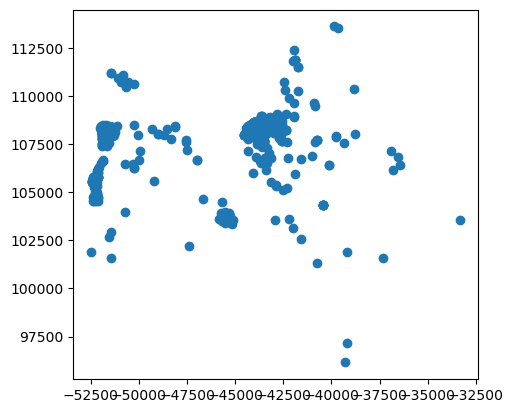

In [702]:
gdf_al.plot()

#### 4.1.5b Merge Info into the Datasets


In [703]:
gdf_al.crs == CLUSTER_LP.crs

True

In [704]:
# intersect the geodataframes to bring Cluster info to the AL dataset
gdf_al = gpd.sjoin(
    gdf_al, CLUSTER_LP[["Cluster_LP", "geometry"]], how="left", predicate="intersects"
)

In [705]:
gdf_al.shape

(909, 5)

In [706]:
# filter out AL that are not inside a cluster
gdf_al = gdf_al[gdf_al["Cluster_LP"].notnull()]

In [707]:
gdf_al.shape

(583, 5)

In [708]:
BGRI_CLUSTER["N_INDIVIDUOS_RESIDENT"].describe()

count    499.000000
mean      76.330661
std       86.543747
min        0.000000
25%       25.500000
50%       51.000000
75%       93.000000
max      673.000000
Name: N_INDIVIDUOS_RESIDENT, dtype: float64

In [709]:
# get a sum of the number of residents in 2011
a = BGRI_CLUSTER["N_INDIVIDUOS_RESIDENT"].sum()
a

38089

In [710]:
fiona.listlayers("../Data/BGRI21_CONT/BGRI21_CONT.gpkg")

['BGRI21_CONT']

In [711]:
# load BGRI 2021 data
BGRI_2021 = gpd.read_file("../Data/BGRI21_CONT/BGRI21_CONT.gpkg", layer="BGRI21_CONT")

In [712]:
BGRI_2021.columns

Index(['OBJECTID', 'BGRI2021', 'DT21', 'DTMN21', 'DTMNFR21', 'DTMNFRSEC21',
       'SECNUM21', 'SSNUM21', 'SECSSNUM21', 'SUBSECCAO', 'NUTS1', 'NUTS2',
       'NUTS3', 'N_EDIFICIOS_CLASSICOS', 'N_EDIFICIOS_CLASS_CONST_1_OU_2_ALOJ',
       'N_EDIFICIOS_CLASS_CONST_3_OU_MAIS_ALOJAMENTOS',
       'N_EDIFICIOS_EXCLUSIV_RESID', 'N_EDIFICIOS_1_OU_2_PISOS',
       'N_EDIFICIOS_3_OU_MAIS_PISOS', 'N_EDIFICIOS_CONSTR_ANTES_1945',
       'N_EDIFICIOS_CONSTR_1946_1980', 'N_EDIFICIOS_CONSTR_1981_2000',
       'N_EDIFICIOS_CONSTR_2001_2010', 'N_EDIFICIOS_CONSTR_2011_2021',
       'N_EDIFICIOS_COM_NECESSIDADES_REPARACAO', 'N_ALOJAMENTOS_TOTAL',
       'N_ALOJAMENTOS_FAMILIARES', 'N_ALOJAMENTOS_FAM_CLASS_RHABITUAL',
       'N_ALOJAMENTOS_FAM_CLASS_VAGOS_OU_RESID_SECUNDARIA',
       'N_RHABITUAL_ACESSIVEL_CADEIRAS_RODAS',
       'N_RHABITUAL_COM_ESTACIONAMENTO', 'N_RHABITUAL_PROP_OCUP',
       'N_RHABITUAL_ARRENDADOS', 'N_AGREGADOS_DOMESTICOS_PRIVADOS',
       'N_ADP_1_OU_2_PESSOAS', 'N_ADP_3_OU_MAIS_PE

In [713]:
BGRI_2021.head()

OBJECTID     BGRI2021 DT21 DTMN21 DTMNFR21 DTMNFRSEC21 SECNUM21 SSNUM21  \
0         1  16101700125   16   1610   161017   161017001      001      25   
1         2  16101900118   16   1610   161019   161019001      001      18   
2         3  16101900119   16   1610   161019   161019001      001      19   
3         4  16101900204   16   1610   161019   161019002      002      04   
4         5  16100300101   16   1610   161003   161003001      001      01   

  SECSSNUM21    SUBSECCAO  ... N_INDIVIDUOS_25_64 N_INDIVIDUOS_65_OU_MAIS  \
0      00125  16101700125  ...                0.0                     0.0   
1      00118  16101900118  ...                3.0                     1.0   
2      00119  16101900119  ...               10.0                    53.0   
3      00204  16101900204  ...                6.0                     7.0   
4      00101  16100300101  ...                0.0                     0.0   

  N_IND_ENSINO_BASICO_COMPLETO  N_IND_ENSINO_SEC_OU_POS_SEC_COMPLETO  \
0                          0.0                                   0.0   
1                          1.0                                   1.0   
2                         31.0                                   4.0   
3                          6.0                                   5.0   
4                          0.0                                   0.0   

   N_IND_ENSINO_SUPERIOR_COMPLETO  N_IND_EMPREGADOS  N_IND_REFORMADOS  \
0                             0.0               0.0               0.0   
1                             2.0               1.0               1.0   
2                             2.0               5.0              58.0   
3                             2.0               6.0               7.0   
4                             0.0               0.0               0.0   

   Shape_Length    Shape_Area  \
0   2233.574667  1.548717e+05   
1   1475.979773  6.907714e+04   
2   1310.420092  8.899950e+04   
3    456.251705  6.427454e+03   
4   6154.696498  1.163071e+06   

                                            geometry  
0  MULTIPOLYGON (((-46940.771 252330.622, -46904....  
1  MULTIPOLYGON (((-49743.698 252577.047, -49741....  
2  MULTIPOLYGON (((-50405.542 252654.352, -50374....  
3  MULTIPOLYGON (((-50454.163 252674.832, -50447....  
4  MULTIPOLYGON (((-44245.381 252435.906, -44243....  

[5 rows x 53 columns]

In [714]:
BGRI_2021_AVRILH = BGRI_2021.clip(AVR)

/Users/andresilvalima/miniforge3/envs/Thesis/lib/python3.11/site-packages/shapely/set_operations.py:131: RuntimeWarning:

invalid value encountered in intersection



<Axes: >

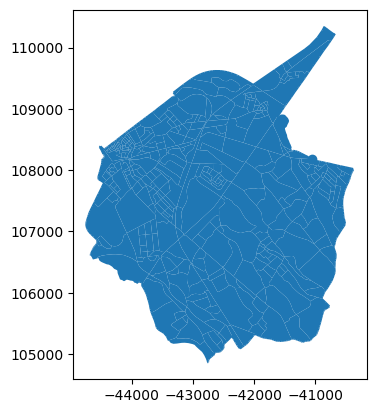

In [715]:
BGRI_2021_AVRILH.plot()

In [716]:
BGRI_2021_AVRILH["N_INDIVIDUOS"].describe()

count    425.000000
mean     105.136471
std      110.008577
min        0.000000
25%       34.000000
50%       71.000000
75%      132.000000
max      783.000000
Name: N_INDIVIDUOS, dtype: float64

In [717]:
# get a sum of the number of residents in 2021
a = BGRI_2021_AVRILH["N_INDIVIDUOS"].sum()
a

44683.0

In [718]:
BGRI_2021_AVRILH_C = BGRI_2021_AVRILH.copy()

In [719]:
# calculate centroids
BGRI_2021_AVRILH_C["centroid"] = BGRI_2021_AVRILH_C.centroid

In [720]:
# use centroids as geometry
BGRI_2021_AVRILH_C.rename(
    columns={"geometry": "geometry2", "centroid": "geometry"}, inplace=True
)

In [721]:
# intersect the geodataframes to bring Cluster info to the BGRI 2021 dataset
AVRILH_CLUSTERS_2 = gpd.sjoin(
    BGRI_2021_AVRILH_C,
    CLUSTER_LP[["Cluster_LP", "geometry"]],
    how="left",
    predicate="intersects",
)

In [722]:
AVRILH_CLUSTERS_2.head()

OBJECTID     BGRI2021 DT21 DTMN21 DTMNFR21 DTMNFRSEC21 SECNUM21  \
74151     74144  01050100307   01   0105   010501   010501003      003   
73567     73552  01050100308   01   0105   010501   010501003      003   
73632     73617  01050100310   01   0105   010501   010501003      003   
74152     74145  01051000312   01   0105   010510   010510003      003   
73571     73556  01051000313   01   0105   010510   010510003      003   

      SSNUM21 SECSSNUM21    SUBSECCAO  ...  \
74151      07      00307  01050100307  ...   
73567      08      00308  01050100308  ...   
73632      10      00310  01050100310  ...   
74152      12      00312  01051000312  ...   
73571      13      00313  01051000313  ...   

      N_IND_ENSINO_SEC_OU_POS_SEC_COMPLETO N_IND_ENSINO_SUPERIOR_COMPLETO  \
74151                                  5.0                            2.0   
73567                                 13.0                           20.0   
73632                                  8.0                            2.0   
74152                                  7.0                            6.0   
73571                                 19.0                           24.0   

      N_IND_EMPREGADOS  N_IND_REFORMADOS  Shape_Length     Shape_Area  \
74151              9.0               6.0    962.681574   35812.843698   
73567             33.0              13.0   1126.583765   67717.149494   
73632             10.0              10.0   1122.621214   50693.613650   
74152             10.0               3.0   2322.238155  140623.917596   
73571             58.0              30.0   2114.549915  257830.655366   

                                               geometry2  \
74151  MULTILINESTRING ((-42230.476 105089.637, -4219...   
73567  MULTILINESTRING ((-42646.352 104999.101, -4265...   
73632  MULTILINESTRING ((-42329.761 105242.983, -4232...   
74152  MULTILINESTRING ((-42171.431 105134.902, -4216...   
73571  MULTILINESTRING ((-41713.642 105247.041, -4167...   

                            geometry  index_right  Cluster_LP  
74151  POINT (-42200.262 105111.403)          1.0         5.0  
73567  POINT (-42544.714 105088.145)          1.0         5.0  
73632  POINT (-42333.743 105210.585)          NaN         NaN  
74152  POINT (-42150.524 105148.805)          NaN         NaN  
73571   POINT (-41549.99 105225.482)         20.0        39.0  

[5 rows x 56 columns]

In [723]:
AVRILH_CLUSTERS_2.shape

(425, 56)

In [724]:
# drop unnecessary columns
AVRILH_CLUSTERS_2.drop(["geometry", "index_right"], axis=1, inplace=True)

In [725]:
# make geometry2, geometry again
AVRILH_CLUSTERS_2.rename(columns={"geometry2": "geometry"}, inplace=True)

In [726]:
AVRILH_CLUSTERS_2.shape

(425, 54)

In [727]:
# remove data points not inside a cluster
AVRILH_CLUSTERS_2 = AVRILH_CLUSTERS_2[AVRILH_CLUSTERS_2["Cluster_LP"].notnull()]

In [728]:
AVRILH_CLUSTERS_2.shape

(403, 54)

In [729]:
AVRILH_CLUSTERS_2.head()

OBJECTID     BGRI2021 DT21 DTMN21 DTMNFR21 DTMNFRSEC21 SECNUM21  \
74151     74144  01050100307   01   0105   010501   010501003      003   
73567     73552  01050100308   01   0105   010501   010501003      003   
73571     73556  01051000313   01   0105   010510   010510003      003   
73631     73616  01051000102   01   0105   010510   010510001      001   
76407     76368  01051000106   01   0105   010510   010510001      001   

      SSNUM21 SECSSNUM21    SUBSECCAO  ... N_INDIVIDUOS_65_OU_MAIS  \
74151      07      00307  01050100307  ...                     5.0   
73567      08      00308  01050100308  ...                    16.0   
73571      13      00313  01051000313  ...                    32.0   
73631      02      00102  01051000102  ...                    23.0   
76407      06      00106  01051000106  ...                    14.0   

      N_IND_ENSINO_BASICO_COMPLETO N_IND_ENSINO_SEC_OU_POS_SEC_COMPLETO  \
74151                         12.0                                  5.0   
73567                         24.0                                 13.0   
73571                         71.0                                 19.0   
73631                         64.0                                 32.0   
76407                         22.0                                  8.0   

       N_IND_ENSINO_SUPERIOR_COMPLETO  N_IND_EMPREGADOS  N_IND_REFORMADOS  \
74151                             2.0               9.0               6.0   
73567                            20.0              33.0              13.0   
73571                            24.0              58.0              30.0   
73631                            35.0              90.0              22.0   
76407                            18.0              31.0              10.0   

       Shape_Length     Shape_Area  \
74151    962.681574   35812.843698   
73567   1126.583765   67717.149494   
73571   2114.549915  257830.655366   
73631    934.717253   52994.206161   
76407    578.132332   15896.017176   

                                                geometry  Cluster_LP  
74151  MULTILINESTRING ((-42230.476 105089.637, -4219...         5.0  
73567  MULTILINESTRING ((-42646.352 104999.101, -4265...         5.0  
73571  MULTILINESTRING ((-41713.642 105247.041, -4167...        39.0  
73631  MULTILINESTRING ((-41890.442 105284.807, -4188...        39.0  
76407  POLYGON ((-41860.132 105567.8, -41853.188 1055...        21.0  

[5 rows x 54 columns]

In [730]:
len(AVRILH_CLUSTERS_2["BGRI2021"].unique())

403

In [731]:
# convert to int the date
gdf_al["DataAberturaPublico"] = gdf_al["DataAberturaPublico"].astype(int)

In [732]:
# create a new df with the AL existing before 2011
gdf_al_cs = gdf_al[gdf_al["DataAberturaPublico"] <= 2010]

In [733]:
gdf_al_cs["DataAberturaPublico"].unique()

array([2009, 2010])

In [734]:
BGRI_CLUSTER.head()

GEO_COD  N_EDIFICIOS_CLASSICOS  N_EDIFICIOS_CLASSICOS_1OU2  \
0  1050100101                      6                           0   
1  1050100102                      2                           0   
2  1050100103                     14                           2   
3  1050100104                      4                           0   
4  1050100105                     13                          11   

   N_EDIFICIOS_CLASSICOS_ISOLADOS  N_EDIFICIOS_CLASSICOS_GEMIN  \
0                               0                            0   
1                               0                            0   
2                               1                            1   
3                               0                            0   
4                               7                            4   

   N_EDIFICIOS_CLASSICOS_EMBANDA  N_EDIFICIOS_CLASSICOS_3OUMAIS  \
0                              0                              6   
1                              0                              2   
2                              0                             12   
3                              0                              4   
4                              0                              2   

   N_EDIFICIOS_CLASSICOS_OUTROS  N_EDIFICIOS_EXCLUSIV_RESID  \
0                             0                           2   
1                             0                           1   
2                             0                           6   
3                             0                           0   
4                             0                          13   

   N_EDIFICIOS_PRINCIPAL_RESID  ...  N_IND_RESID_EMPREG_SECT_TERC  \
0                            4  ...                            48   
1                            1  ...                            37   
2                            8  ...                            43   
3                            4  ...                            36   
4                            0  ...                            71   

   N_IND_RESID_ESTUD_MUN_RESID  N_IND_RESID_TRAB_MUN_RESID  FR11      BGRI11  \
0                           25                          46    01  1050100101   
1                           19                          29    01  1050100102   
2                           14                          36    01  1050100103   
3                           12                          30    01  1050100104   
4                           21                          60    01  1050100105   

    LUG11  LUG11DESIG      area  \
0  014757      Aveiro  0.017079   
1  014757      Aveiro  0.035924   
2  014757      Aveiro  0.016797   
3  014757      Aveiro  0.005773   
4  014757      Aveiro  0.036753   

                                            geometry  Cluster_LP  
0  POLYGON ((-43546.037 106682.578, -43536.309 10...          30  
1  POLYGON ((-43419.983 106675.222, -43347.43 106...         124  
2  POLYGON ((-43407.91 106578.158, -43407.908 106...         124  
3  POLYGON ((-43485.92 106470.923, -43518.029 106...           3  
4  POLYGON ((-43057.88 106525.743, -43057.411 106...          58  

[5 rows x 130 columns]

In [735]:
# check residents per cluster in 2021
df1 = BGRI_CLUSTER.groupby(["Cluster_LP"])["N_INDIVIDUOS_RESIDENT"].sum().reset_index()

In [736]:
df1

Cluster_LP  N_INDIVIDUOS_RESIDENT
0            3                    576
1            5                   1609
2           13                    201
3           14                    439
4           18                    815
..         ...                    ...
69         162                    101
70         163                    910
71         164                    549
72         165                    527
73         166                   2600

[74 rows x 2 columns]

In [737]:
# check Utentes AL per cluster in 2011
df2 = gdf_al_cs.groupby(["Cluster_LP"])["NrUtentes"].sum().reset_index()

In [738]:
df3 = gdf_al_cs.groupby(["Cluster_LP"])["DataAberturaPublico"].count().reset_index()

In [739]:
df3

Cluster_LP  DataAberturaPublico
0        40.0                    3
1        41.0                    3

In [740]:
df2

Cluster_LP  NrUtentes
0        40.0        113
1        41.0        105

In [741]:
df1.dtypes

Cluster_LP               Int64
N_INDIVIDUOS_RESIDENT    int64
dtype: object

In [742]:
df2["Cluster_LP"] = df2["Cluster_LP"].astype("int64")

In [743]:
df2 = df2.merge(df1, on="Cluster_LP", how="left")

In [744]:
# calculate AL_pc, Alojamento Local Per Capita, as the number of utentes AL divided by residents, per cluster
df2["AL_pc"] = df2["NrUtentes"] / df2["N_INDIVIDUOS_RESIDENT"]

In [745]:
df2

Cluster_LP  NrUtentes  N_INDIVIDUOS_RESIDENT     AL_pc
0          40        113                    408  0.276961
1          41        105                   1083  0.096953

In [746]:
df3 = df3.merge(df2, on="Cluster_LP", how="left")

In [747]:
df3

Cluster_LP  DataAberturaPublico  NrUtentes  N_INDIVIDUOS_RESIDENT     AL_pc
0        40.0                    3        113                    408  0.276961
1        41.0                    3        105                   1083  0.096953

In [748]:
# merge
gdf_al_cs = gdf_al_cs.merge(df3, on="Cluster_LP", how="left")

In [749]:
gdf_al_cs.drop(
    columns=[
        "DataAberturaPublico_x",
        "NrUtentes_x",
        "geometry",
        "index_right",
        "NrUtentes_y",
        "N_INDIVIDUOS_RESIDENT",
    ],
    inplace=True,
)

In [750]:
gdf_al_cs.rename(columns={"DataAberturaPublico_y": "Tot_AL"}, inplace=True)

In [751]:
gdf_al_cs

Cluster_LP  Tot_AL     AL_pc
0        40.0       3  0.276961
1        40.0       3  0.276961
2        41.0       3  0.096953
3        41.0       3  0.096953
4        41.0       3  0.096953
5        40.0       3  0.276961

In [752]:
# repeat process, but now for AL existing after 2011
dfa = AVRILH_CLUSTERS_2.groupby(["Cluster_LP"])["N_INDIVIDUOS"].sum().reset_index()

In [753]:
# repeat process, but now for AL existing after 2011
dfb = gdf_al.groupby(["Cluster_LP"])["NrUtentes"].sum().reset_index()

In [754]:
# repeat process, but now for AL existing after 2011
dfc = gdf_al.groupby(["Cluster_LP"])["DataAberturaPublico"].count().reset_index()

In [755]:
# repeat process, but now for AL existing after 2011
dfb = dfb.merge(dfa, on="Cluster_LP", how="left")

In [756]:
# repeat process, but now for AL existing after 2011
dfb["AL_pc"] = dfb["NrUtentes"] / dfb["N_INDIVIDUOS"]

In [757]:
dfb.drop(columns=["NrUtentes", "N_INDIVIDUOS"], inplace=True)

In [758]:
# repeat process, but now for AL existing after 2011
dfb = dfb.merge(dfc, on="Cluster_LP", how="left")

In [759]:
dfb.dtypes

Cluster_LP             float64
AL_pc                  float64
DataAberturaPublico      int64
dtype: object

In [760]:
dfb.rename(columns={"DataAberturaPublico": "Tot_AL"}, inplace=True)

In [761]:
dfb.head()

Cluster_LP     AL_pc  Tot_AL
0         3.0  0.012579       1
1         5.0  0.027624       4
2        19.0  0.031056       2
3        21.0  0.003299       1
4        24.0  0.016092       3

In [762]:
# bring AL_pc to the casasapo dataset
casasapo = casasapo.merge(gdf_al_cs, on="Cluster_LP", how="left")

In [763]:
# fill na with 0
casasapo["AL_pc"] = casasapo["AL_pc"].fillna(0)
casasapo["Tot_AL"] = casasapo["Tot_AL"].fillna(0)

In [764]:
dfb["Cluster_LP"] = dfb["Cluster_LP"].astype("int64")

In [765]:
# bring AL_pc to the PY dataset
PY = PY.merge(dfb, on="Cluster_LP", how="left")

In [766]:
# fill na with 0
PY["AL_pc"] = PY["AL_pc"].fillna(0)
PY["Tot_AL"] = PY["Tot_AL"].fillna(0)

In [767]:
casasapo = casasapo.drop_duplicates()

In [768]:
PY = PY.drop_duplicates()

In [769]:
casasapo.reset_index(drop=True, inplace=True)

In [770]:
PY.reset_index(drop=True, inplace=True)

### 4.1.6 Export Data to Pickle Files


#### 4.1.6a Export Casasapo Data to a Pickle File

File needed for the Clustering_AIC notebook.


In [771]:
casasapo.head()

ID  Natureza  Tipologia  Preservacao  Cluster_old  VA1010_PrecoInicial  \
0  268352         2          5            1         2005             224500.0   
1  295929         1          4            3         4000             137000.0   
2  259211         1          3            1         1000             193000.0   
3  259235         2          5            4         2011             374000.0   
4  259228         1          2            1         1000              91500.0   

   VA1012_LOG_PrecoInicial_M2Area  VA0110_Area  DTA_ano  Zone_ID  Cluster_LP  \
0                        6.463698        350.0     2008    10341           9   
1                        6.851002        145.0     2008    10389          45   
2                        6.966439        182.0     2008    10387          19   
3                        6.840547        400.0     2008    11640          48   
4                        7.080289         77.0     2008    10387          19   

   Tot_AL  AL_pc  
0     0.0    0.0  
1     0.0    0.0  
2     0.0    0.0  
3     0.0    0.0  
4     0.0    0.0

In [772]:
casasapo.shape

(7241, 13)

In [773]:
# save casasapo dataset to a pickle
casasapo.to_pickle("../Data/piclo_casasapo.piclo")

In [774]:
casasapo.head()

ID  Natureza  Tipologia  Preservacao  Cluster_old  VA1010_PrecoInicial  \
0  268352         2          5            1         2005             224500.0   
1  295929         1          4            3         4000             137000.0   
2  259211         1          3            1         1000             193000.0   
3  259235         2          5            4         2011             374000.0   
4  259228         1          2            1         1000              91500.0   

   VA1012_LOG_PrecoInicial_M2Area  VA0110_Area  DTA_ano  Zone_ID  Cluster_LP  \
0                        6.463698        350.0     2008    10341           9   
1                        6.851002        145.0     2008    10389          45   
2                        6.966439        182.0     2008    10387          19   
3                        6.840547        400.0     2008    11640          48   
4                        7.080289         77.0     2008    10387          19   

   Tot_AL  AL_pc  
0     0.0    0.0  
1     0.0    0.0  
2     0.0    0.0  
3     0.0    0.0  
4     0.0    0.0

#### 4.1.6b Export PY Data to a Pickle File

File needed for the Clustering_AIC notebook.


In [775]:
PY.shape

(828, 14)

In [776]:
PY.head()

ID  CURRENT_PRICE   AREA  SOURCE_ID  TYPE_ID  TYPOLOGY_ID  \
0  106045        80000.0  130.0          2        1            4   
1  106260       125000.0  109.0          2        1            4   
2  100277       165000.0  127.0          5        1            5   
3  100281       115000.0  190.0          5        1            4   
4  100288       285000.0  144.0          5        1            4   

                        geometry  Year  Log_Price_Area  Preservacao  \
0  POINT (-44026.912 108117.746)  2018        6.422247            4   
1        POINT (-43808 108010.1)  2018        7.044721            4   
2  POINT (-42623.288 108031.252)  2018        7.169514            3   
3  POINT (-42067.624 109193.236)  2018        6.405663            4   
4   POINT (-43382.85 108185.703)  2018        7.590431            3   

   index_right  Cluster_LP     AL_pc  Tot_AL  
0         51.0         109  0.463183    59.0  
1         51.0         109  0.463183    59.0  
2         25.0          45  0.081610    41.0  
3         28.0          59  0.000000     0.0  
4         72.0         165  0.023359     4.0

In [777]:
# save PY dataset to a pickle
PY.to_pickle("../Data/piclo_py.piclo")

#### 4.1.6c Export All Data (Casasapo + PY) Data to a Pickle File

File needed for the Modelling_AIC notebook.


In [778]:
casasapo

ID  Natureza  Tipologia  Preservacao  Cluster_old  \
0      268352         2          5            1         2005   
1      295929         1          4            3         4000   
2      259211         1          3            1         1000   
3      259235         2          5            4         2011   
4      259228         1          2            1         1000   
...       ...       ...        ...          ...          ...   
7236  4167413         1          3            3         1015   
7237  4178538         1          4            3         1000   
7238  4157728         2          4            3         1020   
7239  4194989         2          4            3         2004   
7240  4195518         1          3            3         1015   

      VA1010_PrecoInicial  VA1012_LOG_PrecoInicial_M2Area  VA0110_Area  \
0                224500.0                        6.463698        350.0   
1                137000.0                        6.851002        145.0   
2                193000.0                        6.966439        182.0   
3                374000.0                        6.840547        400.0   
4                 91500.0                        7.080289         77.0   
...                   ...                             ...          ...   
7236              62500.0                        6.468211         97.0   
7237             172500.0                        7.167803        133.0   
7238             165000.0                        6.492240        250.0   
7239             150000.0                        7.213375        110.5   
7240              62500.0                        6.468211         97.0   

      DTA_ano  Zone_ID  Cluster_LP  Tot_AL  AL_pc  
0        2008    10341           9     0.0    0.0  
1        2008    10389          45     0.0    0.0  
2        2008    10387          19     0.0    0.0  
3        2008    11640          48     0.0    0.0  
4        2008    10387          19     0.0    0.0  
...       ...      ...         ...     ...    ...  
7236     2010    10346          14     0.0    0.0  
7237     2010    10387          19     0.0    0.0  
7238     2010    18626          85     0.0    0.0  
7239     2010    10376          11     0.0    0.0  
7240     2010    10346          14     0.0    0.0  

[7241 rows x 13 columns]

In [779]:
casasapo.columns

Index(['ID', 'Natureza', 'Tipologia', 'Preservacao', 'Cluster_old',
       'VA1010_PrecoInicial', 'VA1012_LOG_PrecoInicial_M2Area', 'VA0110_Area',
       'DTA_ano', 'Zone_ID', 'Cluster_LP', 'Tot_AL', 'AL_pc'],
      dtype='object')

In [780]:
# rename columns
casasapo.rename(
    columns={
        "Tipologia": "Typology",
        "Natureza": "Nature",
        "Preservacao": "Status",
        "VA1010_PrecoInicial": "Price",
        "VA1012_LOG_PrecoInicial_M2Area": "Log_P_A",
        "VA0110_Area": "A",
        "DTA_ano": "Year",
    },
    inplace=True,
)

In [781]:
casasapo.head()

ID  Nature  Typology  Status  Cluster_old     Price   Log_P_A      A  \
0  268352       2         5       1         2005  224500.0  6.463698  350.0   
1  295929       1         4       3         4000  137000.0  6.851002  145.0   
2  259211       1         3       1         1000  193000.0  6.966439  182.0   
3  259235       2         5       4         2011  374000.0  6.840547  400.0   
4  259228       1         2       1         1000   91500.0  7.080289   77.0   

   Year  Zone_ID  Cluster_LP  Tot_AL  AL_pc  
0  2008    10341           9     0.0    0.0  
1  2008    10389          45     0.0    0.0  
2  2008    10387          19     0.0    0.0  
3  2008    11640          48     0.0    0.0  
4  2008    10387          19     0.0    0.0

In [782]:
# rename columns
PY.rename(
    columns={
        "AREA": "A",
        "Preservacao": "Status",
        "TYPE_ID": "Nature",
        "TYPOLOGY_ID": "Typology",
        "Log_Price_Area": "Log_P_A",
        "Log_VA0110_Area": "Log_A",
        "ZONECorr": "Cluster_50",
        "CURRENT_PRICE": "Price",
        "Log_Price": "Log_P",
        "Log_Area": "Log_A",
    },
    inplace=True,
)

In [783]:
# define T=1 for py and T=0 for cs, post intervention and pre intervention
PY["T"] = 1
casasapo["T"] = 0

In [784]:
PY.reset_index(drop=True, inplace=True)

In [785]:
# drop unnecessary columns
PY.drop(columns=["geometry", "index_right"], axis=1, inplace=True)

In [786]:
# drop unnecessary columns
casasapo.drop(columns=["Zone_ID", "Cluster_old"], axis=1, inplace=True)

In [787]:
casasapo.shape

(7241, 12)

In [788]:
PY.shape

(828, 13)

In [789]:
# concat data
all_data = pd.concat([casasapo, PY], axis=0, ignore_index=True)

In [790]:
all_data["Year"].unique()

array([2008, 2007, 2005, 2006, 2009, 2010, '2018', '2019', '2020', '2021',
       '2022', '2023'], dtype=object)

In [791]:
all_data.head()

ID  Nature  Typology  Status     Price   Log_P_A      A  Year  \
0  268352       2         5       1  224500.0  6.463698  350.0  2008   
1  295929       1         4       3  137000.0  6.851002  145.0  2008   
2  259211       1         3       1  193000.0  6.966439  182.0  2008   
3  259235       2         5       4  374000.0  6.840547  400.0  2008   
4  259228       1         2       1   91500.0  7.080289   77.0  2008   

   Cluster_LP  Tot_AL  AL_pc  T  SOURCE_ID  
0           9     0.0    0.0  0        NaN  
1          45     0.0    0.0  0        NaN  
2          19     0.0    0.0  0        NaN  
3          48     0.0    0.0  0        NaN  
4          19     0.0    0.0  0        NaN

In [792]:
all_data.shape

(8069, 13)

In [793]:
all_data = all_data[all_data["Status"] != 5]  # remove elements under construction

In [794]:
all_data["Status"].unique()

<IntegerArray>
[1, 3, 4, 2]
Length: 4, dtype: Int64

In [795]:
all_data.shape

(6225, 13)

In [796]:
all_data["T"].value_counts()

T
0    5517
1     708
Name: count, dtype: int64

In [797]:
all_data["Cluster_LP"].nunique()

119

In [798]:
all_data.shape

(6225, 13)

In [799]:
all_data.dtypes

ID              Int64
Nature          Int64
Typology        Int64
Status          Int64
Price         float64
Log_P_A       float64
A             float64
Year           object
Cluster_LP      Int64
Tot_AL        float64
AL_pc         float64
T               int64
SOURCE_ID     float64
dtype: object

In [800]:
all_data.loc[all_data["T"] == 0, "SOURCE_ID"] = 4.0

In [801]:
all_data2 = all_data.merge(PY_data2, left_on="ID", right_on="ID", how="left")

In [802]:
all_data2.head()

ID  Nature  Typology  Status     Price   Log_P_A      A  Year  \
0  268352       2         5       1  224500.0  6.463698  350.0  2008   
1  295929       1         4       3  137000.0  6.851002  145.0  2008   
2  259211       1         3       1  193000.0  6.966439  182.0  2008   
3  259235       2         5       4  374000.0  6.840547  400.0  2008   
4  259228       1         2       1   91500.0  7.080289   77.0  2008   

   Cluster_LP  Tot_AL  AL_pc  T  SOURCE_ID  CONSTRUCTION_YEAR  ADD_LONGITUDE  \
0           9     0.0    0.0  0        4.0                NaN            NaN   
1          45     0.0    0.0  0        4.0                NaN            NaN   
2          19     0.0    0.0  0        4.0                0.0       -8.66809   
3          48     0.0    0.0  0        4.0             1986.0       -8.69523   
4          19     0.0    0.0  0        4.0             2002.0       -8.69523   

   ADD_LATITUDE  
0           NaN  
1           NaN  
2      40.60114  
3      40.61027  
4      40.61027

In [803]:
all_data2.rename(columns={"geometry": "Coordinates"}, inplace=True)

In [804]:
all_data2.rename(
    columns={
        "ADD_LONGITUDE": "Longitude",
        "ADD_LATITUDE": "Latitude",
        "CONSTRUCTION_YEAR": "Construc_Year",
    },
    inplace=True,
)
all_data2.fillna(0, inplace=True)

In [805]:
all_data2

ID  Nature  Typology  Status     Price   Log_P_A      A  Year  \
0      268352       2         5       1  224500.0  6.463698  350.0  2008   
1      295929       1         4       3  137000.0  6.851002  145.0  2008   
2      259211       1         3       1  193000.0  6.966439  182.0  2008   
3      259235       2         5       4  374000.0  6.840547  400.0  2008   
4      259228       1         2       1   91500.0  7.080289   77.0  2008   
...       ...     ...       ...     ...       ...       ...    ...   ...   
6220  1998153       1         4       1  530435.0  8.291104  133.0  2023   
6221  1998154       1         3       1  375000.0  8.357344   88.0  2023   
6222  1998155       1         4       1  520435.0  8.272071  133.0  2023   
6223  1998156       1         4       1  517935.0  8.267256  133.0  2023   
6224  1998157       1         3       1  323400.0  8.209308   88.0  2023   

      Cluster_LP  Tot_AL     AL_pc  T  SOURCE_ID  Construc_Year  Longitude  \
0              9     0.0  0.000000  0        4.0            0.0   0.000000   
1             45     0.0  0.000000  0        4.0            0.0   0.000000   
2             19     0.0  0.000000  0        4.0            0.0  -8.668090   
3             48     0.0  0.000000  0        4.0         1986.0  -8.695230   
4             19     0.0  0.000000  0        4.0         2002.0  -8.695230   
...          ...     ...       ... ..        ...            ...        ...   
6220         165     4.0  0.023359  1        5.0         2023.0  -8.644027   
6221         165     4.0  0.023359  1        5.0         2023.0  -8.644027   
6222         165     4.0  0.023359  1        5.0         2023.0  -8.644027   
6223         165     4.0  0.023359  1        5.0         2023.0  -8.644027   
6224         165     4.0  0.023359  1        5.0         2023.0  -8.644027   

       Latitude  
0      0.000000  
1      0.000000  
2     40.601140  
3     40.610270  
4     40.610270  
...         ...  
6220  40.640949  
6221  40.640949  
6222  40.640949  
6223  40.640949  
6224  40.640949  

[6225 rows x 16 columns]

In [806]:
all_data2["Construc_Year"] = all_data2["Construc_Year"].astype("Int64")

In [807]:
all_data2.drop(columns=["Log_P_A"], axis=1, inplace=True)

In [808]:
all_data2

ID  Nature  Typology  Status     Price      A  Year  Cluster_LP  \
0      268352       2         5       1  224500.0  350.0  2008           9   
1      295929       1         4       3  137000.0  145.0  2008          45   
2      259211       1         3       1  193000.0  182.0  2008          19   
3      259235       2         5       4  374000.0  400.0  2008          48   
4      259228       1         2       1   91500.0   77.0  2008          19   
...       ...     ...       ...     ...       ...    ...   ...         ...   
6220  1998153       1         4       1  530435.0  133.0  2023         165   
6221  1998154       1         3       1  375000.0   88.0  2023         165   
6222  1998155       1         4       1  520435.0  133.0  2023         165   
6223  1998156       1         4       1  517935.0  133.0  2023         165   
6224  1998157       1         3       1  323400.0   88.0  2023         165   

      Tot_AL     AL_pc  T  SOURCE_ID  Construc_Year  Longitude   Latitude  
0        0.0  0.000000  0        4.0              0   0.000000   0.000000  
1        0.0  0.000000  0        4.0              0   0.000000   0.000000  
2        0.0  0.000000  0        4.0              0  -8.668090  40.601140  
3        0.0  0.000000  0        4.0           1986  -8.695230  40.610270  
4        0.0  0.000000  0        4.0           2002  -8.695230  40.610270  
...      ...       ... ..        ...            ...        ...        ...  
6220     4.0  0.023359  1        5.0           2023  -8.644027  40.640949  
6221     4.0  0.023359  1        5.0           2023  -8.644027  40.640949  
6222     4.0  0.023359  1        5.0           2023  -8.644027  40.640949  
6223     4.0  0.023359  1        5.0           2023  -8.644027  40.640949  
6224     4.0  0.023359  1        5.0           2023  -8.644027  40.640949  

[6225 rows x 15 columns]

In [809]:
# export CSV with all data
all_data2.to_csv("../Data/all_data.csv", index=False)

In [810]:
# save df with bluster info to a pickle
all_data.to_pickle("../Data/all_data.piclo")

#### 4.1.6d Export BGRI_Cluster data to a Pickle File

File needed for the Clustering_AIC notebook.


In [811]:
BGRI_CLUSTER.head()

GEO_COD  N_EDIFICIOS_CLASSICOS  N_EDIFICIOS_CLASSICOS_1OU2  \
0  1050100101                      6                           0   
1  1050100102                      2                           0   
2  1050100103                     14                           2   
3  1050100104                      4                           0   
4  1050100105                     13                          11   

   N_EDIFICIOS_CLASSICOS_ISOLADOS  N_EDIFICIOS_CLASSICOS_GEMIN  \
0                               0                            0   
1                               0                            0   
2                               1                            1   
3                               0                            0   
4                               7                            4   

   N_EDIFICIOS_CLASSICOS_EMBANDA  N_EDIFICIOS_CLASSICOS_3OUMAIS  \
0                              0                              6   
1                              0                              2   
2                              0                             12   
3                              0                              4   
4                              0                              2   

   N_EDIFICIOS_CLASSICOS_OUTROS  N_EDIFICIOS_EXCLUSIV_RESID  \
0                             0                           2   
1                             0                           1   
2                             0                           6   
3                             0                           0   
4                             0                          13   

   N_EDIFICIOS_PRINCIPAL_RESID  ...  N_IND_RESID_EMPREG_SECT_TERC  \
0                            4  ...                            48   
1                            1  ...                            37   
2                            8  ...                            43   
3                            4  ...                            36   
4                            0  ...                            71   

   N_IND_RESID_ESTUD_MUN_RESID  N_IND_RESID_TRAB_MUN_RESID  FR11      BGRI11  \
0                           25                          46    01  1050100101   
1                           19                          29    01  1050100102   
2                           14                          36    01  1050100103   
3                           12                          30    01  1050100104   
4                           21                          60    01  1050100105   

    LUG11  LUG11DESIG      area  \
0  014757      Aveiro  0.017079   
1  014757      Aveiro  0.035924   
2  014757      Aveiro  0.016797   
3  014757      Aveiro  0.005773   
4  014757      Aveiro  0.036753   

                                            geometry  Cluster_LP  
0  POLYGON ((-43546.037 106682.578, -43536.309 10...          30  
1  POLYGON ((-43419.983 106675.222, -43347.43 106...         124  
2  POLYGON ((-43407.91 106578.158, -43407.908 106...         124  
3  POLYGON ((-43485.92 106470.923, -43518.029 106...           3  
4  POLYGON ((-43057.88 106525.743, -43057.411 106...          58  

[5 rows x 130 columns]

In [812]:
BGRI_CLUSTER.shape

(499, 130)

In [813]:
BGRI_CLUSTER.Cluster_LP.unique()

<IntegerArray>
[  30,  124,    3,   58,   64,  108,   21,    5, <NA>,   59,   89,   20,  163,
  101,  155,   18,   82,   14,   63,   45,   85,   92,  152,   80,   22,   40,
   31,  110,  156,  109,  111,  103,   57,   26,  104,   24,   43,   29,   28,
   37,  125,  164,  158,  151,   27,   25,  154,   23,   65,   38,  100,   13,
   39,   41,  102,  166,   19,  161,  107,  106,   42,  160,  159,  105,  165,
  157,   91,   66,  162,   60,  153,  150,   90,   67,  129]
Length: 75, dtype: Int64

In [814]:
BGRI_CLUSTER.drop(
    columns=["area", "geometry", "GEO_COD", "BGRI11", "LUG11DESIG"], inplace=True
)

In [815]:
BGRI_CLUSTER.shape

(499, 125)

In [816]:
# save df with socioeconomic indicators to a pickle
BGRI_CLUSTER.to_pickle("../Data/piclo_bgri.piclo")

In [817]:
CLUSTER_LP

Cluster_LP                                           geometry      area
0          3.0  POLYGON ((-43381.069 106148.686, -43381.861 10...  0.024286
1          5.0  POLYGON ((-43286.789 105259.255, -43301.335 10...  0.141979
2         13.0  POLYGON ((-41736.204 106118.443, -41725.968 10...  0.156570
3         14.0  POLYGON ((-41919.284 109040.306, -41921.584 10...  0.018652
4         18.0  POLYGON ((-42101.612 108979.483, -42098.652 10...  0.009896
..         ...                                                ...       ...
69       162.0  POLYGON ((-40825.414 108109.879, -40837.095 10...  0.006928
70       163.0  POLYGON ((-42574.721 108826.734, -42603.468 10...  0.055570
71       164.0  POLYGON ((-43061.441 106887.578, -43042.374 10...  0.028086
72       165.0  POLYGON ((-43102.751 108138.632, -43103.842 10...  0.051393
73       166.0  POLYGON ((-43284.707 108396.052, -43288.269 10...  0.010521

[74 rows x 3 columns]

In [818]:
# save df with bluster info to a pickle
CLUSTER_LP.to_pickle("../Data/piclo_clusters_lp.piclo")
CLUSTER_LUG.to_pickle("../Data/piclo_clusters_lug.piclo")
CLUSTER_FR.to_pickle("../Data/piclo_clusters_fr.piclo")